In [1]:
'''
Import necessary packages
'''
import numpy as np
import scipy
import scipy.integrate
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib import rc
import pickle
from tqdm import tqdm

# from ip3_ca_ode import *
from ip3_ca_ode_cfg import *
import cfg

save = 'figures/paper_plots/'

#set figure font sizes for readability
font = {'size' : 30,
       'family': 'serif',
       'sans-serif': ['Helvetica']}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
color_cycle = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plots

This file will be a collection of polished plots for use in a paper so that we can come back to easily make changes when needed

# GPCR Modeling

## Bifurcation Diagram

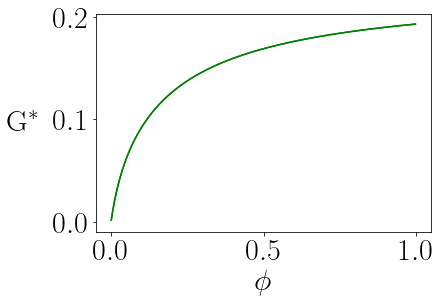

In [3]:
plot_bifurcation('gpcr_kp_0.9_km_0.4.dat')
plt.xlabel(r'$\phi$')
plt.ylabel(r'G$^*$', rotation=0, labelpad=30, va='center')

plt.savefig(save + '2.1_bifurcation2.png', bbox_inches='tight')

### Trajectory on Bifurcation

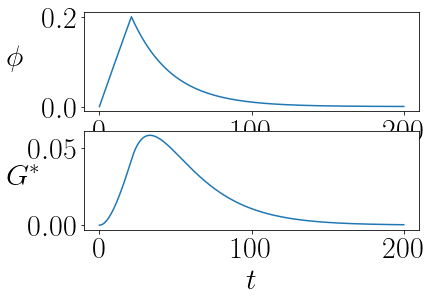

In [29]:
#Check the Gstar trajectory

sol = run_gpcr_experiment(input_type='curve', t_f=200)
fig, ax = plt.subplots(2, 1)
# ax = [ax]
plot_experiment_plots(['glut', 'Gstar'], ax, plot_input=True)

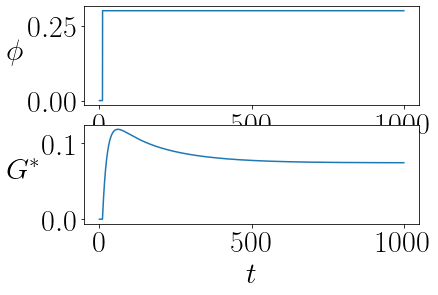

In [40]:
#Check the Gstar trajectory

cfg.input_duration = 1000
sol = run_gpcr_experiment(input_type='pulse', t_f=1000)
fig, ax = plt.subplots(2, 1)
# ax = [ax]
plot_experiment_plots(['glut', 'Gstar'], ax, plot_input=True)

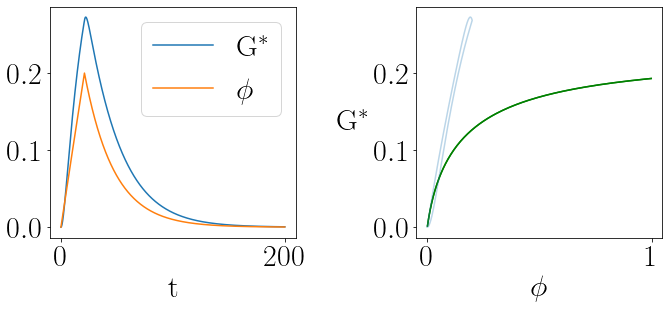

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#Plot dynamics
set_ip3_curve('SP')
sol = run_gpcr_experiment(input_type='curve', t_f=200)
ax[0].plot(cfg.t, cfg.Gstar, label='G$^*$')
ax[0].plot(cfg.t_input, cfg.glut, label='$\phi$')
ax[0].set_xlabel('t')
ax[0].legend()

#Plot trajectory on bifurcation
plot_bifurcation('gpcr_kp_0.9_km_0.4.dat', ax=ax[1])
ax[1].set_xlabel('$\phi$')
ax[1].set_ylabel('G$^*$', rotation=0, va='center', labelpad=20)

glut = [curve_input(t) for t in cfg.t]
ax[1].plot(glut, cfg.Gstar, alpha=0.3)

fig.tight_layout()
fig.savefig(save+'2.1.1_trajectory_on_bifurcation.png', bbox_inches='tight')

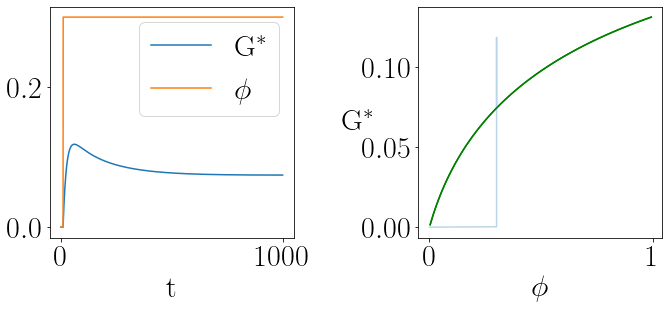

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#Plot dynamics
# set_ip3_curve('SP')
cfg.input_duration = 1000
sol = run_gpcr_experiment(input_type='pulse', t_f=1000)
ax[0].plot(cfg.t, cfg.Gstar, label='G$^*$')
ax[0].plot(cfg.t_input, cfg.glut, label='$\phi$')
ax[0].set_xlabel('t')
ax[0].legend()

#Plot trajectory on bifurcation
plot_bifurcation('gpcr.dat', ax=ax[1])
ax[1].set_xlabel('$\phi$')
ax[1].set_ylabel('G$^*$', rotation=0, va='center')

glut = [pulse_input(t) for t in cfg.t]
ax[1].plot(glut, cfg.Gstar, alpha=0.3)

fig.tight_layout()


## G* Amplitudes and behaviors at different stimulus concentration

Use pulse inputs of different sizes (2 minute baths here)

In [9]:
#Generate data for Gstar

maxes = []
integrals = []
cfg.input_duration = 120

gluts = np.arange(0, 0.5, 0.01)
for glut in tqdm(gluts):
    cfg.input_max = glut
    sol = run_gpcr_experiment('pulse', t_f=360, max_step=1)
    
    #track max, integral
    high, integral = get_stats('Gstar')
    maxes.append(high)
    integrals.append(integral)

save_dict = {
    'gluts': gluts,
    'maxes': maxes,
    'integrals': integrals
}
pickle.dump(save_dict, open('data/plot_data/2.2_Gstar_stats2', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.53it/s]


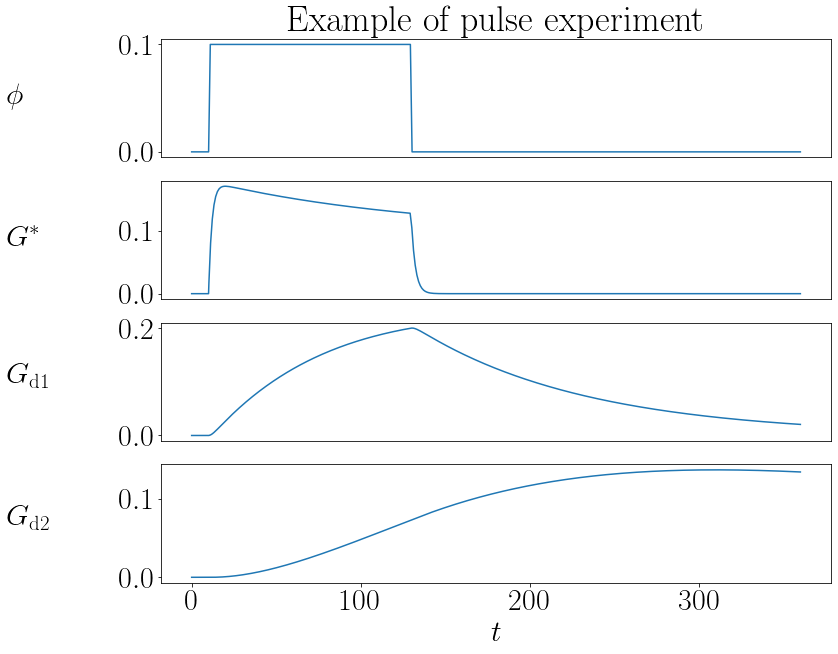

In [7]:
cfg.input_max = 0.1
cfg.input_duration = 120
sol = run_gpcr_experiment('pulse', t_f=360, max_step=1)

fig, ax = plt.subplots(4, 1, figsize=(12, 10))
plot_experiment_plots(['glut', 'Gstar', 'Gd1', 'Gd2'], ax, remove_xticks=True)
ax[0].set_title('Example of pulse experiment')
plt.savefig(save + '2.2_pulse_example2.png', bbox_inches='tight')

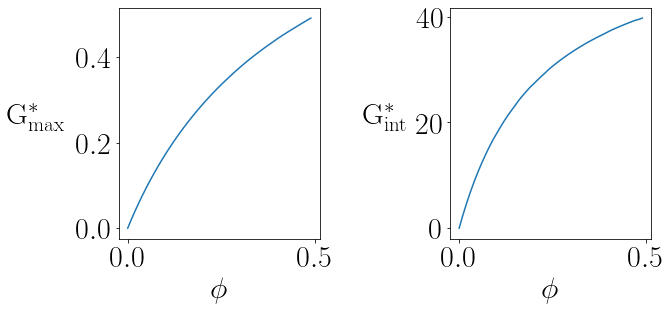

In [10]:
data_dict = pickle.load(open('data/plot_data/2.2_Gstar_stats2', 'rb'))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(data_dict['gluts'], data_dict['maxes'])
ax[0].set_xlabel('$\phi$')
ax[0].set_ylabel('G$^*_\mathrm{max}$', rotation=0, va='center', labelpad=40)

ax[1].plot(data_dict['gluts'], data_dict['integrals'])
ax[1].set_xlabel('$\phi$')
ax[1].set_ylabel('G$^*_\mathrm{int}$', rotation=0, va='center', labelpad=30)

plt.tight_layout()

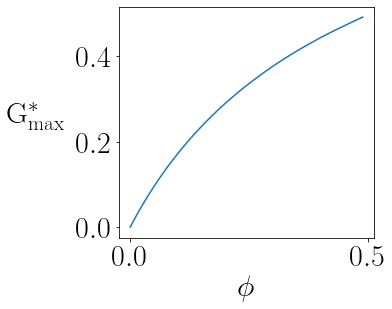

In [11]:
data_dict = pickle.load(open('data/plot_data/2.2_Gstar_stats2', 'rb'))

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(data_dict['gluts'], data_dict['maxes'])
ax.set_xlabel('$\phi$')
ax.set_ylabel('G$^*_\mathrm{max}$', rotation=0, va='center', labelpad=40)

# ax[1].plot(data_dict['gluts'], data_dict['integrals'])
# ax[1].set_xlabel('$\phi$')
# ax[1].set_ylabel('G$^*_\mathrm{int}$', rotation=0, va='center', labelpad=30)

plt.tight_layout()
plt.savefig(save + '2.2_Gstar_response2.png', bboc_inches='tight')

## Gd1 vs Gd2 change with respect to stimulus concentration

With baths of different concentrations, how long does it take for Gd1 vs Gd2 to kick in, what is the peak, etc.

In [12]:
#Generate data for Gstar

gluts = np.arange(0, 0.5, 0.01)
save_dict = {
    'gluts': gluts,
    'Gd1_maxes': [],
    'Gd1_integrals': [],
    'Gd2_maxes': [],
    'Gd2_integrals': []
}
cfg.input_duration = 600

for glut in tqdm(gluts):
    cfg.input_max = glut
    sol = run_gpcr_experiment('pulse', t_f=1000, max_step=1)
    
    #track max, integral
    high, integral = get_stats('Gd1')
    save_dict['Gd1_maxes'].append(high)
    save_dict['Gd1_integrals'].append(integral)
    
    high, integral = get_stats('Gd2')
    save_dict['Gd2_maxes'].append(high)
    save_dict['Gd2_integrals'].append(integral)


pickle.dump(save_dict, open('data/plot_data/2.3_Gd1_Gd2_stats2', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  4.03it/s]


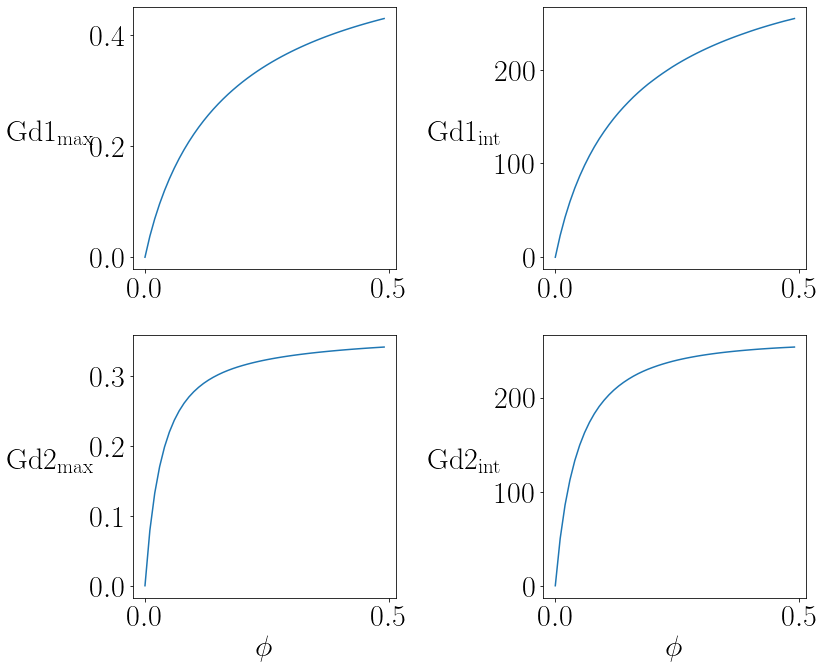

In [13]:
data_dict = pickle.load(open('data/plot_data/2.3_Gd1_Gd2_stats2', 'rb'))

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(data_dict['gluts'], data_dict['Gd1_maxes'])
ax[0, 0].set_ylabel('Gd1$_\mathrm{max}$', rotation=0, va='center', labelpad=40)

ax[0, 1].plot(data_dict['gluts'], data_dict['Gd1_integrals'])
ax[0, 1].set_ylabel('Gd1$_\mathrm{int}$', rotation=0, va='center', labelpad=30)


ax[1, 0].plot(data_dict['gluts'], data_dict['Gd2_maxes'])
ax[1, 0].set_xlabel('$\phi$')
ax[1, 0].set_ylabel('Gd2$_\mathrm{max}$', rotation=0, va='center', labelpad=40)

ax[1, 1].plot(data_dict['gluts'], data_dict['Gd2_integrals'])
ax[1, 1].set_xlabel('$\phi$')
ax[1, 1].set_ylabel('Gd2$_\mathrm{int}$', rotation=0, va='center', labelpad=30)

plt.tight_layout()

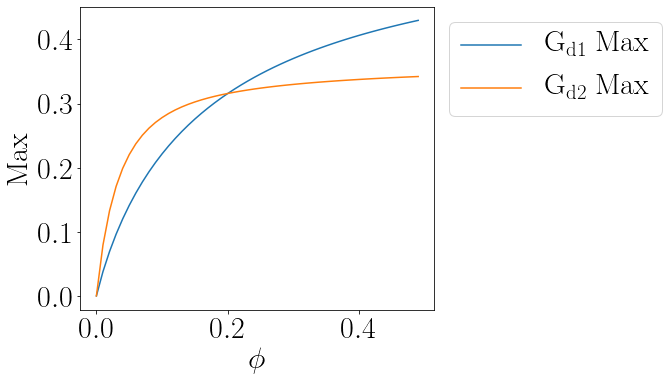

In [14]:
data_dict = pickle.load(open('data/plot_data/2.3_Gd1_Gd2_stats2', 'rb'))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(data_dict['gluts'], data_dict['Gd1_maxes'], label='G$_\mathrm{d1}$ Max')
ax.plot(data_dict['gluts'], data_dict['Gd2_maxes'], label='G$_\mathrm{d2}$ Max')

ax.legend(bbox_to_anchor=(1, 1, 0, 0))
#maybe normalize by the max values of Gd1 Gd2, show Gd2 reaches it's max much sooner
ax.set_xlabel('$\phi$')
ax.set_ylabel('Max')

plt.tight_layout()
plt.savefig(save + '2.3_Gd1_Gd2_max_comparison2.png')

### How long it takes for Gd1/Gd2 to reach 0.1

In [20]:
#Generate data for Gstar

gluts = np.arange(0, 0.5, 0.002)
save_dict = {
    'gluts': gluts,
    'Gd1_time_to_0.1': [],
    'Gd2_time_to_0.1': []
}
cfg.input_duration = 600

for glut in tqdm(gluts):
    cfg.input_max = glut
    sol = run_gpcr_experiment('pulse', t_f=1000, max_step=1)
    
    Gd1_time = cfg.t[np.argmax(cfg.Gd1 > 0.1)]
    save_dict['Gd1_time_to_0.1'].append(Gd1_time)
    Gd2_time = cfg.t[np.argmax(cfg.Gd2 > 0.1)]
    save_dict['Gd2_time_to_0.1'].append(Gd2_time)


pickle.dump(save_dict, open('data/plot_data/2.3.1_Gd1_Gd2_time_to_0.1 2', 'wb'))

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [01:01<00:00,  4.09it/s]


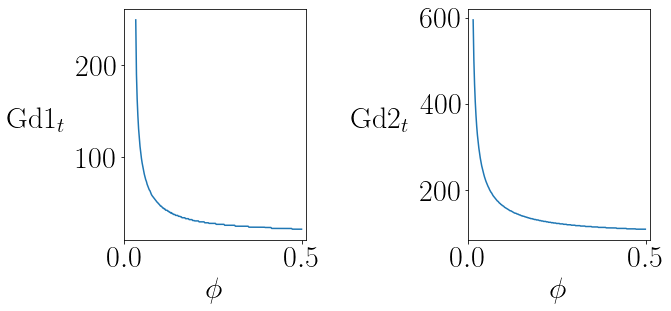

In [21]:
data_dict = pickle.load(open('data/plot_data/2.3.1_Gd1_Gd2_time_to_0.1 2', 'rb'))

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

first = np.argmax(np.array(data_dict['Gd1_time_to_0.1']) > 0)
ax[0].plot(data_dict['gluts'][first:], data_dict['Gd1_time_to_0.1'][first:])
ax[0].set_ylabel('Gd1$_t$', rotation=0, va='center', labelpad=40)
ax[0].set_xlabel('$\phi$')

first = np.argmax(np.array(data_dict['Gd2_time_to_0.1']) > 0)
ax[1].plot(data_dict['gluts'][first:], data_dict['Gd2_time_to_0.1'][first:])
ax[1].set_ylabel('Gd2$_t$', rotation=0, va='center', labelpad=40)
ax[1].set_xlabel('$\phi$')

ax[1].set_xlim([0, 0.51])

plt.tight_layout()

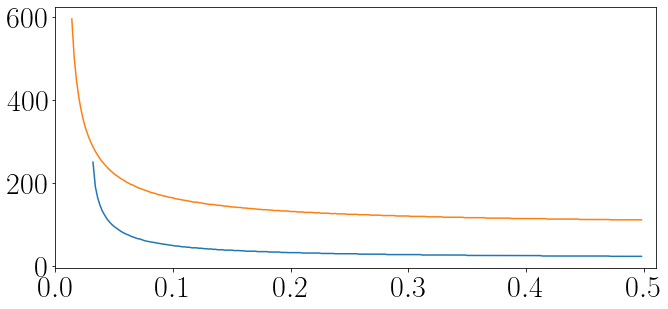

In [22]:
data_dict = pickle.load(open('data/plot_data/2.3.1_Gd1_Gd2_time_to_0.1 2', 'rb'))

fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)

first = np.argmax(np.array(data_dict['Gd1_time_to_0.1']) > 0)
ax.plot(data_dict['gluts'][first:], data_dict['Gd1_time_to_0.1'][first:])
first = np.argmax(np.array(data_dict['Gd2_time_to_0.1']) > 0)

ax.plot(data_dict['gluts'][first:], data_dict['Gd2_time_to_0.1'][first:])

ax.set_xlim([0, 0.51])

plt.tight_layout()

## Heat maps of Gd1/Gd2 growth

Something interesting to note is that Gd1 

In [23]:
# bath_lengths = np.arange(10, 1000, 5)
# concentrations = np.arange(0, 2, 0.01)

bath_lengths = np.arange(10, 1000, 5)
concentrations = np.arange(0, 0.2, 0.002)

save_dict = {
    'bath_length': [],
    'glut': [],
    'Gd1_max': [],
    'Gd1_max_time': [],
    'Gd1_integral': [],
    'Gd2_max': [],
    'Gd2_max_time': [],
    'Gd2_integral': []
}


for length in tqdm(bath_lengths):
    for glut in concentrations:
        cfg.input_duration = length
        cfg.input_max = glut
        
        sol = run_gpcr_experiment(max_step=5, t_f=1500)
        
        #collect data
        save_dict['bath_length'].append(length)
        save_dict['glut'].append(glut)
        
        high, integral = get_stats('Gd1')
        save_dict['Gd1_max'].append(high)
        save_dict['Gd1_integral'].append(integral)
        save_dict['Gd1_max_time'].append(cfg.t[np.argmax(cfg.Gd1)])
        
        high, integral = get_stats('Gd2')
        save_dict['Gd2_max'].append(high)
        save_dict['Gd2_integral'].append(integral)
        save_dict['Gd2_max_time'].append(cfg.t[np.argmax(cfg.Gd2)])
        

pickle.dump(save_dict, open('data/plot_data/2.4_Gd1_Gd2_heatmaps_2', 'wb'))
        

100%|████████████████████████████████████████████████████████████████████████████████| 198/198 [19:29<00:00,  5.91s/it]


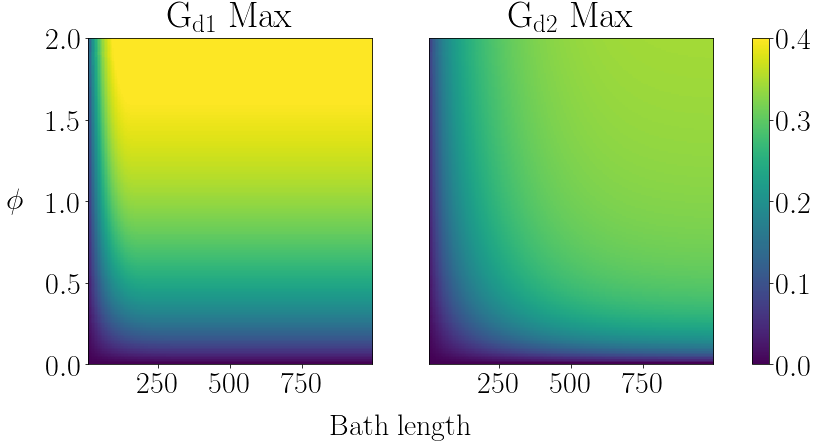

In [18]:
data = pickle.load(open('data/plot_data/2.4_Gd1_Gd2_heatmaps', 'rb'))
num_gluts = len(np.unique(np.array(data['glut'])))

maxes1 = np.array(data['Gd1_max'])
maxes1 = np.flip(np.flip(maxes1.reshape(-1, num_gluts), axis=0).T)
maxes2 = np.array(data['Gd2_max'])
maxes2 = np.flip(np.flip(maxes2.reshape(-1, num_gluts), axis=0).T)
bath = np.array(data['bath_length'])
gluts = np.array(data['glut'])

fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].imshow(maxes1, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()], aspect='auto', vmin=0, vmax=0.4)
pcm = ax[1].imshow(maxes2, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()], aspect='auto', vmin=0, vmax=0.4)
ax[0].set_title('G$_\mathrm{d1}$ Max')
ax[1].set_title('G$_\mathrm{d2}$ Max')

ax[1].set_yticks([])
fig.colorbar(pcm, ax=ax[:])

ax[0].set_ylabel('$\phi$', rotation=0, va='center', labelpad=30)
ax[0].set_xlabel('Bath length', labelpad=20)
ax[0].xaxis.set_label_coords(1.1, -0.15)

# fig.tight_layout()
plt.savefig(save + '2.4_Gd1_Gd2_max.png', bbox_inches='tight')

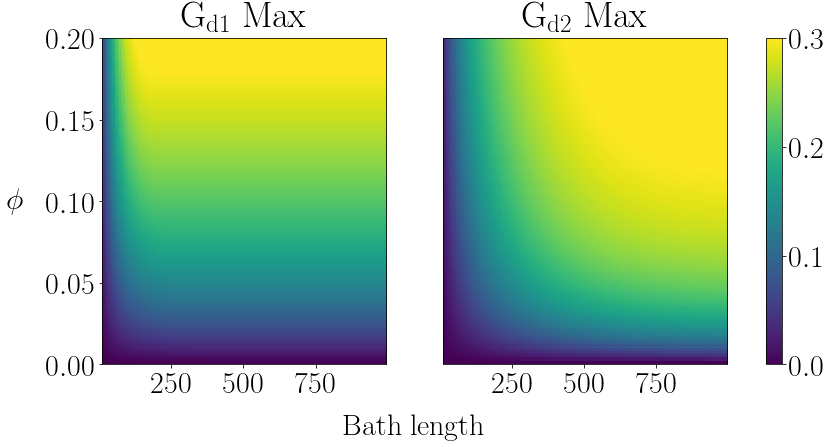

In [26]:
data = pickle.load(open('data/plot_data/2.4_Gd1_Gd2_heatmaps_2', 'rb'))
num_gluts = len(np.unique(np.array(data['glut'])))

maxes1 = np.array(data['Gd1_max'])
maxes1 = np.flip(np.flip(maxes1.reshape(-1, num_gluts), axis=0).T)
maxes2 = np.array(data['Gd2_max'])
maxes2 = np.flip(np.flip(maxes2.reshape(-1, num_gluts), axis=0).T)
bath = np.array(data['bath_length'])
gluts = np.array(data['glut'])

fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].imshow(maxes1, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()+0.002], aspect='auto', vmin=0, vmax=0.3)
pcm = ax[1].imshow(maxes2, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()+0.002], aspect='auto', vmin=0, vmax=0.3)
ax[0].set_title('G$_\mathrm{d1}$ Max')
ax[1].set_title('G$_\mathrm{d2}$ Max')

# ax[0].set_ylim([0, 0.2])
# ax[1].set_ylim([0, 0.2])

# ax[0].set_yticks([0, 0.05, 0.1, 0.15, 0.2])
ax[1].set_yticks([])
fig.colorbar(pcm, ax=ax[:])

ax[0].set_ylabel('$\phi$', rotation=0, va='center', labelpad=30)
ax[0].set_xlabel('Bath length', labelpad=20)
ax[0].xaxis.set_label_coords(1.1, -0.15)

# fig.tight_layout()
plt.savefig(save + '2.4_Gd1_Gd2 2.png', bbox_inches='tight')

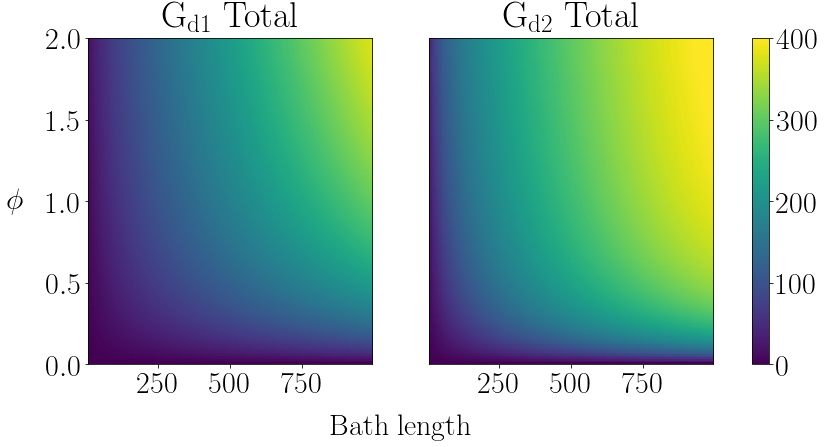

In [136]:
data = pickle.load(open('data/plot_data/2.4_Gd1_Gd2_heatmaps', 'rb'))
num_gluts = len(np.unique(np.array(data['glut'])))

ints1 = np.array(data['Gd1_integral'])
ints1 = np.flip(np.flip(ints1.reshape(-1, num_gluts), axis=0).T)
ints2 = np.array(data['Gd2_integral'])
ints2 = np.flip(np.flip(ints2.reshape(-1, num_gluts), axis=0).T)
bath = np.array(data['bath_length'])
gluts = np.array(data['glut'])

fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].imshow(ints1, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()], aspect='auto', vmin=0, vmax=400)
pcm = ax[1].imshow(ints2, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()], aspect='auto', vmin=0, vmax=400)
ax[0].set_title('G$_\mathrm{d1}$ Total')
ax[1].set_title('G$_\mathrm{d2}$ Total')
fig.colorbar(pcm, ax=ax[:])
ax[1].set_yticks([])

ax[0].set_ylabel('$\phi$', rotation=0, va='center', labelpad=30)
ax[0].set_xlabel('Bath length', labelpad=20)
ax[0].xaxis.set_label_coords(1.1, -0.15)

# fig.tight_layout()

Noticeable things in this plot:
In the max difference plot, there is a smooth band as a function of both concentration and bath time where the difference is zero. For short bath times, Gd1 always dominates, and only for long bath times and small concentrations can Gd2 win
For total, Gd2 dominates always because of the slower falloff

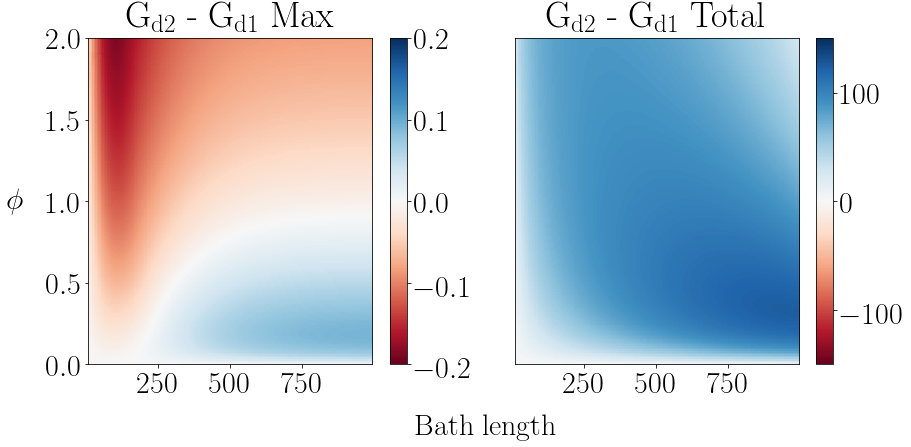

In [295]:
data = pickle.load(open('data/plot_data/2.4_Gd1_Gd2_heatmaps', 'rb'))
num_gluts = len(np.unique(np.array(data['glut'])))

maxes1 = np.array(data['Gd1_max'])
maxes1 = np.flip(np.flip(maxes1.reshape(-1, num_gluts), axis=0).T)
maxes2 = np.array(data['Gd2_max'])
maxes2 = np.flip(np.flip(maxes2.reshape(-1, num_gluts), axis=0).T)
ints1 = np.array(data['Gd1_integral'])
ints1 = np.flip(np.flip(ints1.reshape(-1, num_gluts), axis=0).T)
ints2 = np.array(data['Gd2_integral'])
ints2 = np.flip(np.flip(ints2.reshape(-1, num_gluts), axis=0).T)


max_diff = maxes2 - maxes1
int_diff = ints2 - ints1
bath = np.array(data['bath_length'])
gluts = np.array(data['glut'])

#Remove 0 glut row
max_diff = max_diff[:-1]
int_diff = int_diff[:-1]

fig, ax = plt.subplots(1, 2, figsize=(14,6))
pcm1 = ax[0].imshow(max_diff, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()], aspect='auto',
                   vmin=-0.2, vmax=0.2, cmap='RdBu')
pcm2 = ax[1].imshow(int_diff, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()], aspect='auto',
                   vmin=-150, vmax=150, cmap='RdBu')
ax[0].set_title('G$_\mathrm{d2}$ - G$_\mathrm{d1}$ Max')
ax[1].set_title('G$_\mathrm{d2}$ - G$_\mathrm{d1}$ Total')
fig.colorbar(pcm1, ax=ax[0])
fig.colorbar(pcm2, ax=ax[1])
ax[1].set_yticks([])

ax[0].set_ylabel('$\phi$', rotation=0, va='center', labelpad=30)
ax[0].set_xlabel('Bath length', labelpad=20)
ax[0].xaxis.set_label_coords(1.4, -0.15)

fig.savefig(save + '2.4_Gd1_Gd2_heatmaps.png', bbox_inches='tight')
# fig.tight_layout()

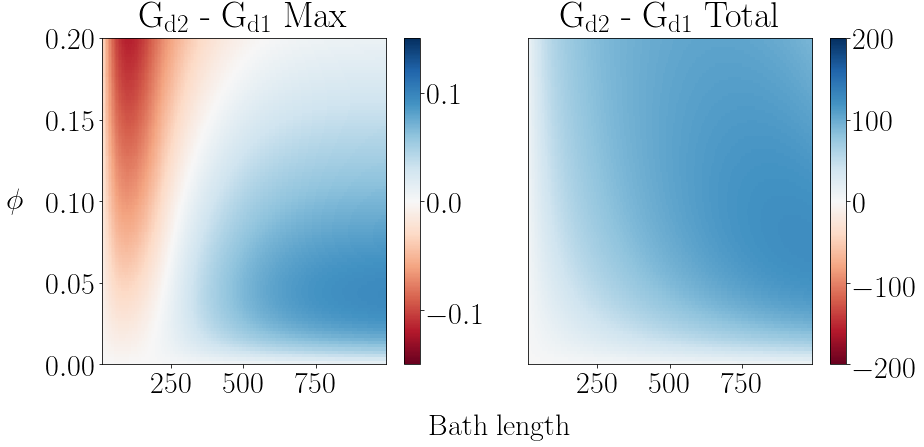

In [29]:
data = pickle.load(open('data/plot_data/2.4_Gd1_Gd2_heatmaps_2', 'rb'))
num_gluts = len(np.unique(np.array(data['glut'])))

maxes1 = np.array(data['Gd1_max'])
maxes1 = np.flip(np.flip(maxes1.reshape(-1, num_gluts), axis=0).T)
maxes2 = np.array(data['Gd2_max'])
maxes2 = np.flip(np.flip(maxes2.reshape(-1, num_gluts), axis=0).T)
ints1 = np.array(data['Gd1_integral'])
ints1 = np.flip(np.flip(ints1.reshape(-1, num_gluts), axis=0).T)
ints2 = np.array(data['Gd2_integral'])
ints2 = np.flip(np.flip(ints2.reshape(-1, num_gluts), axis=0).T)


max_diff = maxes2 - maxes1
int_diff = ints2 - ints1
bath = np.array(data['bath_length'])
gluts = np.array(data['glut'])

#Remove 0 glut row
max_diff = max_diff[:-1]
int_diff = int_diff[:-1]

fig, ax = plt.subplots(1, 2, figsize=(14,6))
pcm1 = ax[0].imshow(max_diff, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()+0.002], aspect='auto',
                   vmin=-0.15, vmax=0.15, cmap='RdBu')
pcm2 = ax[1].imshow(int_diff, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()+0.002], aspect='auto',
                   vmin=-200, vmax=200, cmap='RdBu')
ax[0].set_title('G$_\mathrm{d2}$ - G$_\mathrm{d1}$ Max')
ax[1].set_title('G$_\mathrm{d2}$ - G$_\mathrm{d1}$ Total')
fig.colorbar(pcm1, ax=ax[0])
fig.colorbar(pcm2, ax=ax[1])
ax[1].set_yticks([])

ax[0].set_ylabel('$\phi$', rotation=0, va='center', labelpad=30)
ax[0].set_xlabel('Bath length', labelpad=20)
ax[0].xaxis.set_label_coords(1.4, -0.15)

fig.savefig(save + '2.4_Gd1_Gd2_heatmaps 2.png', bbox_inches='tight')
# fig.tight_layout()

Text(0, 0.5, 'G$_\\mathrm{d2}$ - G$_\\mathrm{d1}$ Max')

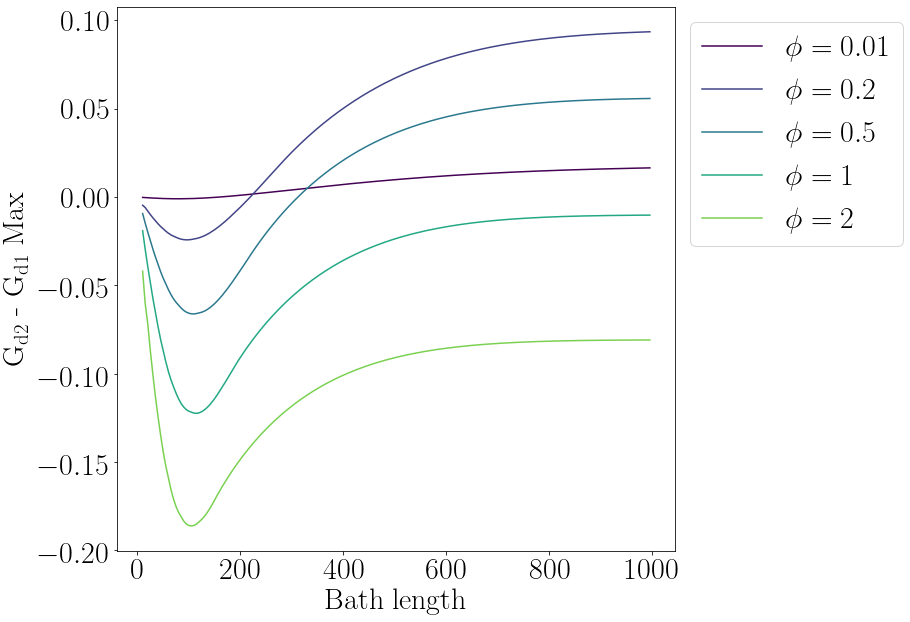

In [162]:
data = pickle.load(open('data/plot_data/2.4_Gd1_Gd2_heatmaps', 'rb'))
num_gluts = len(np.unique(np.array(data['glut'])))

plt.figure(figsize=(10, 10))


norm = matplotlib.colors.Normalize(vmin=0, vmax=2)
cmap = matplotlib.cm.get_cmap('viridis')

maxes1 = np.array(data['Gd1_max'])
maxes1 = np.flip(np.flip(maxes1.reshape(-1, num_gluts), axis=0).T)
maxes2 = np.array(data['Gd2_max'])
maxes2 = np.flip(np.flip(maxes2.reshape(-1, num_gluts), axis=0).T)
ints1 = np.array(data['Gd1_integral'])
ints1 = np.flip(np.flip(ints1.reshape(-1, num_gluts), axis=0).T)
ints2 = np.array(data['Gd2_integral'])
ints2 = np.flip(np.flip(ints2.reshape(-1, num_gluts), axis=0).T)

max_diff = maxes2 - maxes1
int_diff = ints2 - ints1
bath = np.array(data['bath_length'])
bath = np.flip(np.flip(bath.reshape(-1, num_gluts), axis=0).T)
gluts = np.array(data['glut'])
gluts = np.flip(np.flip(gluts.reshape(-1, num_gluts), axis=0).T)

plot_gluts = [0.01, 0.2, 0.5, 1, 2]
colors = [0, 0.2, 0.4, 0.6, 0.8]
glut_indices = np.arange(0, 2.01, 0.01)
for i, glut in enumerate(plot_gluts):
    row_index = num_gluts - np.argmax(glut_indices == glut) - 1
    plt.plot(bath[row_index], max_diff[row_index], 
             c=cmap(colors[i]), label='$\phi=' + str(glut) + '$')
plt.legend(bbox_to_anchor=(1, 1, 0, 0))

plt.xlabel('Bath length')
plt.ylabel('G$_\mathrm{d2}$ - G$_\mathrm{d1}$ Max')

### Thinking about the different time courses of Gd1 and Gd2

Especially about how Gd2 reaches its max long after the bath is completed 

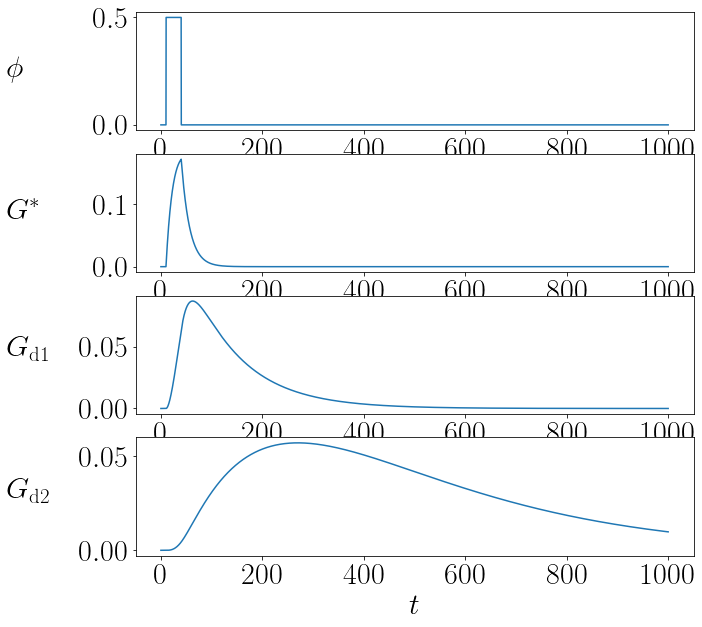

In [88]:
cfg.input_duration = 30
cfg.input_max = 0.5
sol = run_gpcr_experiment('pulse')
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
plot_experiment_plots(['glut', 'Gstar', 'Gd1', 'Gd2'], ax)

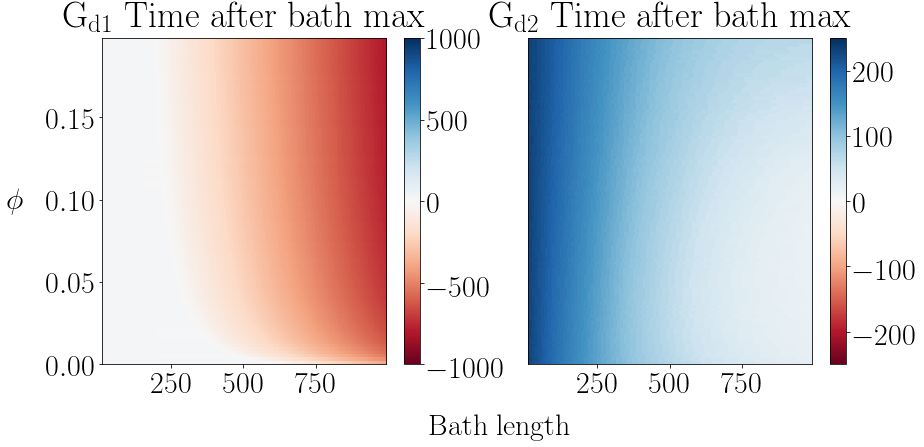

In [31]:
data = pickle.load(open('data/plot_data/2.4_Gd1_Gd2_heatmaps_2', 'rb'))
num_gluts = len(np.unique(np.array(data['glut'])))

max_time1 = np.array(data['Gd1_max_time'])
max_time1 = np.flip(np.flip(max_time1.reshape(-1, num_gluts), axis=0).T)
max_time2 = np.array(data['Gd2_max_time'])
max_time2 = np.flip(np.flip(max_time2.reshape(-1, num_gluts), axis=0).T)
bath = np.array(data['bath_length'])
bath = np.flip(np.flip(bath.reshape(-1, num_gluts), axis=0).T)
max_time1 = max_time1 - bath
max_time2 = max_time2 - bath
gluts = np.array(data['glut'])
#Remove 0 glut row
max_time1 = max_time1[:-1]
max_time2 = max_time2[:-1]

fig, ax = plt.subplots(1, 2, figsize=(14,6))
pcm1 = ax[0].imshow(max_time1, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()], aspect='auto', 
             vmin=-1000, vmax=1000, cmap='RdBu')
pcm2 = ax[1].imshow(max_time2, extent=[bath.min(), bath.max(), gluts.min(), gluts.max()], aspect='auto', 
                   vmin=-250, vmax=250, cmap='RdBu')
ax[0].set_title('G$_\mathrm{d1}$ Time after bath max')
ax[1].set_title('G$_\mathrm{d2}$ Time after bath max')

ax[1].set_yticks([])
fig.colorbar(pcm1, ax=ax[0])
fig.colorbar(pcm2, ax=ax[1])

ax[0].set_ylabel('$\phi$', rotation=0, va='center', labelpad=30)
ax[0].set_xlabel('Bath length', labelpad=20)
ax[0].xaxis.set_label_coords(1.4, -0.15)

# fig.tight_layout()
fig.savefig(save + '2.4.1_Gd1_Gd2_time_after_max 2.png', bbox_inches='tight')

## Desensitization between double baths

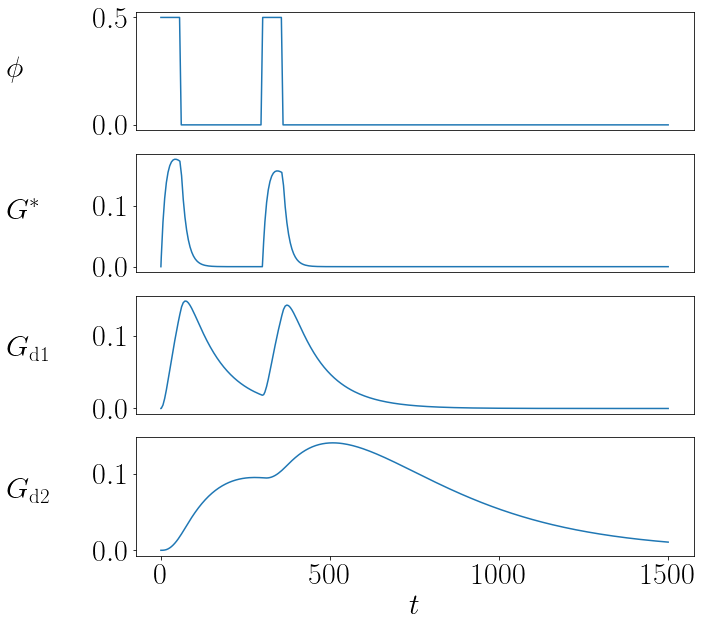

In [171]:
cfg.oscillation_on_duration = 60
cfg.oscillation_off_duration = 240
cfg.num_oscillations = 2
cfg.input_max = 0.5

sol = run_gpcr_experiment('oscillation', t_f=1500, max_step=5)

fig, ax = plt.subplots(4, 1, figsize=(10, 10))
plot_experiment_plots(['glut', 'Gstar', 'Gd1', 'Gd2'], ax)

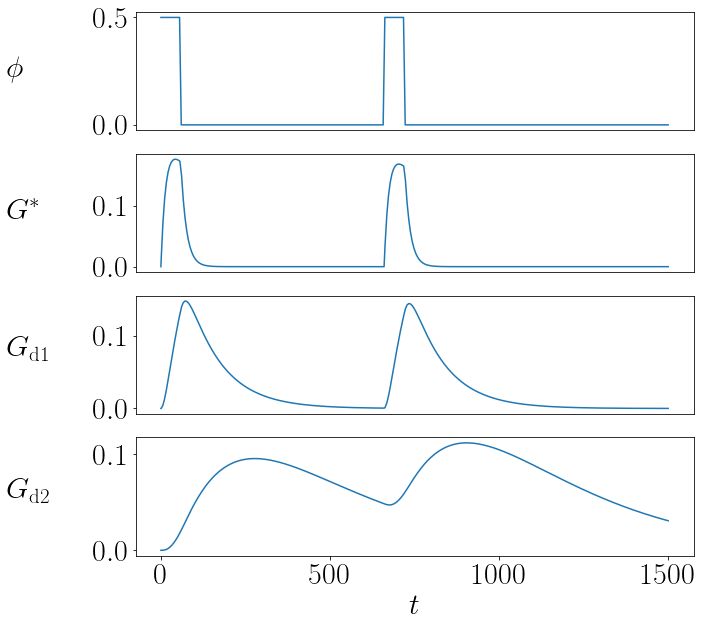

In [299]:
cfg.oscillation_on_duration = 60
cfg.oscillation_off_duration = 600
cfg.num_oscillations = 2
cfg.input_max = 0.5

sol = run_gpcr_experiment('oscillation', t_f=1500, max_step=5)

fig, ax = plt.subplots(4, 1, figsize=(10, 10))
plot_experiment_plots(['glut', 'Gstar', 'Gd1', 'Gd2'], ax)

fig.savefig(save+'2.5_double_bath_example.png', bbox_inches='tight')

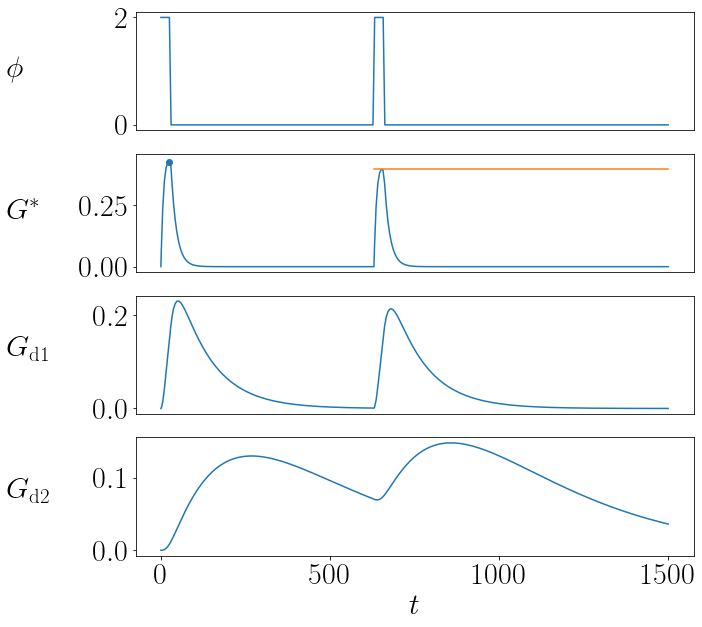

In [246]:
cfg.oscillation_on_duration = 30
cfg.oscillation_off_duration = 600
cfg.num_oscillations = 2
cfg.input_max = 2

sol = run_gpcr_experiment('oscillation', t_f=1500, max_step=5)

fig, ax = plt.subplots(4, 1, figsize=(10, 10))
plot_experiment_plots(['glut', 'Gstar', 'Gd1', 'Gd2'], ax)

ax[1].scatter([cfg.t[cfg.Gstar[cfg.t < on + off].argmax()]], Gstar_max1)
ax[1].plot([t2.min(), 1500], [Gstar_max2, Gstar_max2])

In [256]:
on = 30
off = 600
Gstar_max1 = cfg.Gstar[cfg.t < on + off].max()
Gstar_max2 = cfg.Gstar[cfg.t > on + off].max()
Gstar_max2 / Gstar_max1

g = np.array(data['30_Gstar_max_ratio']).reshape(-1, num_gluts)
g1 = np.array(data['30_Gstar_max_1']).reshape(-1, num_gluts)
g2 = np.array(data['30_Gstar_max_2']).reshape(-1, num_gluts)

off = np.array(data['off_duration']).reshape(-1, num_gluts)
gluts = np.array(data['glut']).reshape(-1, num_gluts)

g[(gluts == 2) & (off == 600)]
max2 = g2[(gluts == 2) & (off == 600)]
max1 = g1[(gluts == 2) & (off == 600)]

In [32]:
#Data collection
concentrations = np.arange(0, 0.2, 0.01)
# oscillation_on_durations = [30, 60, 120]
oscillation_on_durations = [60]
oscillation_off_durations = np.arange(0, 1201, 10)

cfg.num_oscillations = 2

save_dict = {
    'off_duration': [],
    'glut': []
}

keys = ['Gstar_max_1', 'Gstar_max_2', 'Gstar_max_ratio', 'Gd1_max_1', 
        'Gd1_max_2', 'Gd1_max_ratio', 'Gd1_at_start_of_2nd_bath', 'Gd1_recovery', 
        'Gd2_max_1', 'Gd2_max_2', 'Gd2_max_ratio', 
        'Gd2_at_start_of_2nd_bath', 'Gd2_recovery']

for key in keys:
    for on in oscillation_on_durations:
        save_dict[str(on) + '_' + key] = []

for i, on in enumerate(oscillation_on_durations):
    for off in tqdm(oscillation_off_durations):
        for glut in concentrations:
            if i == 0:
                save_dict['glut'].append(glut)
                save_dict['off_duration'].append(off)
                
            cfg.oscillation_on_duration = on
            cfg.oscillation_off_duration = off
            cfg.input_max = glut

            sol = run_gpcr_experiment('oscillation', max_step=5, t_f=1500)

            #Ratio of Max Gstars from the baths
            Gstar_max1 = cfg.Gstar[cfg.t < on + off].max()
            Gstar_max2 = cfg.Gstar[cfg.t > on + off].max()
            ratio = Gstar_max2 / Gstar_max1
            save_dict[str(on) + '_Gstar_max_ratio'].append(ratio)
            save_dict[str(on) + '_Gstar_max_1'].append(Gstar_max1)
            save_dict[str(on) + '_Gstar_max_2'].append(Gstar_max2)

            #Gd1 data
            Gd1_max1 = cfg.Gd1[cfg.t < on + off].max()
            Gd1_max2 = cfg.Gd1[cfg.t > on + off].max()
            ratio = Gd1_max2 / Gd1_max1
            Gd1_before_bath = cfg.Gd1[cfg.t < on + off][-1]
            recovery = Gd1_before_bath / Gd1_max1
            save_dict[str(on) + '_Gd1_max_1'].append(Gd1_max1)
            save_dict[str(on) + '_Gd1_max_2'].append(Gd1_max2)
            save_dict[str(on) + '_Gd1_max_ratio'].append(ratio)
            save_dict[str(on) + '_Gd1_at_start_of_2nd_bath'].append(Gd1_before_bath)
            save_dict[str(on) + '_Gd1_recovery'].append(recovery)

            #Gd2 data
            Gd2_max1 = cfg.Gd2[cfg.t < on + off].max()
            Gd2_max2 = cfg.Gd2[cfg.t > on + off].max()
            ratio = Gd2_max2 / Gd2_max1
            Gd2_before_bath = cfg.Gd2[cfg.t < on + off][-1]
            recovery = Gd2_before_bath / Gd2_max1
            save_dict[str(on) + '_Gd2_max_1'].append(Gd2_max1)
            save_dict[str(on) + '_Gd2_max_2'].append(Gd2_max2)
            save_dict[str(on) + '_Gd2_max_ratio'].append(ratio)
            save_dict[str(on) + '_Gd2_at_start_of_2nd_bath'].append(Gd2_before_bath)
            save_dict[str(on) + '_Gd2_recovery'].append(recovery)
                
pickle.dump(save_dict, open('data/plot_data/2.5_double_bath_2', 'wb'))

  0%|                                                                                          | 0/121 [00:00<?, ?it/s]C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [02:11<00:00,  1.09s/it]


### Relative G* Peaks between two baths

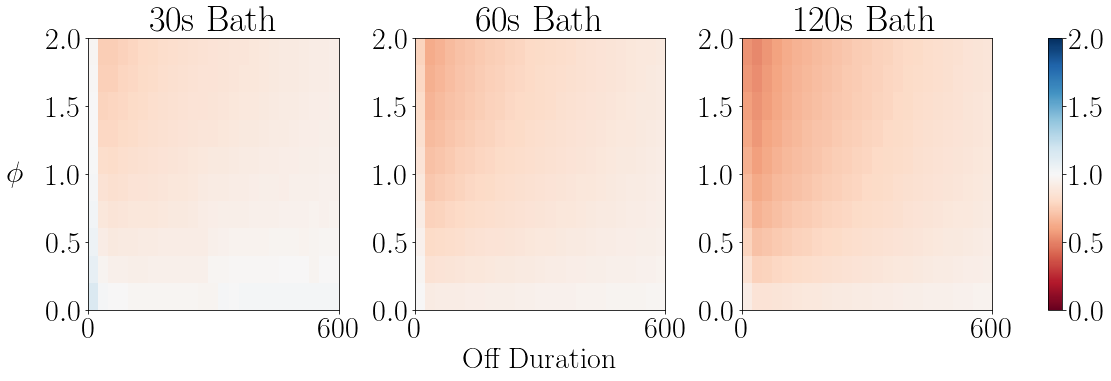

In [269]:
data = pickle.load(open('data/plot_data/2.5_double_bath', 'rb'))
num_gluts = len(np.unique(data['glut']))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ratios30 = np.flip(np.flip(np.array(data['30_Gstar_max_ratio']).reshape(-1, num_gluts), axis=0).T)[:-1]
ratios60 = np.flip(np.flip(np.array(data['60_Gstar_max_ratio']).reshape(-1, num_gluts), axis=0).T)[:-1]
ratios120 = np.flip(np.flip(np.array(data['120_Gstar_max_ratio']).reshape(-1, num_gluts), axis=0).T)[:-1]
off = np.array(data['off_duration'])
gluts = np.array(data['glut'])
ax[0].imshow(ratios30, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=2)
ax[1].imshow(ratios60, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=2)
pcm = ax[2].imshow(ratios120, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
                   aspect='auto', vmin=0, vmax=2)

ax[0].set_xticks([0, 600])
ax[1].set_xticks([0, 600])
ax[2].set_xticks([0, 600])

ax[0].set_title('30s Bath')
ax[1].set_title('60s Bath')
ax[2].set_title('120s Bath')

ax[0].set_ylabel('$\phi$', va='center', rotation=0, labelpad=30)
ax[1].set_xlabel('Off Duration')
fig.tight_layout()
plt.colorbar(pcm, ax=ax[:])

Gd1 recovery is almost independent of bath duration and concentration, Gd2 recovery is more dependent on concentration as it bath duration increases

### Gd1 and Gd2 amount of recovery by start of 2nd bath

In [35]:
save_dict.keys()

dict_keys(['off_duration', 'glut', '60_Gstar_max_1', '60_Gstar_max_2', '60_Gstar_max_ratio', '60_Gd1_max_1', '60_Gd1_max_2', '60_Gd1_max_ratio', '60_Gd1_at_start_of_2nd_bath', '60_Gd1_recovery', '60_Gd2_max_1', '60_Gd2_max_2', '60_Gd2_max_ratio', '60_Gd2_at_start_of_2nd_bath', '60_Gd2_recovery'])

KeyError: '30_Gd1_recovery'

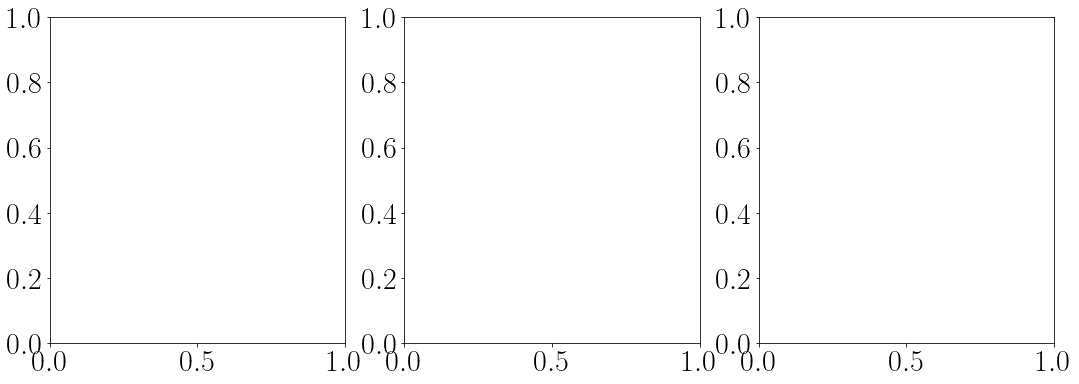

In [33]:
data = pickle.load(open('data/plot_data/2.5_double_bath_2', 'rb'))
num_gluts = len(np.unique(data['glut']))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
Gd1_recovery30 = np.flip(np.flip(1-np.array(data['30_Gd1_recovery']).reshape(-1, num_gluts), axis=0).T)[:-1]
Gd1_recovery60 = np.flip(np.flip(1-np.array(data['60_Gd1_recovery']).reshape(-1, num_gluts), axis=0).T)[:-1]
Gd1_recovery120 = np.flip(np.flip(1-np.array(data['120_Gd1_recovery']).reshape(-1, num_gluts), axis=0).T)[:-1]
off = np.array(data['off_duration'])
gluts = np.array(data['glut'])
ax[0].imshow(Gd1_recovery30, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=1)
ax[1].imshow(Gd1_recovery60, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=1)
pcm = ax[2].imshow(Gd1_recovery120, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
                   aspect='auto', vmin=0, vmax=1)

ax[0].set_xticks([0, 600])
ax[1].set_xticks([0, 600])
ax[2].set_xticks([0, 600])

ax[0].set_title('30s Bath')
ax[1].set_title('60s Bath')
ax[2].set_title('120s Bath')

ax[0].set_ylabel('$\phi$', va='center', rotation=0, labelpad=30)
ax[1].set_xlabel('Off Duration')
fig.tight_layout()
plt.colorbar(pcm, ax=ax[:])

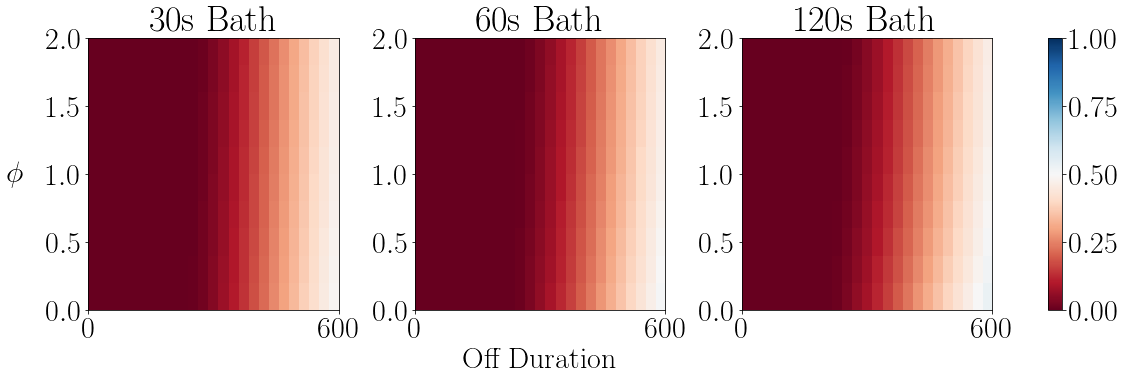

In [273]:
data = pickle.load(open('data/plot_data/2.5_double_bath', 'rb'))
num_gluts = len(np.unique(data['glut']))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
Gd2_recovery30 = np.flip(np.flip(1-np.array(data['30_Gd2_recovery']).reshape(-1, num_gluts), axis=0).T)[:-1]
Gd2_recovery60 = np.flip(np.flip(1-np.array(data['60_Gd2_recovery']).reshape(-1, num_gluts), axis=0).T)[:-1]
Gd2_recovery120 = np.flip(np.flip(1-np.array(data['120_Gd2_recovery']).reshape(-1, num_gluts), axis=0).T)[:-1]
off = np.array(data['off_duration'])
gluts = np.array(data['glut'])
ax[0].imshow(Gd2_recovery30, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=1)
ax[1].imshow(Gd2_recovery60, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=1)
pcm = ax[2].imshow(Gd2_recovery120, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
                   aspect='auto', vmin=0, vmax=1)

ax[0].set_xticks([0, 600])
ax[1].set_xticks([0, 600])
ax[2].set_xticks([0, 600])

ax[0].set_title('30s Bath')
ax[1].set_title('60s Bath')
ax[2].set_title('120s Bath')

ax[0].set_ylabel('$\phi$', va='center', rotation=0, labelpad=30)
ax[1].set_xlabel('Off Duration')
fig.tight_layout()
plt.colorbar(pcm, ax=ax[:])

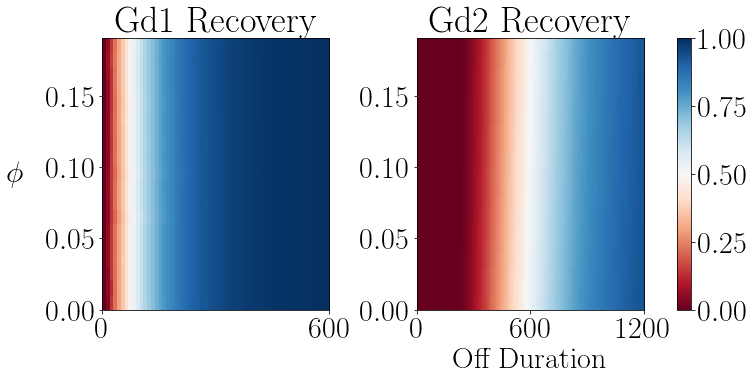

In [36]:
data = pickle.load(open('data/plot_data/2.5_double_bath_2', 'rb'))
num_gluts = len(np.unique(data['glut']))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
Gd1_recovery60 = np.flip(np.flip(1-np.array(data['60_Gd1_recovery']).reshape(-1, num_gluts), axis=0).T)[:-1]
Gd2_recovery60 = np.flip(np.flip(1-np.array(data['60_Gd2_recovery']).reshape(-1, num_gluts), axis=0).T)[:-1]
off = np.array(data['off_duration'])
gluts = np.array(data['glut'])
ax[0].imshow(Gd1_recovery60, cmap='RdBu', extent=[off.min(), 1200, gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=1)
pcm = ax[1].imshow(Gd2_recovery60, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=1)

ax[0].set_xticks([0, 600])
ax[0].set_xlim([0, 600])
ax[1].set_xticks([0, 600, 1200])

ax[0].set_title('Gd1 Recovery')
ax[1].set_title('Gd2 Recovery')

ax[0].set_ylabel('$\phi$', va='center', rotation=0, labelpad=30)
ax[1].set_xlabel('Off Duration')
fig.tight_layout()
plt.colorbar(pcm, ax=ax[:])

plt.savefig(save + '2.5_60s_double_bath_recovery_2.png', bbox_inches='tight')

### Gd1 and Gd2 ratio of peak heights between two baths

Slightly interesting on these plots is that for Gd2, the second peak is always larger than the first. In the case of Gd1, for longer baths the second peak is actually smaller, even when recovery is incomplete (look at recovery chart above). This must mean that Gd2 is dominating for longer baths to the point where Gd1 can't even grow as large). This contends a little with the fact that G* recovery isn't complete early on, but this doesn't affect the Gd1 relative peaks (looking at 120s bath, for short rest, G* suffers the most), but even though Gd1 is dependent on G*, this early part doesn't look that important. 

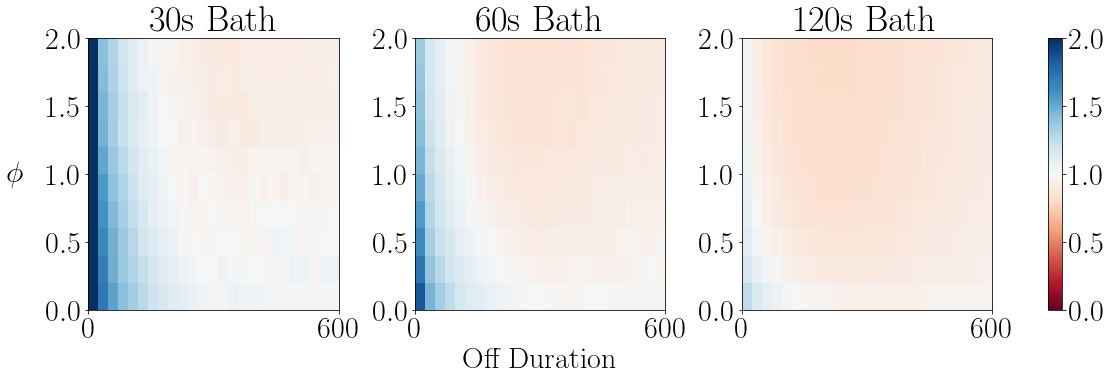

In [277]:
data = pickle.load(open('data/plot_data/2.5_double_bath', 'rb'))
num_gluts = len(np.unique(data['glut']))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
Gd1_ratio30 = np.flip(np.flip(np.array(data['30_Gd1_max_ratio']).reshape(-1, num_gluts), axis=0).T)[:-1]
Gd1_ratio60 = np.flip(np.flip(np.array(data['60_Gd1_max_ratio']).reshape(-1, num_gluts), axis=0).T)[:-1]
Gd1_ratio120 = np.flip(np.flip(np.array(data['120_Gd1_max_ratio']).reshape(-1, num_gluts), axis=0).T)[:-1]
off = np.array(data['off_duration'])
gluts = np.array(data['glut'])
ax[0].imshow(Gd1_ratio30, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=2)
ax[1].imshow(Gd1_ratio60, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=2)
pcm = ax[2].imshow(Gd1_ratio120, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
                   aspect='auto', vmin=0, vmax=2)

ax[0].set_xticks([0, 600])
ax[1].set_xticks([0, 600])
ax[2].set_xticks([0, 600])

ax[0].set_title('30s Bath')
ax[1].set_title('60s Bath')
ax[2].set_title('120s Bath')

ax[0].set_ylabel('$\phi$', va='center', rotation=0, labelpad=30)
ax[1].set_xlabel('Off Duration')
fig.tight_layout()
plt.colorbar(pcm, ax=ax[:])

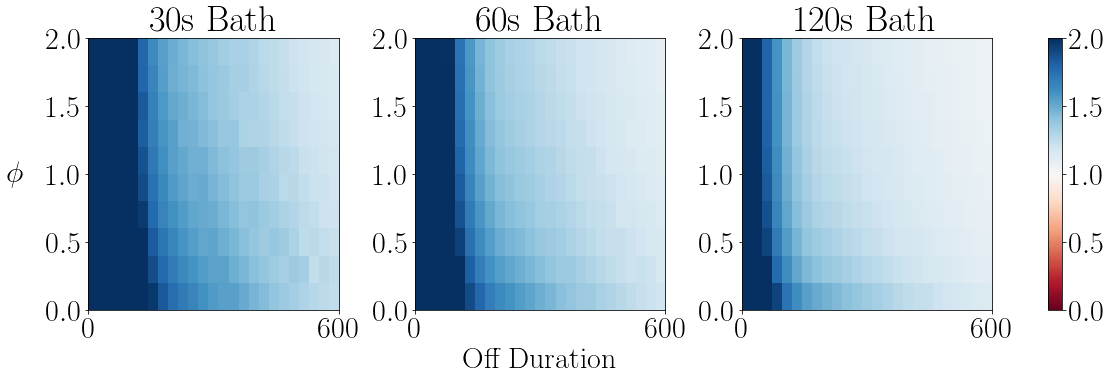

In [278]:
data = pickle.load(open('data/plot_data/2.5_double_bath', 'rb'))
num_gluts = len(np.unique(data['glut']))

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
Gd2_ratio30 = np.flip(np.flip(np.array(data['30_Gd2_max_ratio']).reshape(-1, num_gluts), axis=0).T)[:-1]
Gd2_ratio60 = np.flip(np.flip(np.array(data['60_Gd2_max_ratio']).reshape(-1, num_gluts), axis=0).T)[:-1]
Gd2_ratio120 = np.flip(np.flip(np.array(data['120_Gd2_max_ratio']).reshape(-1, num_gluts), axis=0).T)[:-1]
off = np.array(data['off_duration'])
gluts = np.array(data['glut'])
ax[0].imshow(Gd2_ratio30, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=2)
ax[1].imshow(Gd2_ratio60, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
             aspect='auto', vmin=0, vmax=2)
pcm = ax[2].imshow(Gd2_ratio120, cmap='RdBu', extent=[off.min(), off.max(), gluts.min(), gluts.max()], 
                   aspect='auto', vmin=0, vmax=2)

ax[0].set_xticks([0, 600])
ax[1].set_xticks([0, 600])
ax[2].set_xticks([0, 600])

ax[0].set_title('30s Bath')
ax[1].set_title('60s Bath')
ax[2].set_title('120s Bath')

ax[0].set_ylabel('$\phi$', va='center', rotation=0, labelpad=30)
ax[1].set_xlabel('Off Duration')
fig.tight_layout()
plt.colorbar(pcm, ax=ax[:])

### G* peak heights relative to Gd1 and Gd2 levels

To see how G* is actually affected by desensitization, we can aritifically induce a level of desensitization by changing the amount of G available, while turning off Gd1 and Gd2

In [38]:
def gpcr_ode_equations_desensitized(t, x, glutamate_input_type='pulse', Gmax=1):
    '''
    ODE equations following the GPCR equations given earlier
    x[0] = Gstar
    x[1] = Gd1
    x[2] = Gd2
    x[3] = lambda
    This returns x_dot, which is an array of the right hand sides of 
    each of the ODE equations in the same order as above
    
    input_type: given by ODE args, can be 'pulse' or 'step'
    gstar_to_d2: whether to have the G* -> Gd2 arrow on or off (True/False)
    sat_kinetics: whether lambda should act by saturating kinetics
    '''    
    Gstar = x[0]
    lamb = x[1]
    G = Gmax - Gstar
    
    #query our glutamate function for what level glutamate is input
    glut = get_input_value(glutamate_input_type, t)
    
    x_dot = np.zeros(2)
        
    x_dot[0] = cfg.kp*glut*G - cfg.km*Gstar - cfg.kd1*Gstar - cfg.kd2*Gstar*lamb
    x_dot[1] = cfg.klp*Gstar - cfg.klm*lamb
        
    return x_dot



def run_gpcr_experiment_desensitized(input_type='pulse', t_f=1000, max_step=0.1, Gmax=1):
    '''
    Run an experiment to just analyze GPCR dynamics alone
    '''
    cfg.t_f = t_f
    sol = scipy.integrate.solve_ivp(gpcr_ode_equations_desensitized, [cfg.t_0, t_f], [0, 0],
            args=[input_type, Gmax], max_step=max_step)

    cfg.t = sol.t
    cfg.Gstar = sol.y[0]
    cfg.lamb = sol.y[1]
    cfg.G = Gmax - sol.y[0]
    cfg.t_input, cfg.glut = get_input_plot(input_type, max_step=max_step)

    return sol



gluts = np.linspace(0, 0.5, 100)
Gmaxs = [1, 0.8, 0.6, 0.4]
save_dict = {
    'gluts': gluts
}
cfg.input_duration = 120
for Gmax in Gmaxs:
    Gstar_maxs = []
    for glut in tqdm(gluts):
        cfg.input_max = glut
        sol = run_gpcr_experiment_desensitized(Gmax=Gmax, t_f=360, max_step=2)
        Gstar_maxs.append(np.max(cfg.Gstar))
    save_dict[Gmax] = Gstar_maxs

pickle.dump(save_dict, open('data/plot_data/2.5.4_Gstar_desensitization_2', 'wb'))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 33.51it/s]


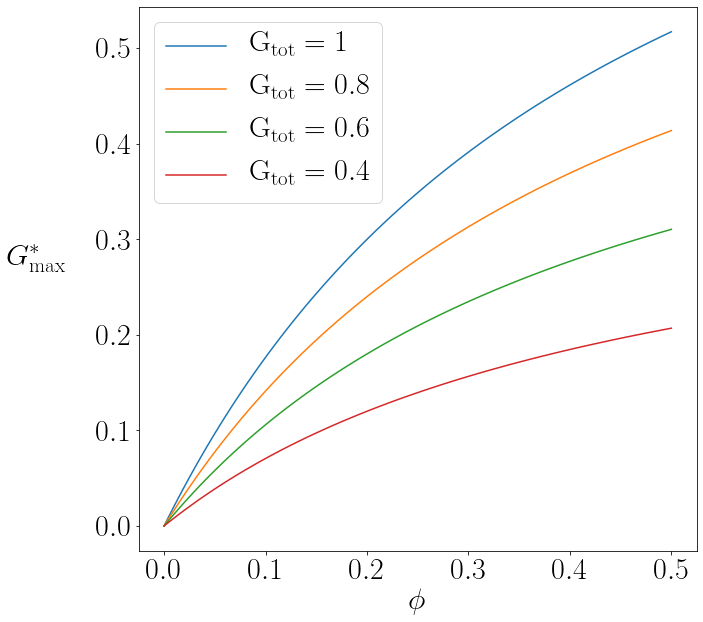

In [39]:
data = pickle.load(open('data/plot_data/2.5.4_Gstar_desensitization_2', 'rb'))
plt.figure(figsize=(10, 10))
for Gmax in [1, 0.8, 0.6, 0.4]:
    plt.plot(data['gluts'], data[Gmax], label='G$_\mathrm{tot}=' + str(Gmax) + '$')
    
plt.xlabel('$\phi$')
plt.ylabel('$G^*_\mathrm{max}$', rotation=0, ha='right', labelpad=30)
plt.legend()

plt.savefig(save + '2.5.4_Gstar_desensitization_2.png', bbox_inches='tight')
    

## Double Bath Model Confirmation

We want to make some clear double bath experiment simulations showing how desensitization works clearly

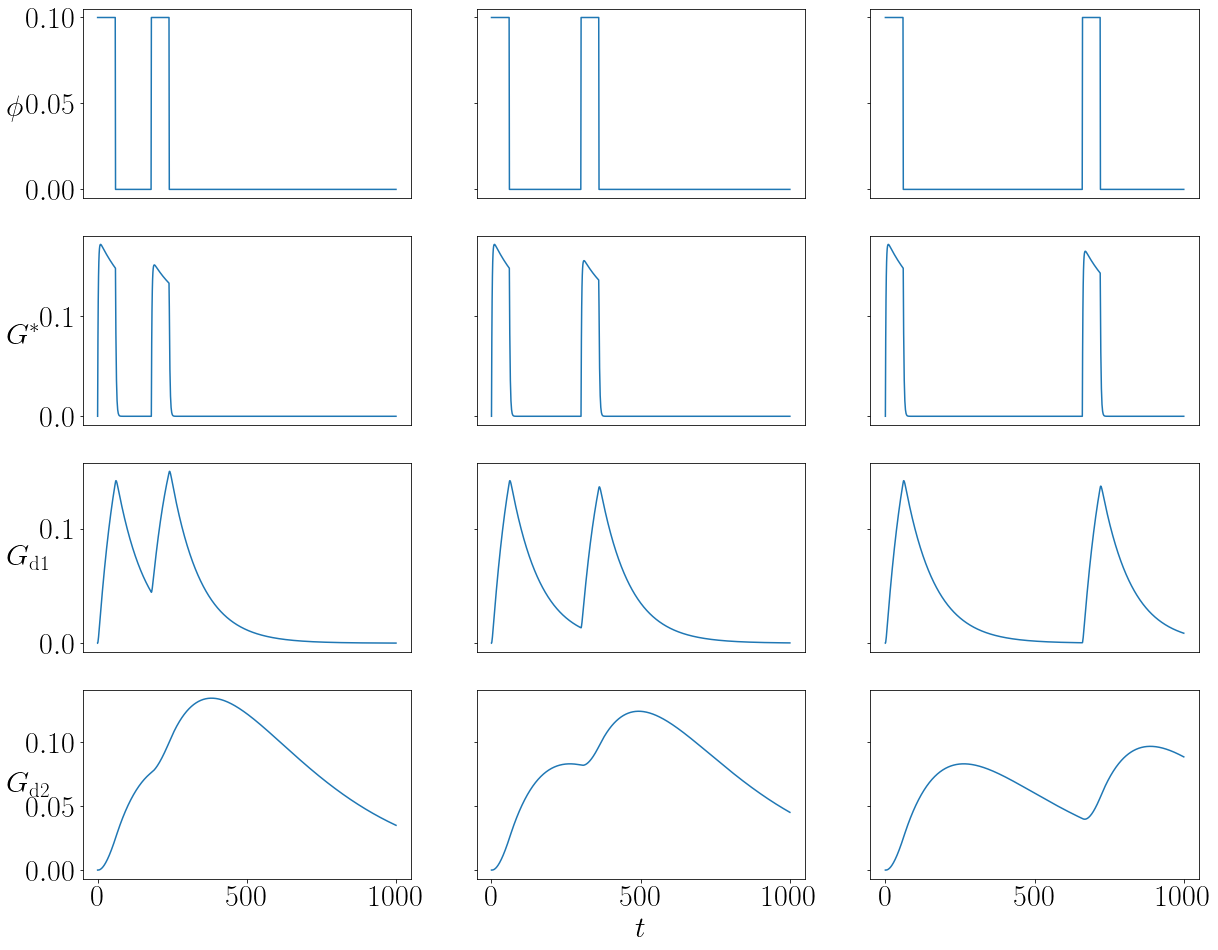

In [43]:
# on_durations = [60]
off_durations = [120, 240, 600]

fig, axs = plt.subplots(4, 3, figsize=(20, 16), sharey='row')

cfg.oscillation_on_duration = 60
cfg.input_max = 0.1
for i, off in enumerate(off_durations):
    cfg.oscillation_off_duration = off
    sol = run_gpcr_experiment('oscillation', t_f=1000, max_step=1)
    add_ylabels = bool(i == 0)
    add_xlabel = bool(i == 1)
    plot_experiment_plots(['glut', 'Gstar', 'Gd1', 'Gd2'], axs[:, i], remove_xticks=True, add_ylabels=add_ylabels,
                         add_xlabel=add_xlabel)
    

# IP3, Calcium Modeling

## Delay Rescue via initial input

From these plots, we see that the initial delay is removed by starting with an initial pulse of higher G* concentration. If we start with a lower concentration, this does not significantly help

C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)


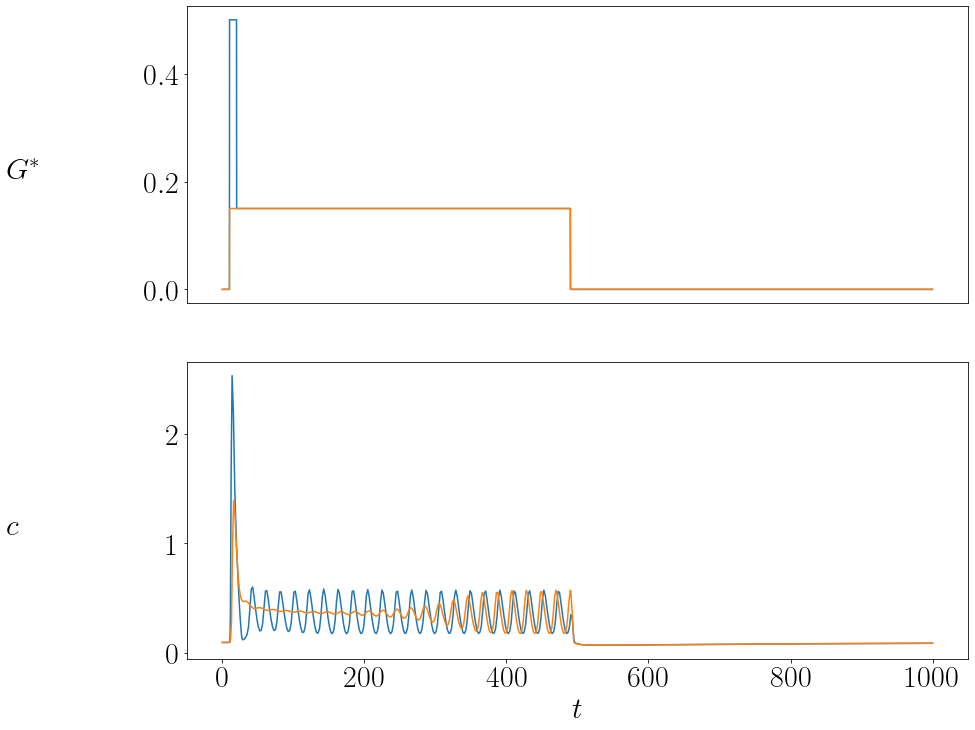

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(14,12), sharey='row')
cfg.v_3k = 0.1

cfg.custom_input_times = [0, 10, 20, 490]
cfg.custom_input_vals = [0, 0.5, 0.15, 0]
sol = run_Gstar_controlled_experiment('custom', max_step=2)
plot_experiment_plots(['Gstar', 'c'], ax[:])

cfg.input_max = 0.15
cfg.input_duration = 480
cfg.input_start = 10
sol = run_Gstar_controlled_experiment('pulse', max_step=2)
plot_experiment_plots(['Gstar', 'c'], ax[:], add_ylabels=False)

plt.savefig(save + '3.1_delay_rescue_initial_burst.png', bbox_inches='tight')

C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)


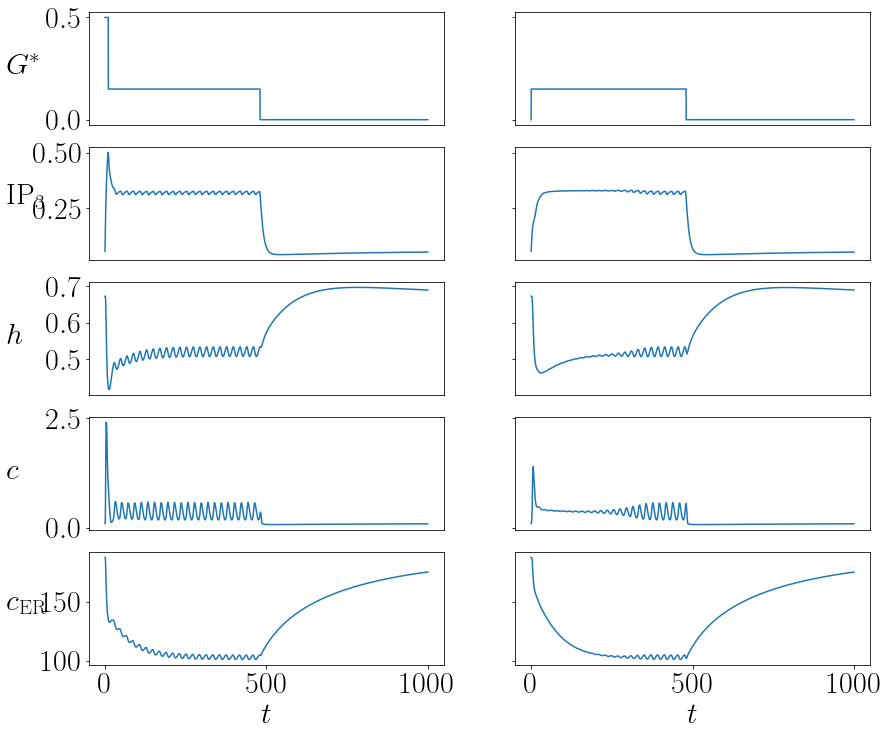

In [197]:
fig, ax = plt.subplots(5, 2, figsize=(14,12), sharey='row')
cfg.v_3k = 0.1

cfg.custom_input_times = [0, 10, 480]
cfg.custom_input_vals = [0.5, 0.15, 0]
sol = run_Gstar_controlled_experiment('custom', max_step=2)
plot_experiment_plots(['Gstar', 'p', 'h', 'c', 'c_er'], ax[:, 0])

cfg.input_max = 0.15
cfg.input_duration = 480
sol = run_Gstar_controlled_experiment('pulse', max_step=2)
plot_experiment_plots(['Gstar', 'p', 'h', 'c', 'c_er'], ax[:, 1], add_ylabels=False)

C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)


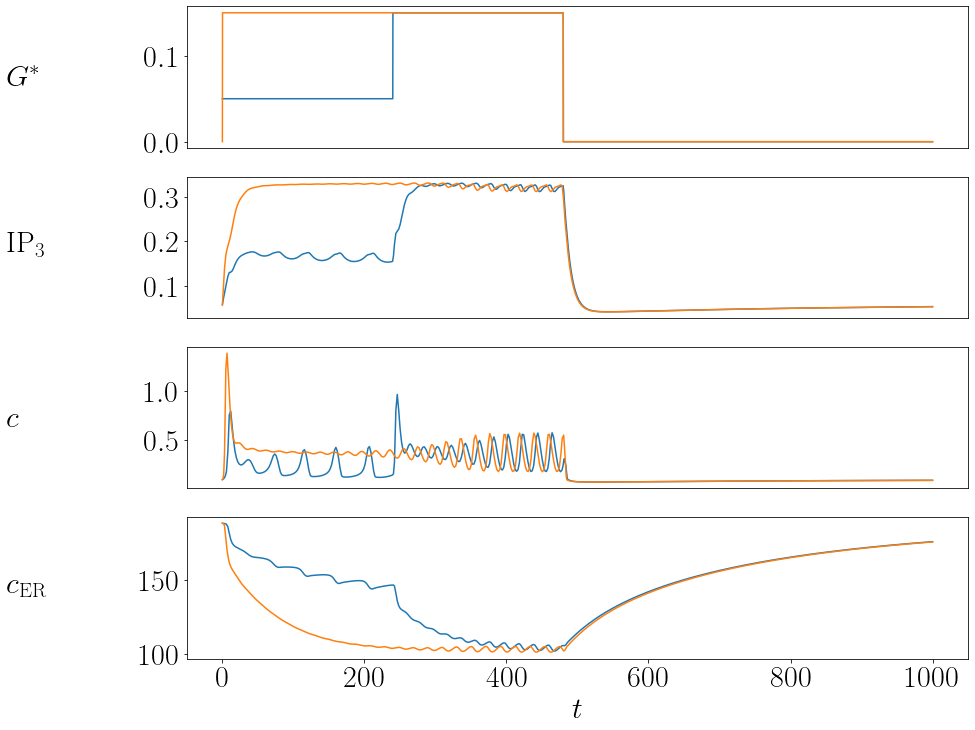

In [199]:
fig, ax = plt.subplots(4, 1, figsize=(14,12), sharey='row')

cfg.all_init = all_init
cfg.custom_input_vals = [0.05, 0.15, 0]
cfg.custom_input_times = [0, 240, 480]
sol = run_Gstar_controlled_experiment('custom', max_step=2)
plot_experiment_plots(['Gstar', 'p', 'c', 'c_er'], ax)

cfg.input_max = 0.15
cfg.input_duration = 480
cfg.input_start = 0
sol = run_Gstar_controlled_experiment('pulse', max_step=2)
plot_experiment_plots(['Gstar', 'p', 'c', 'c_er'], ax, add_ylabels=False)

C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)


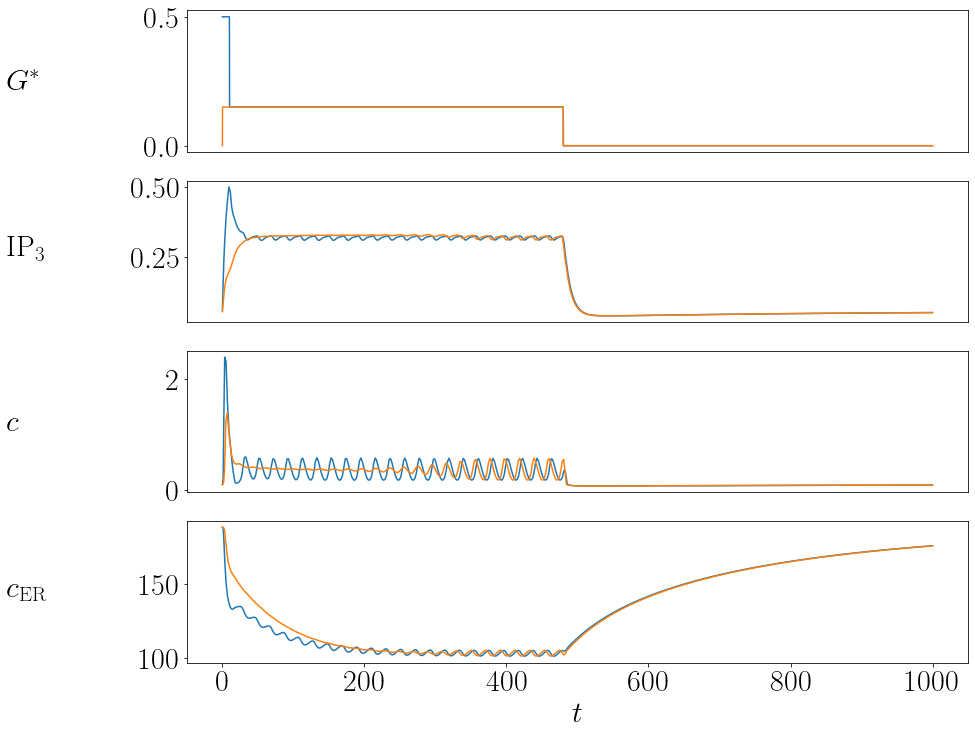

In [200]:
fig, ax = plt.subplots(4, 1, figsize=(14,12), sharey='row')

cfg.all_init = all_init
cfg.custom_input_vals = [0.5, 0.15, 0]
cfg.custom_input_times = [0, 10, 480]
sol = run_Gstar_controlled_experiment('custom', max_step=2)
plot_experiment_plots(['Gstar', 'p', 'c', 'c_er'], ax)

cfg.input_max = 0.15
cfg.input_duration = 480
cfg.input_start = 0
sol = run_Gstar_controlled_experiment('pulse', max_step=2)
plot_experiment_plots(['Gstar', 'p', 'c', 'c_er'], ax, add_ylabels=False)

## Delays with IP3 Input

From this plot, we actually see that delays exist even when using IP3 as an input. I.e., negative feedback is not a requirement to see these delays. The delays only appear for large IP3 input (close to the Hopf bifurcation). One other interesting note is the shape of the calcium spikes. At lower IP3, the calcium spikes have a 'ramping' shape characteristic of being driven by positive feedback, but in the regime of delays, calcium spikes lose this shape, rather having more even spikes. Additionally, we see that in delay regimes the oscillations appear "lifted" above the baseline, oscillating evenly about some point. This may also be indicative of negative feedback being the primary driver. Thus it seems that in the IP3 input model, there is already some inherent "negative feedback"

C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


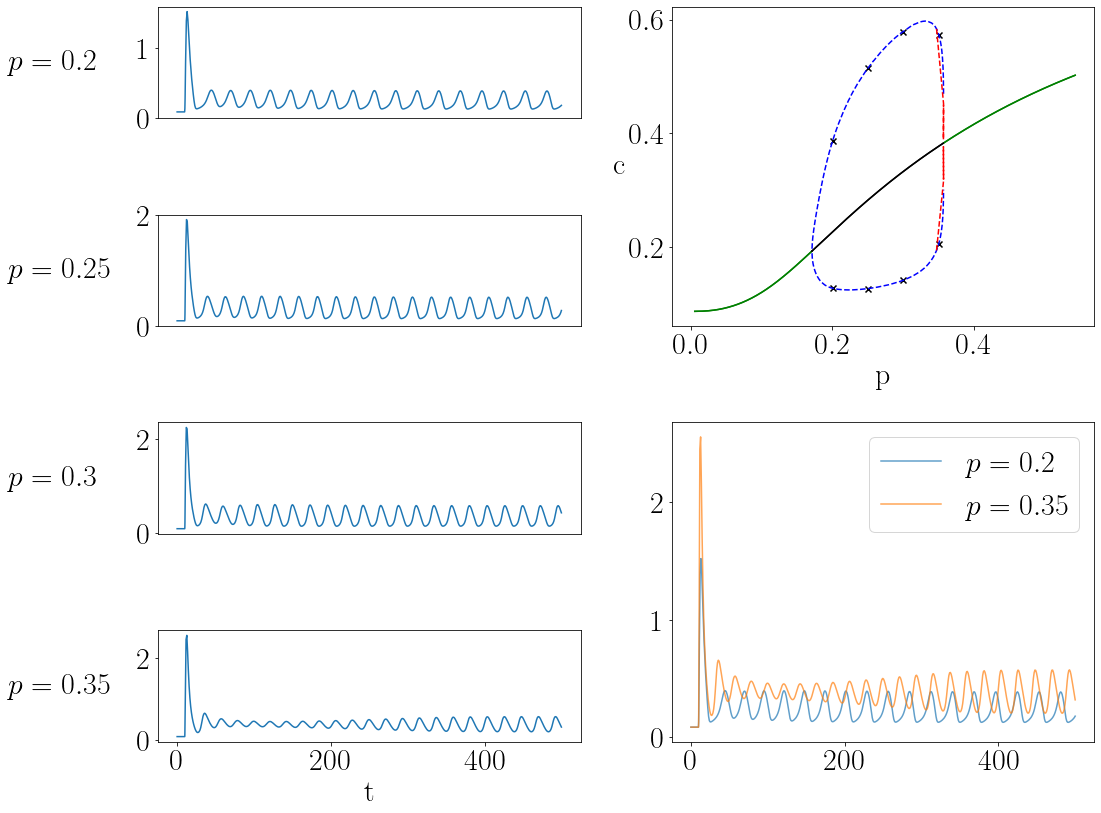

In [15]:
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
gs = fig.add_gridspec(4, 4)
cfg.x_0 = [0.0865415, 36.49084, 0.6255124, 0]
combined_ax = fig.add_subplot(gs[2:, 2:])
axs = []
cfg.input_duration = 1000

for i, p in enumerate([0.2, 0.25, 0.30, 0.35]):
    ax = fig.add_subplot(gs[i, :2])
    cfg.input_max = p
    run_ip3_controlled_experiment('pulse', t_f=500, max_step=1)
    ax.plot(cfg.t, cfg.c)
    if(i == 0 or i == 3):
        combined_ax.plot(cfg.t, cfg.c, label='$p={}$'.format(p), alpha=0.7)
    if(i != 3):
        ax.set_xticks([])
    ax.set_ylabel('$p={}$'.format(p), rotation=0, ha='left', va='center', labelpad=130)
    axs.append(ax)
axs[0].set_yticks([0, 1])
axs[3].set_yticks([0, 2])
axs[3].set_xlabel('t')

ax = fig.add_subplot(gs[:2, 2:])
plot_bifurcation('ip3_ca.dat', ax)
ax.set_xlabel('p')
ax.set_ylabel('c', rotation=0, va='center', ha='right')
fig.tight_layout()
# combined_ax.legend(bbox_to_anchor=(0.7, -0.2, 0, 0))
combined_ax.legend()

#Add p points to bifurcation
data = load_bifurcation_data('ip3_ca.dat')
stable = data[data[3] == 3]
xs = []
ys = []
for p in [0.2, 0.25, 0.3, 0.35]:
    idx = np.argmax(stable[0] > p)
    row = stable.iloc[idx]
    xs.append(row[0])
    ys.append(row[1])
    xs.append(row[0])
    ys.append(row[2])
ax.scatter(xs, ys, marker='x', color='k')

cfg.x_0 = [0.0951442, 34.841184, 0.673079, 0.056767761]

plt.savefig(save + '3.2_delays_with_ip3_input.png', bbox_inches='tight')

## Delays with Gstar Input

Similar ideas are seen in these plots. With low G* calcium spikes have a positive feedback shape, but as negative feedback begins to drive the system there are more delays and an increase of the equilibrium point of oscillation. As v3k increases much higher (0.5), we even see delays in the low G* regime, where the oscillations seem both lifted and with positive shape, as if the negative feedback is interacting with the positive at the same time.

In [10]:
'''
Load data to get 5%, 35%, 65%, 95% of Gstar between Hopf bifurcations
'''
dat = load_bifurcation_data('2_param_Gstar_v3k.dat')

idx2 = dat[4] == 5
idx_max_2 = np.argmax(dat[idx2][1])

idx1 = (dat[4] == 2)
idx_max_1 = np.argmax(dat[idx1][1])

v3ks = [0, 0.1, 0.5]
Gstar_mins = []
Gstar_maxs = []
branch_min_v3k = dat[idx1][1][:idx_max_1]
branch_min_Gstar = dat[idx1][0][:idx_max_1]
branch_max_v3k = dat[idx2][1][:idx_max_2]
branch_max_Gstar = dat[idx2][0][:idx_max_2]

for v3k in v3ks:
    min_idx = branch_min_v3k.index[np.argmax(branch_min_v3k > v3k)]
    max_idx = branch_max_v3k.index[np.argmax(branch_max_v3k > v3k)]
    Gstar_mins.append(branch_min_Gstar[min_idx])
    Gstar_maxs.append(branch_max_Gstar[max_idx])
v3ks = v3ks

### v_3k = 0

C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


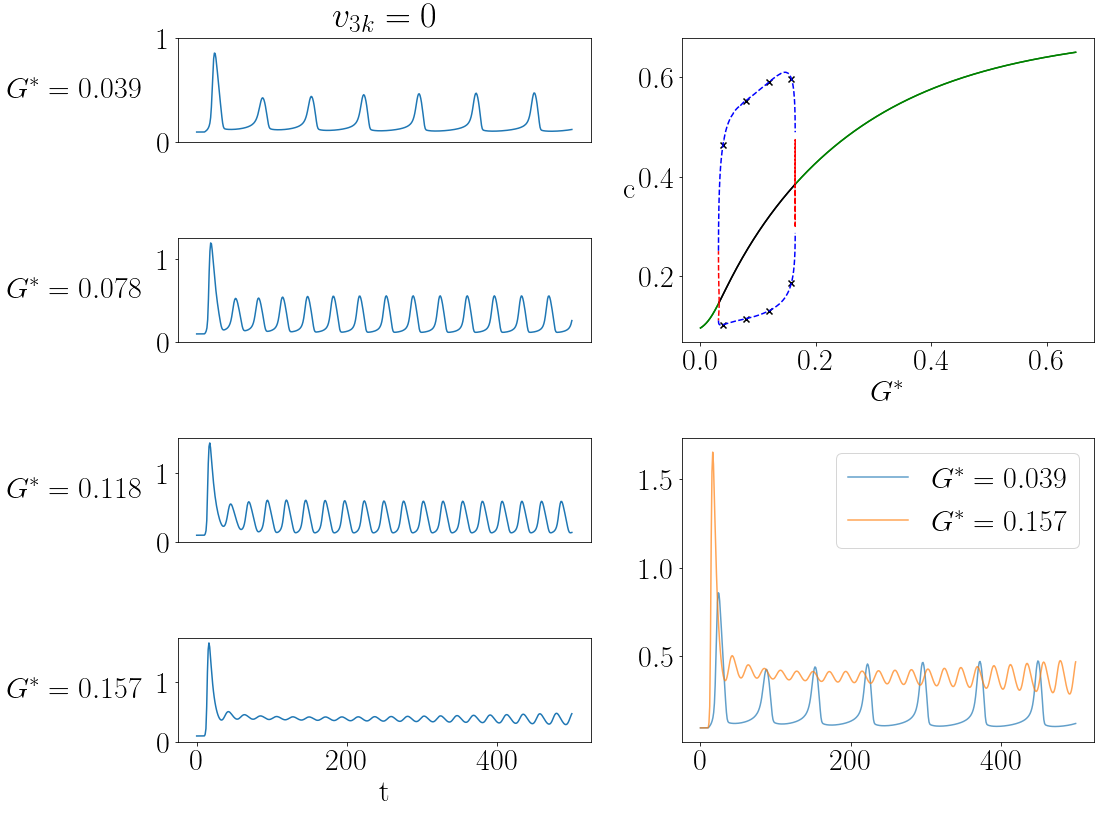

In [16]:
# fig, ax = plt.subplots(4, 1, figsize=(12, 10))
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
gs = fig.add_gridspec(4, 4)
combined_ax = fig.add_subplot(gs[2:, 2:])
axs = []
cfg.input_duration = 1000

ratios = np.linspace(0.05, 0.95, 4)
Gstar_min = Gstar_mins[0]
Gstar_max = Gstar_maxs[0]
Gstar_range = Gstar_max - Gstar_min
Gstars = ratios * Gstar_range + Gstar_min
cfg.v_3k = v3ks[0]

#Run experiments and plot
for i, Gstar in enumerate(Gstars):
    ax = fig.add_subplot(gs[i, :2])
    cfg.input_max = Gstar
    run_Gstar_controlled_experiment('pulse', t_f=500, max_step=1)
    ax.plot(cfg.t, cfg.c)
    if(i == 0 or i == 3):
        combined_ax.plot(cfg.t, cfg.c, label='$G^*={}$'.format(round(Gstar, 3)), alpha=0.7)
    if(i != 3):
        ax.set_xticks([])
    ax.set_ylabel('$G^*={}$'.format(round(Gstar, 3)), rotation=0, ha='left', va='center', labelpad=150)
    axs.append(ax)
    ax.set_yticks([0,1])
axs[0].set_title('$v_{3k}=' + str(cfg.v_3k) + '$')
axs[3].set_xlabel('t')

#Add bifurcation plot
ax = fig.add_subplot(gs[:2, 2:])
plot_bifurcation('Gstar_no_neg.dat', ax)
ax.set_xlabel('$G^*$')
ax.set_ylabel('c', rotation=0, va='center', ha='right')
fig.tight_layout()

#Add G* points to bifurcation
data = load_bifurcation_data('Gstar_no_neg.dat')
stable = data[data[3] == 3]
xs = []
ys = []
for Gstar in Gstars:
    idx = np.argmax(stable[0] > Gstar)
    row = stable.iloc[idx]
    xs.append(row[0])
    ys.append(row[1])
    xs.append(row[0])
    ys.append(row[2])
ax.scatter(xs, ys, marker='x', color='k')

combined_ax.legend()

plt.savefig(save + '3.3.1_delays_v3k_0.png', bbox_inches='tight')

### v_3k = 0.1

C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


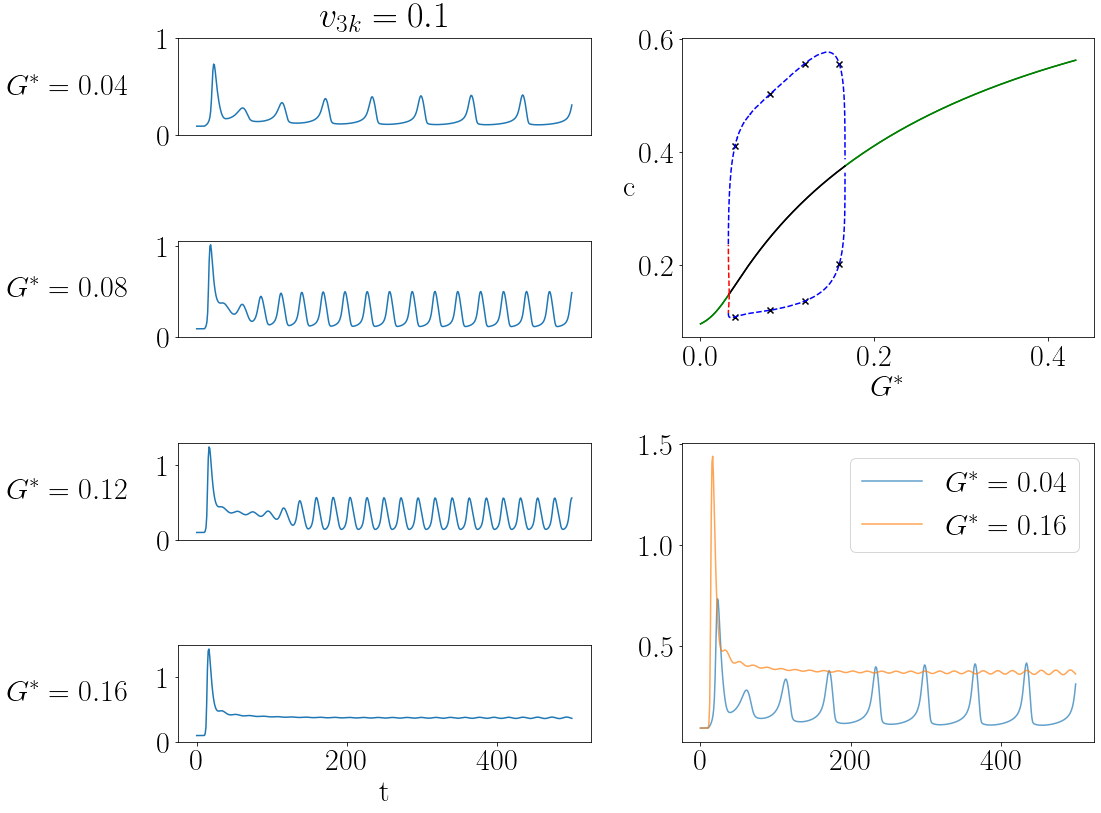

In [17]:
# fig, ax = plt.subplots(4, 1, figsize=(12, 10))
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
gs = fig.add_gridspec(4, 4)
combined_ax = fig.add_subplot(gs[2:, 2:])
axs = []
cfg.input_duration = 1000

ratios = np.linspace(0.05, 0.95, 4)
Gstar_min = Gstar_mins[1]
Gstar_max = Gstar_maxs[1]
Gstar_range = Gstar_max - Gstar_min
Gstars = ratios * Gstar_range + Gstar_min
cfg.v_3k = v3ks[1]

#Run experiments and plot
for i, Gstar in enumerate(Gstars):
    ax = fig.add_subplot(gs[i, :2])
    cfg.input_max = Gstar
    run_Gstar_controlled_experiment('pulse', t_f=500, max_step=1)
    ax.plot(cfg.t, cfg.c)
    if(i == 0 or i == 3):
        combined_ax.plot(cfg.t, cfg.c, label='$G^*={}$'.format(round(Gstar, 3)), alpha=0.7)
    if(i != 3):
        ax.set_xticks([])
    ax.set_ylabel('$G^*={}$'.format(round(Gstar, 3)), rotation=0, ha='left', va='center', labelpad=150)
    axs.append(ax)
    ax.set_yticks([0,1])
axs[0].set_title('$v_{3k}=' + str(cfg.v_3k) + '$')
axs[3].set_xlabel('t')

#Add bifurcation plot
ax = fig.add_subplot(gs[:2, 2:])
plot_bifurcation('Gstar_v3k_0.1_kd_0.7.dat', ax)
ax.set_xlabel('$G^*$')
ax.set_ylabel('c', rotation=0, va='center', ha='right')
fig.tight_layout()

#Add G* points to bifurcation
data = load_bifurcation_data('Gstar_v3k_0.1_kd_0.7.dat')
stable = data[data[3] == 3]
xs = []
ys = []
for Gstar in Gstars:
    idx = np.argmax(stable[0] > Gstar)
    row = stable.iloc[idx]
    xs.append(row[0])
    ys.append(row[1])
    xs.append(row[0])
    ys.append(row[2])
ax.scatter(xs, ys, marker='x', color='k')

combined_ax.legend()
plt.savefig(save + '3.3.2_delays_v3k_0.1.png', bbox_inches='tight')

### v_3k = 0.5

C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


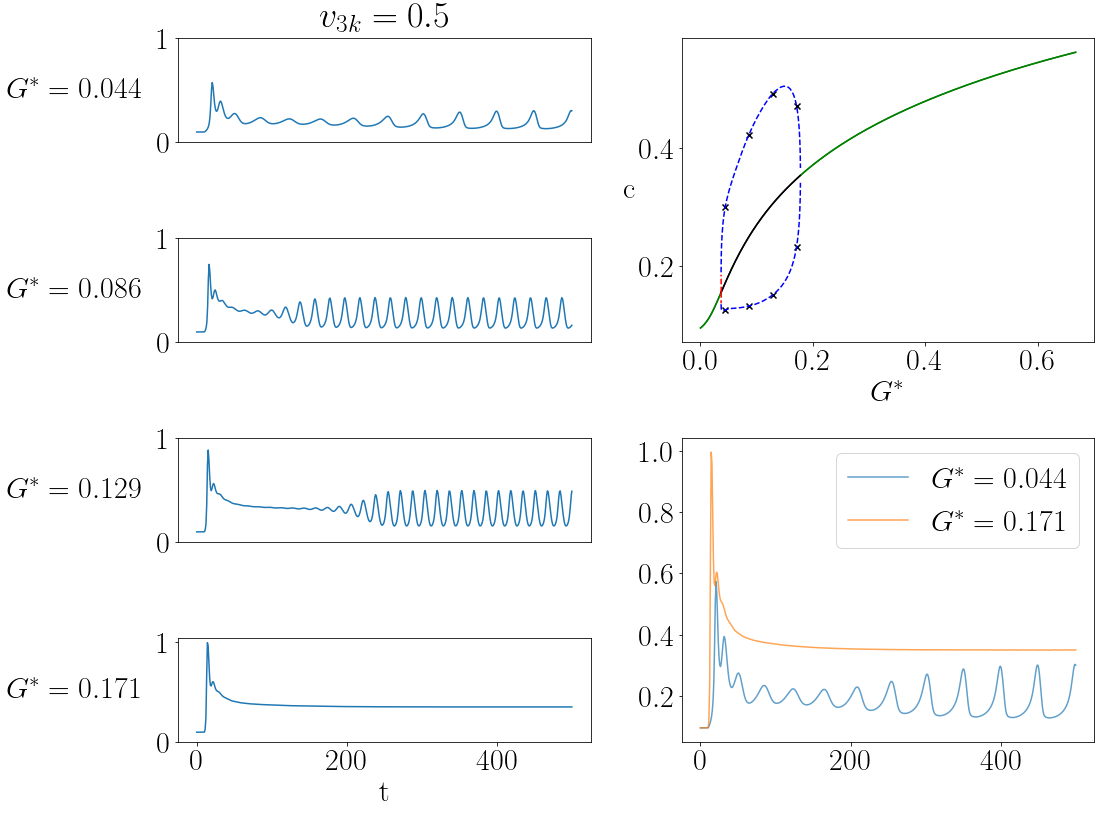

In [18]:
# fig, ax = plt.subplots(4, 1, figsize=(12, 10))
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
gs = fig.add_gridspec(4, 4)
combined_ax = fig.add_subplot(gs[2:, 2:])
axs = []
cfg.input_duration = 1000

ratios = np.linspace(0.05, 0.95, 4)
Gstar_min = Gstar_mins[2]
Gstar_max = Gstar_maxs[2]
Gstar_range = Gstar_max - Gstar_min
Gstars = ratios * Gstar_range + Gstar_min
cfg.v_3k = v3ks[2]

#Run experiments and plot
for i, Gstar in enumerate(Gstars):
    ax = fig.add_subplot(gs[i, :2])
    cfg.input_max = Gstar
    run_Gstar_controlled_experiment('pulse', t_f=500, max_step=1)
    ax.plot(cfg.t, cfg.c)
    if(i == 0 or i == 3):
        combined_ax.plot(cfg.t, cfg.c, label='$G^*={}$'.format(round(Gstar, 3)), alpha=0.7)
    if(i != 3):
        ax.set_xticks([])
    ax.set_ylabel('$G^*={}$'.format(round(Gstar, 3)), rotation=0, ha='left', va='center', labelpad=150)
    axs.append(ax)
    ax.set_yticks([0,1])
axs[0].set_title('$v_{3k}=' + str(cfg.v_3k) + '$')
axs[3].set_xlabel('t')

#Add bifurcation plot
ax = fig.add_subplot(gs[:2, 2:])
plot_bifurcation('Gstar_v3k_0.5_kd_0.7.dat', ax)
ax.set_xlabel('$G^*$')
ax.set_ylabel('c', rotation=0, va='center', ha='right')
fig.tight_layout()

#Add G* points to bifurcation
data = load_bifurcation_data('Gstar_v3k_0.5_kd_0.7.dat')
stable = data[data[3] == 3]
xs = []
ys = []
for Gstar in Gstars:
    idx = np.argmax(stable[0] > Gstar)
    row = stable.iloc[idx]
    xs.append(row[0])
    ys.append(row[1])
    xs.append(row[0])
    ys.append(row[2])
ax.scatter(xs, ys, marker='x', color='k')

combined_ax.legend()
plt.savefig(save + '3.3.3_delays_v3k_0.5.png', bbox_inches='tight')

## Delay rescue via initial condition

### Initial Condition Modifiers

Algorithmically testing to see what initial conditions matter to the delays. The way to read these plots is that the x-axis shows a factor the initial condition was multiplied by and the y-axis shows how much delay was calculated by the algorithm. Then the "default" amount of delay occurs when x=1. As we can see, delays can be reduced by decreasing c_t, or increasing h.

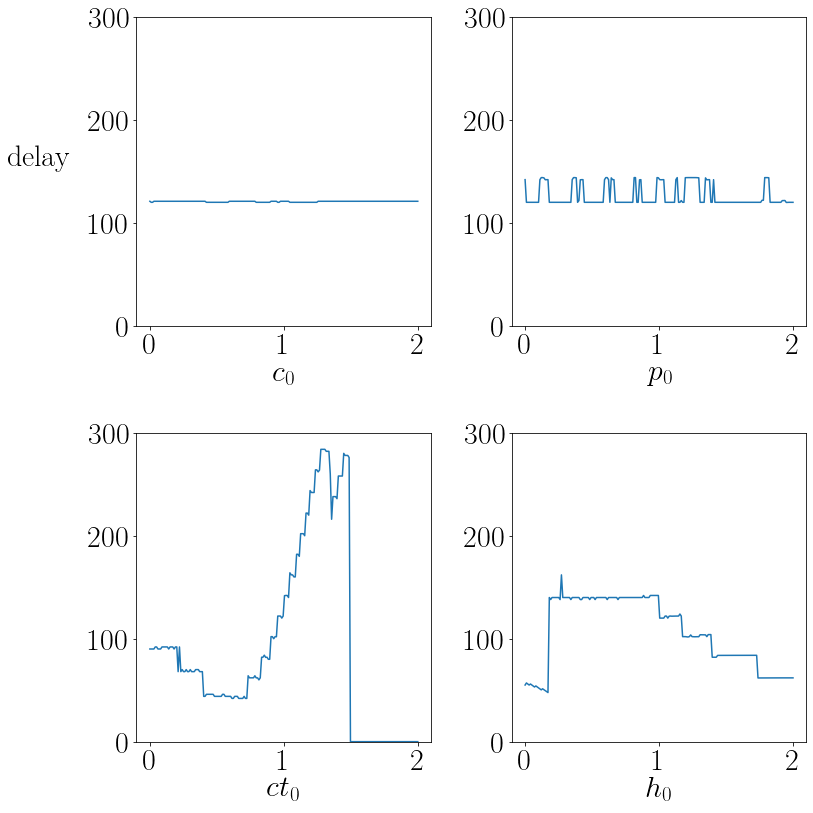

In [44]:
data_dict = pickle.load(open('data/plot_data/3.4_rescue', 'rb'))

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
var = ['c', 'ct', 'p', 'h']
for i, v in enumerate(var):
    idx = (i % 2, int(np.floor(i/2)))
    axs[idx].plot(data_dict['modifiers'], data_dict[v])
    axs[idx].set_ylim([0, 300])
    axs[idx].set_xlabel('$' + v + '_0$')

axs[0, 0].set_ylabel('delay', rotation=0, labelpad=50)
fig.tight_layout()
plt.savefig(save+'3.4.1_initial_condition_modifiers.png', bbox_inches='tight')

### Simulation with decreased c_t_0

The condition that matters the most (and is most realistic to adjust thankfully) is c_total. We can rescue a large portion of the delays simply be decreasing the initial condition slightly

In [65]:
all_init

[0.0951442, 34.841184, 0.673079, 0.056767761, 0, 0, 0, 0]

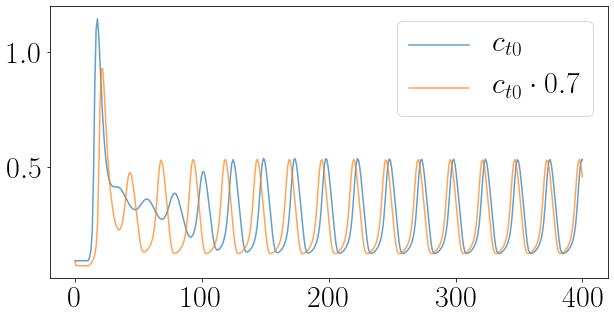

In [42]:
plt.figure(figsize=(10, 5))
cfg.input_duration = 1000
cfg.input_max = 0.1
cfg.v_3k = 0.1
all_init = cfg.all_init
cfg.all_init = all_init.copy()

sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
plt.plot(cfg.t, cfg.c, label='${c_t}_0$', alpha=0.7)

cfg.all_init[1] = all_init[1] * 0.7
sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=1)
plt.plot(cfg.t, cfg.c, label='${c_t}_0 \cdot 0.7$', alpha=0.7)

plt.legend()

cfg.all_init = all_init.copy()
plt.savefig(save + '3.4.2_decrease_ct0.png', bbox_inches='tight')

## Delay rescue via noise

Here we are using noisy inputs prior to the actual experiment to attempt delay recovery

### Poisson train example

Experiment loaded


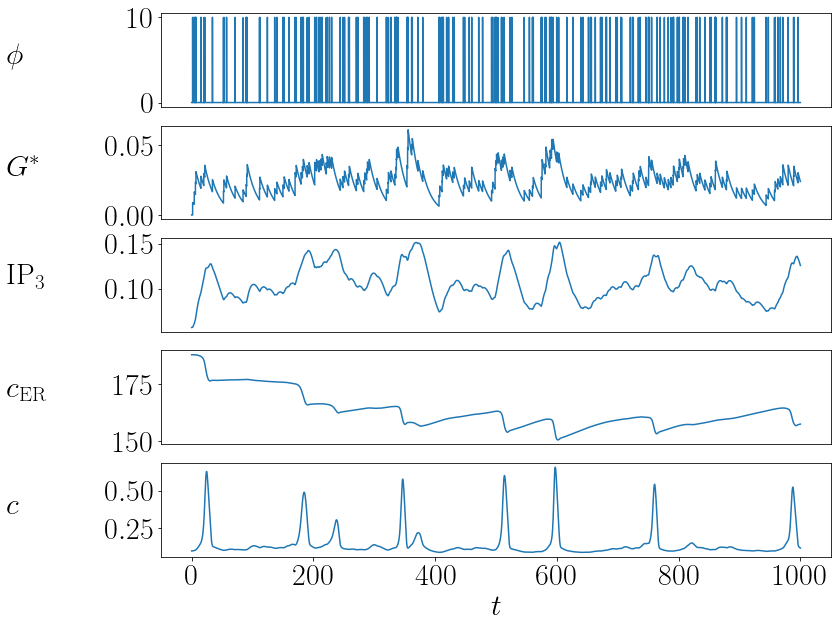

In [54]:
load_experiment('poisson/rate_0.2_conc_10_2')
fig, ax = plt.subplots(5, 1, figsize=(12, 10))
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax)
plt.savefig(save+'3.5.1_poisson_train_example.png', bbox_inches='tight')

In [7]:
font = {'size' : 20,
       'family': 'sans-serif',
       'sans-serif': ['Arial'],
       'serif': ['Arial']}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['mathtext.fontset'] = 'sans-serif'
matplotlib.rcParams['mathtext.sf'] = 'Arial'
# rc('text.latex', preamble=r'\usepackage{cmbright}')

Experiment loaded


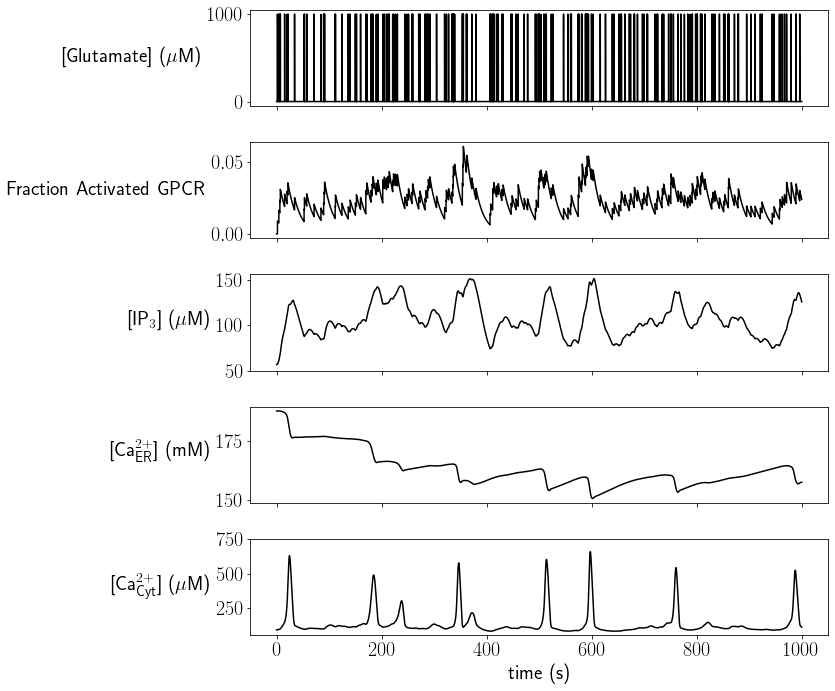

In [9]:
load_experiment('poisson/rate_0.2_conc_10_2')
fig, ax = plt.subplots(5, 1, figsize=(12, 10), sharex='all')
# plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax)
# plt.savefig(save+'3.5.1_poisson_train_example.png', bbox_inches='tight')

ax[0].plot(cfg.t_input, cfg.glut*100, c='k')
ax[1].plot(cfg.t, cfg.Gstar, c='k')
ax[2].plot(cfg.t, cfg.p * 1000, c='k')
ax[3].plot(cfg.t, cfg.c_er, c='k')
ax[4].plot(cfg.t, cfg.c*1000, c='k')


ax[0].set_ylabel('[Glutamate] ($\mu$M)', rotation=0, ha='right', va='center')
ax[1].set_ylabel('Fraction Activated GPCR', rotation=0, ha='right', va='center')
ax[2].set_ylabel('[IP$_3$] ($\mu$M)', rotation=0, ha='right', va='center')
ax[3].set_ylabel('[Ca$^{2+}_\mathsf{ER}$] (mM)', rotation=0, ha='right', va='center')
ax[4].set_ylabel('[Ca$^{2+}_\mathsf{Cyt}$] ($\mu$M)', rotation=0, ha='right', va='center')

ax[2].set_yticks([50, 100, 150])
ax[4].set_yticks([250, 500, 750])

ax[4].set_xlabel('time (s)')
plt.tight_layout()

plt.savefig(save+'3.5.1_poisson_train_dark.png', bbox_inches='tight')

### Gstar Poisson train

Experiment loaded


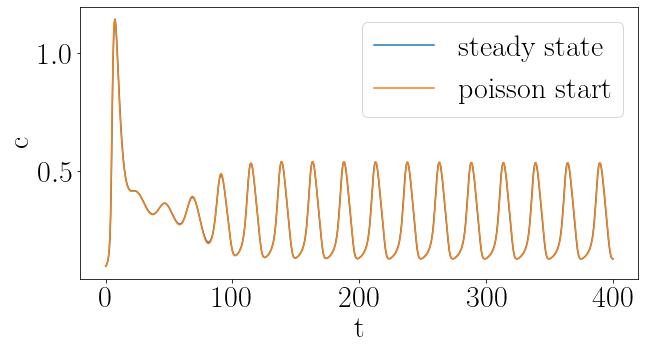

In [3]:
all_init = cfg.all_init.copy()
plt.figure(figsize=(10, 5))
cfg.input_duration = 1000
cfg.input_max = 0.1
cfg.input_start = 0
sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=0.5)
plt.plot(cfg.t, cfg.c, label='steady state')


load_experiment('poisson/Gstar_rate_0.1_conc_0.3')
cfg.all_init = [cfg.c[-1], cfg.c_tot[-1], cfg.h[-1], cfg.p[-1], cfg.Gstar[-1], cfg.Gd1[-1], cfg.Gd2[-1], cfg.lamb[-1]]
sol = run_Gstar_controlled_experiment('pulse', t_f=400, max_step=0.5)
plt.plot(cfg.t, cfg.c, label='poisson start')


cfg.all_init = all_init
plt.xlabel('t')
plt.ylabel('c')
plt.legend()

Experiment loaded


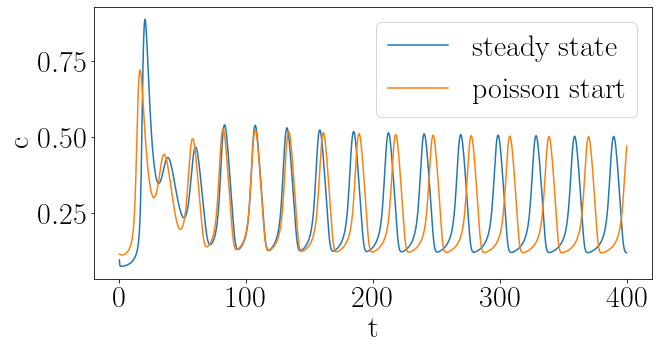

In [33]:
all_init = cfg.all_init.copy()
plt.figure(figsize=(10, 5))
cfg.input_duration = 1000
cfg.input_max = 0.3
cfg.input_start = 0
sol = run_experiment('pulse', t_f=400, max_step=0.5)
plt.plot(cfg.t, cfg.c, label='steady state')


load_experiment('poisson/rate_0.2_conc_10_2')
cfg.all_init = [cfg.c[-1], cfg.c_tot[-1], cfg.h[-1], cfg.p[-1], cfg.Gstar[-1], cfg.Gd1[-1], cfg.Gd2[-1], cfg.lamb[-1]]
sol = run_experiment('pulse', t_f=400, max_step=0.5)
plt.plot(cfg.t, cfg.c, label='poisson start')


cfg.all_init = all_init
plt.xlabel('t')
plt.ylabel('c')
plt.legend()
plt.savefig(save + '3.5.2_poisson_start_full_model.png', bbox_inches='tight')

## G* Stepping

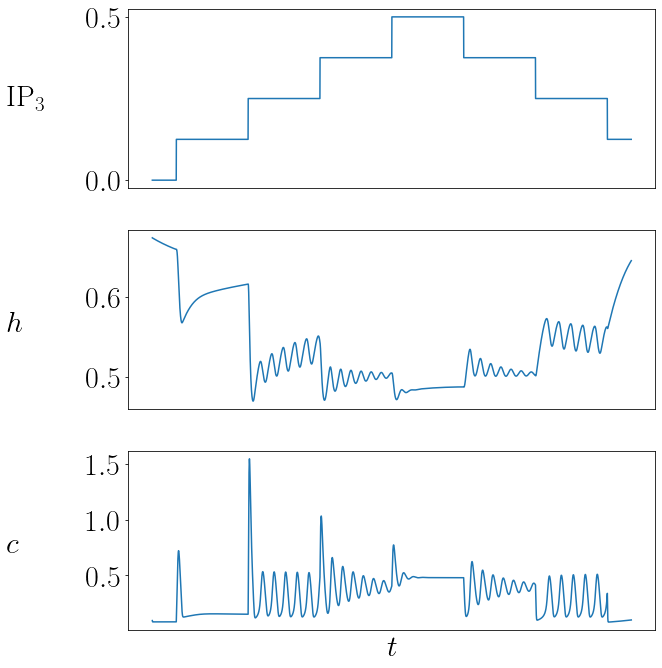

In [60]:
cfg.step_max_value = 0.5
sol = run_ip3_controlled_experiment('step')

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
plot_experiment_plots(['p', 'h', 'c'], ax)

fig.tight_layout()
plt.savefig(save + '3.6_Gstar_step.png', bbox_inches='tight')

## Frequency/amplitude coding

In [124]:
data = load_bifurcation_data('Gstar_v3k_0.1_kd_0.7.dat')
d = data[data[3] == 3]
Gstar_min = np.min(d[0])
Gstar_max = np.max(d[0])
c_tot_default = cfg.all_init[1]
cfg.all_init[1] = c_tot_default * 0.7

Gstars = np.linspace(Gstar_min, Gstar_max)
cfg.input_start = 0
cfg.input_duration = 5000

save_dict = {
    'Gstars': [],
    'isi': [],
    'frequencies': [],
    'rel_amps': [],
    'abs_amps': []
}

for Gstar in tqdm(Gstars):
# for Gstar in Gstars[:-3]:
# for Gstar in [Gstars[0]]:
    cfg.input_max = Gstar
    sol = run_Gstar_controlled_experiment('pulse', t_f=2000, max_step=0.2)
    
    #Compute based on the last 5 peaks (not including final peak in case we have some end time effects)
    peaks = scipy.signal.find_peaks(cfg.c)[0]
    peaks = peaks[-6:-1]
    troughs = scipy.signal.find_peaks(-cfg.c)[0]
    troughs = troughs[-6:-1]
    
    peak_ts = cfg.t[peaks]
    mean_isi = np.mean(np.diff(peak_ts))
    
    save_dict['Gstars'].append(Gstar)
    save_dict['isi'].append(mean_isi)
    save_dict['frequencies'].append(1/mean_isi)
    save_dict['rel_amps'].append(relative_amp),
    save_dict['abs_amps'].append(absolute_amp)
    
pickle.dump(save_dict, open('data/plot_data/3.7_frequency_amp_coding', 'wb'))
    

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:28<00:00,  5.37s/it]


In [47]:
save_dict = {
    
}
c_tot_default = cfg.all_init[1]
cfg.all_init[1] = c_tot_default * 0.7

cfg.input_start = 0
cfg.input_duration = 5000


for v3k in [0.1, 0.08, 0.06, 0.04, 0.02, 0]:
    cfg.v_3k = v3k
    save_dict['v3k_' + str(v3k) + '_isi'] = []
    save_dict['v3k_' + str(v3k) + '_freq'] = []
    save_dict['v3k_' + str(v3k) + '_Gstar'] = []
    save_dict['v3k_' + str(v3k) + '_abs_amp'] = []
    save_dict['v3k_' + str(v3k) + '_rel_amp'] = []

    data = load_bifurcation_data('Gstar_v3k_' + str(v3k) + '.dat')
    d = data[data[3] == 3]
    Gstar_min = np.min(d[0])
    Gstar_max = np.max(d[0])

    Gstars = np.linspace(Gstar_min, Gstar_max)

    for Gstar in tqdm(Gstars):
        #for each experiment continue until 5 peaks within 95% of max of bifurcation hi is seen
        cfg.input_max = Gstar

        sol = run_Gstar_controlled_experiment('pulse', t_f=1000, max_step=3)
        complete = False

        idx = np.argmax(d[0] > Gstar)
        if Gstar > np.max(d[0]):
            idx = np.argmax(d[0])
        Gstar = d[0].iloc[idx]
    #     c_max = d[1].iloc[idx]
    #     c_min = d[2].iloc[idx]

        while not complete:
            sol = continue_Gstar_controlled_experiment('pulse', t_cont=200, max_step=0.05)
            peaks = scipy.signal.find_peaks(cfg.c)[0]
            if len(peaks) > 6:
                last_peaks = peaks[-6:-1]
                maxs = cfg.c[last_peaks]
                c_max = maxs[-1]
                if np.all(np.abs(maxs - c_max) / c_max < 0.01):
                    complete = True
                    break

        troughs = scipy.signal.find_peaks(-cfg.c)[0]
        last_troughs = troughs[-6:-1]
        mins = cfg.c[last_troughs]
        c_min = mins[-1]

        isi = np.mean(np.diff(cfg.t[last_peaks]))
        save_dict['v3k_' + str(v3k) + '_isi'].append(isi)
        save_dict['v3k_' + str(v3k) + '_freq'].append(1/isi)
        save_dict['v3k_' + str(v3k) + '_Gstar'].append(Gstar)
        save_dict['v3k_' + str(v3k) + '_abs_amp'].append(c_max)
        save_dict['v3k_' + str(v3k) + '_rel_amp'].append(c_max - c_min)

    
    


cfg.all_init[1] = c_tot_default
pickle.dump(save_dict, open('data/plot_data/3.7_v3k_freq_amp', 'wb'))

  2%|█▋                                                                                 | 1/50 [00:05<04:48,  5.89s/it]C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:44<00:00,  2.09s/it]


In [48]:
save_dict = {
    
}
c_tot_default = cfg.all_init[1]
cfg.all_init[1] = c_tot_default * 0.7
cfg.v_3k = 0.1
cfg.input_start = 0
cfg.input_duration = 5000


for vdelta in [0.01, 0.008, 0.006, 0.004, 0.002, 0]:
    cfg.v_delta = vdelta
    save_dict['vdelta_' + str(vdelta) + '_isi'] = []
    save_dict['vdelta_' + str(vdelta) + '_freq'] = []
    save_dict['vdelta_' + str(vdelta) + '_Gstar'] = []
    save_dict['vdelta_' + str(vdelta) + '_abs_amp'] = []
    save_dict['vdelta_' + str(vdelta) + '_rel_amp'] = []

    data = load_bifurcation_data('Gstar_vdelta_' + str(vdelta) + '.dat')
    d = data[data[3] == 3]
    Gstar_min = np.min(d[0])
    Gstar_max = np.max(d[0])

    Gstars = np.linspace(Gstar_min, Gstar_max)

    for Gstar in tqdm(Gstars):
        #for each experiment continue until 5 peaks within 95% of max of bifurcation hi is seen
        cfg.input_max = Gstar

        sol = run_Gstar_controlled_experiment('pulse', t_f=1000, max_step=3)
        complete = False

        idx = np.argmax(d[0] > Gstar)
        if Gstar > np.max(d[0]):
            idx = np.argmax(d[0])
        Gstar = d[0].iloc[idx]
    #     c_max = d[1].iloc[idx]
    #     c_min = d[2].iloc[idx]

        while not complete:
            sol = continue_Gstar_controlled_experiment('pulse', t_cont=200, max_step=0.05)
            peaks = scipy.signal.find_peaks(cfg.c)[0]
            if len(peaks) > 6:
                last_peaks = peaks[-6:-1]
                maxs = cfg.c[last_peaks]
                c_max = maxs[-1]
                if np.all(np.abs(maxs - c_max) / c_max < 0.01):
                    complete = True
                    break

        troughs = scipy.signal.find_peaks(-cfg.c)[0]
        last_troughs = troughs[-6:-1]
        mins = cfg.c[last_troughs]
        c_min = mins[-1]

        isi = np.mean(np.diff(cfg.t[last_peaks]))
        save_dict['vdelta_' + str(vdelta) + '_isi'].append(isi)
        save_dict['vdelta_' + str(vdelta) + '_freq'].append(1/isi)
        save_dict['vdelta_' + str(vdelta) + '_Gstar'].append(Gstar)
        save_dict['vdelta_' + str(vdelta) + '_abs_amp'].append(c_max)
        save_dict['vdelta_' + str(vdelta) + '_rel_amp'].append(c_max - c_min)

    
    


cfg.all_init[1] = c_tot_default
pickle.dump(save_dict, open('data/plot_data/3.7_vdelta_freq_amp', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:23<00:00,  1.67s/it]


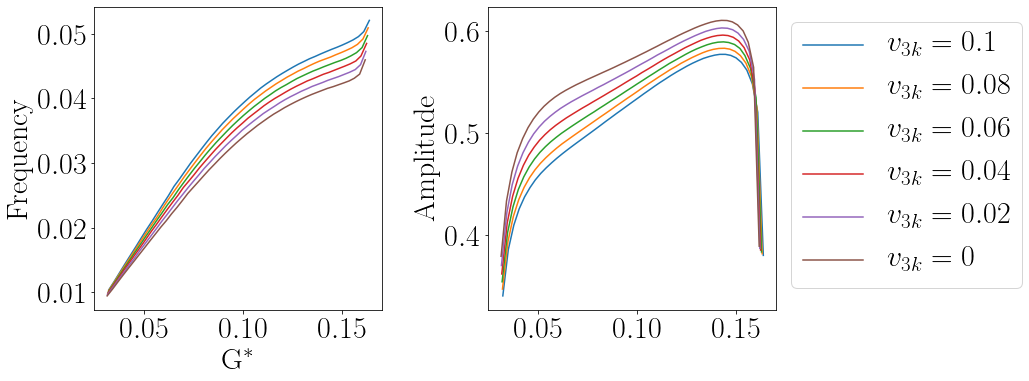

In [4]:
data = pickle.load(open('data/plot_data/3.7_v3k_freq_amp', 'rb'))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for v3k in [0.1, 0.08, 0.06, 0.04, 0.02, 0]:
    ax[0].plot(data['v3k_' + str(v3k) + '_Gstar'][:-1], data['v3k_' + str(v3k) + '_freq'][:-1])
    ax[1].plot(data['v3k_' + str(v3k) + '_Gstar'][:-1], data['v3k_' + str(v3k) + '_abs_amp'][:-1], label='$v_{3k}=' + str(v3k) + '$')

ax[1].legend(bbox_to_anchor=(1,1,0,0))
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Amplitude')
ax[0].set_xlabel('G$^*$')
# ax[0].xaxis.set_label_coords(1.4, -0.15)

fig.tight_layout()
fig.savefig(save + '3.7_v3k_freq_amp.png', bbox_inches='tight')

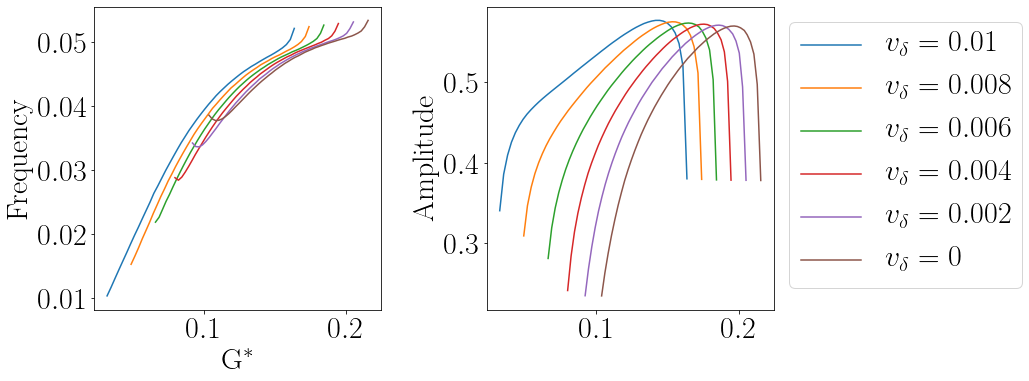

In [3]:
data = pickle.load(open('data/plot_data/3.7_vdelta_freq_amp', 'rb'))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for vdelta in [0.01, 0.008, 0.006, 0.004, 0.002, 0]:
    ax[0].plot(data['vdelta_' + str(vdelta) + '_Gstar'][:-1], data['vdelta_' + str(vdelta) + '_freq'][:-1])
    ax[1].plot(data['vdelta_' + str(vdelta) + '_Gstar'][:-1], data['vdelta_' + str(vdelta) + '_abs_amp'][:-1], label='$v_{\delta}=' + str(vdelta) + '$')

ax[1].legend(bbox_to_anchor=(1,1,0,0))
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Amplitude')
ax[0].set_xlabel('G$^*$')
# ax[0].xaxis.set_label_coords(1.4, -0.15)

fig.tight_layout()
fig.savefig(save + '3.7_vdelta_freq_amp.png', bbox_inches='tight')    

## Relative spike timing of IP3 and Ca2+

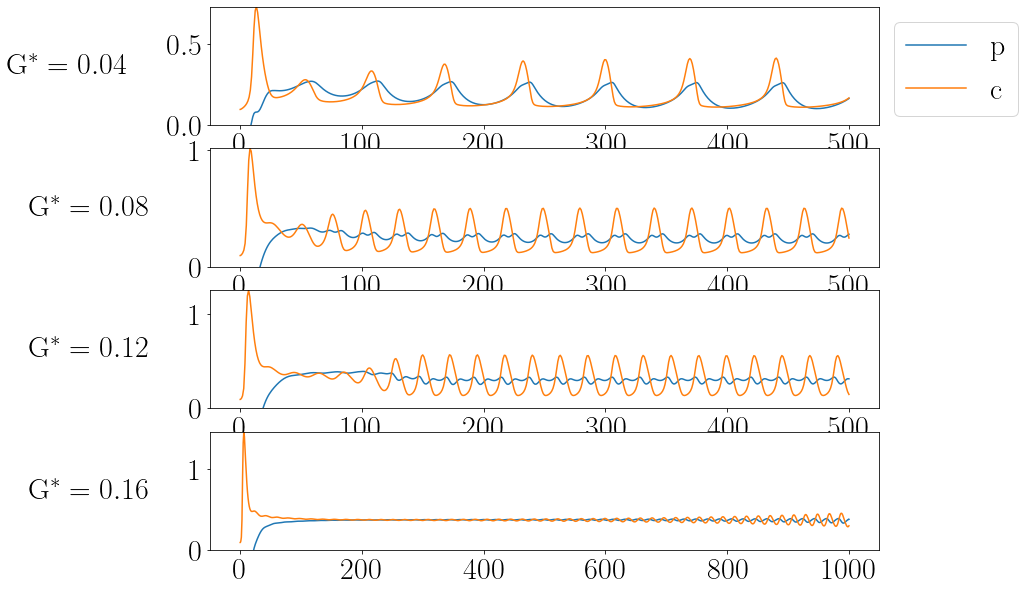

In [21]:
fig, ax = plt.subplots(4, 1, figsize=(12, 10))

cfg.input_duration = 1000
cfg.input_start = 0
data = load_bifurcation_data('Gstar_v3k_0.1.dat')
d = data[data[3] == 3]
Gstar_min = np.min(d[0])
Gstar_max = np.max(d[0])
ratios = np.linspace(0.05, 0.95, 4)
Gstar_range = Gstar_max - Gstar_min
Gstars = ratios * Gstar_range + Gstar_min

for i, Gstar in enumerate(Gstars):
    cfg.input_max = Gstar
    t_f = 500
    if(i == 3):
        t_f = 1000
    sol = run_Gstar_controlled_experiment('pulse', t_f=t_f, max_step=1)
    scaling = np.max(cfg.c / cfg.p)
    shift = np.mean((cfg.p * scaling)[100:] - cfg.c[100:])
    ax[i].plot(cfg.t, cfg.p * scaling - shift, label='p')
    ax[i].plot(cfg.t, cfg.c, label='c')
    ax[i].set_ylim([0, np.max(cfg.c)])
    ax[i].set_ylabel('G$^*=' + str(round(Gstar,2)) + '$', rotation=0, va='center', ha='right', labelpad=40)
    
ax[0].legend(bbox_to_anchor=(1,1,0,0))
plt.savefig(save + '3.8_relative_p_c_spike_timing.png', bbox_inches='tight')

In [15]:
from scipy.optimize import minimize

In [178]:
cs = np.linspace(0, 1, 10)
c_tots = np.linspace(10, 30, 10)
hs = np.linspace(0.2, 0.8, 10)
ps = np.linspace(0, 1, 10)

In [179]:
inits = []
for c in cs:
    for c_tot in c_tots:
        for h in hs:
            for p in ps:
                inits.append(np.array([c, c_tot, h, p, 1.5e-2, 0, 0, 0]))

In [175]:
indices = np.arange(0, len(sol.y.T), 10)
unique_points = []
qs = []
for i in tqdm(indices):
    mined = minimize(min_func, sol.y.T[i])
    q = mined.fun
#     print(q)
    if q > 1e-10:
        continue
    
    already_found = False
    for j, point in enumerate(unique_points):
        if already_found:
            continue
        if np.all(np.isclose(point[:4], mined.x[:4], atol=0.1)):
            already_found = True
            found_index = j
    if not already_found:
        unique_points.append(mined.x)
        qs.append(min_func(mined.x))
    else:
        if min_func(mined.x) < qs[j]:
            qs[j] = min_func(mined.x)
            unique_points[j] = mined.x

100%|██████████████████████████████████████████████████████████████████████████████████| 96/96 [00:05<00:00, 16.07it/s]


In [ ]:
unique_points = []
qs = []
for x_0 in tqdm(inits):
    mined = minimize(min_func, x_0)
    q = mined.fun
#     print(q)
    if q > 1e-10:
        continue
    
    already_found = False
    for j, point in enumerate(unique_points):
        if already_found:
            continue
        if np.all(np.isclose(point[:4], mined.x[:4], atol=0.1)):
            already_found = True
            found_index = j
    if not already_found:
        unique_points.append(mined.x)
        qs.append(min_func(mined.x))
    else:
        if min_func(mined.x) < qs[j]:
            qs[j] = min_func(mined.x)
            unique_points[j] = mined.x

  0%|▏                                                                              | 18/10000 [00:04<35:51,  4.64it/s]C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
  1%|▍                                                                              | 59/10000 [00:14<33:00,  5.02it/s]C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
  1%|▋                                                                              | 91/10000 [00:25<32:01,  5.16it/s]C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)
C:\User

In [182]:
len(unique_points)

6562

In [186]:
np.array(qs)[np.array(qs) > 0]

C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([1.8594035e-14, 8.2757402e-15, 3.8120702e-12])

In [106]:
def min_func(x, Gstar=0.15):
    x[4] = Gstar
    x_dot = all_ode_equations(0, x)
    q = np.sum(x_dot[:4]**2)
    return q

C:\Users\Andy\Desktop\Work\Utah\Projects\Epilepsy Astrocytes\ip3_ca_ode_cfg.py:233: RuntimeWarning: invalid value encountered in double_scalars
  J_serca = cfg.v_serca * (c**1.75) / (c**1.75 + cfg.k_serca**1.75)


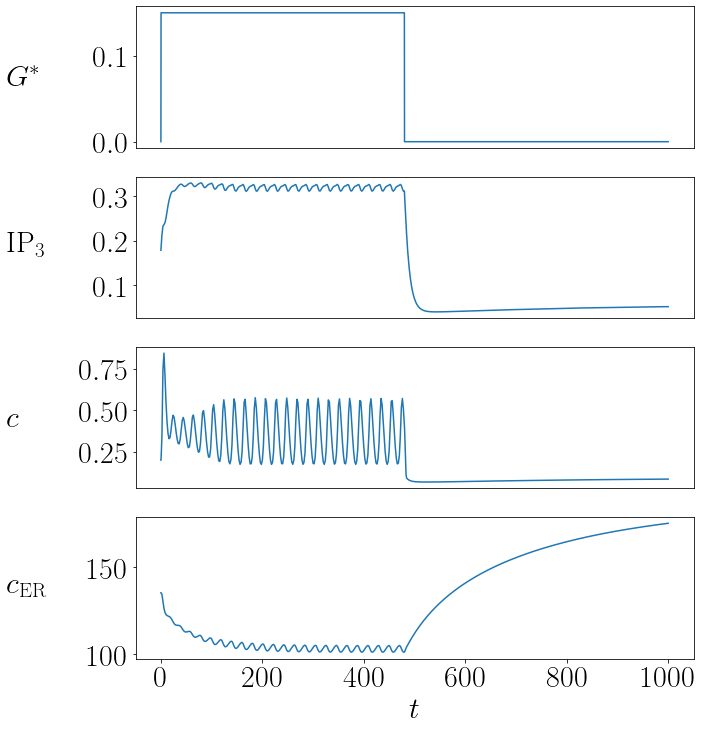

In [57]:
sol = run_Gstar_controlled_experiment('pulse', max_step=2)
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
plot_experiment_plots(['Gstar', 'p', 'c', 'c_er'], ax)

# Full Model

## Frequency Amplitude Coding

## 2 Parameter Bifurcations

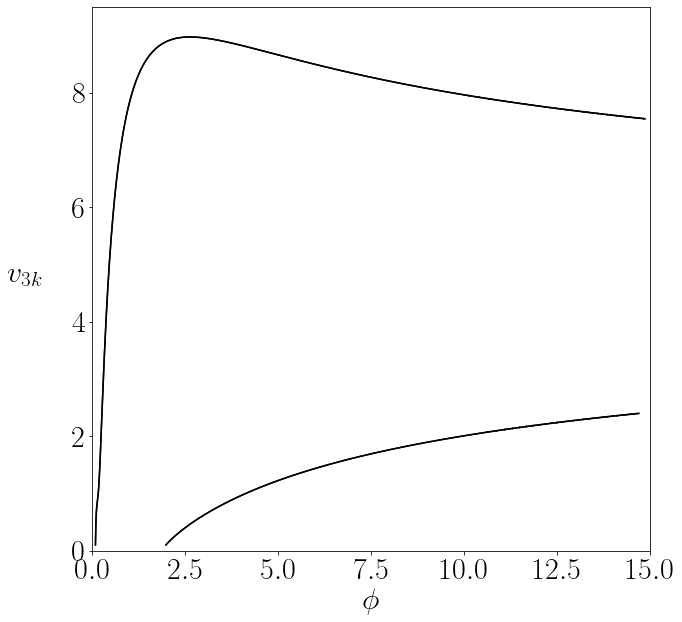

In [6]:
plt.figure(figsize=(10,10))
plot_bifurcation('2_param_glut_v3k.dat')
plt.xlabel('$\phi$')
plt.ylabel('$v_{3k}$', rotation=0, ha='right', va='center', labelpad=30)

plt.xlim([0, 15])
plt.ylim([0, 9.5])
plt.savefig(save + '4.2_v3k_2param_bifurcation.png', bbox_inches='tight')


C:\Users\Andy\miniconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


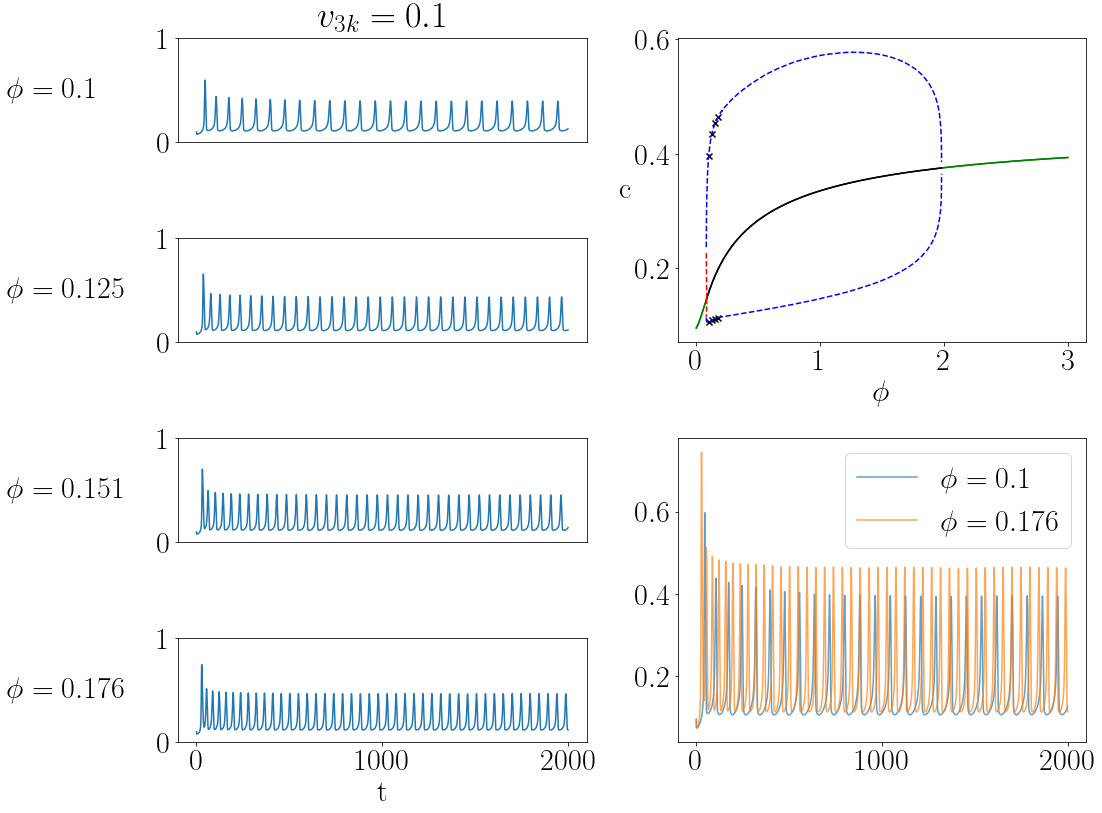

In [34]:
# fig, ax = plt.subplots(4, 1, figsize=(12, 10))
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
gs = fig.add_gridspec(4, 4)
combined_ax = fig.add_subplot(gs[2:, 2:])
axs = []
cfg.input_duration = 2000
data = load_bifurcation_data('c_lambda.dat')
d = data[data[3] == 3]
glut_min = np.min(d[0])
glut_max = np.max(d[0])

ratios = np.linspace(0.01, 0.05, 4)
glut_range = glut_max - glut_min
gluts = ratios * glut_range + glut_min

#Run experiments and plot
for i, glut in enumerate(gluts):
    ax = fig.add_subplot(gs[i, :2])
    cfg.input_max = glut
    run_experiment('pulse', t_f=2000, max_step=1)
    ax.plot(cfg.t, cfg.c)
    if(i == 0 or i == 3):
        combined_ax.plot(cfg.t, cfg.c, label='$\phi={}$'.format(round(glut, 3)), alpha=0.7)
    if(i != 3):
        ax.set_xticks([])
    ax.set_ylabel('$\phi={}$'.format(round(glut, 3)), rotation=0, ha='left', va='center', labelpad=150)
    axs.append(ax)
    ax.set_yticks([0,1])
axs[0].set_title('$v_{3k}=' + str(cfg.v_3k) + '$')
axs[3].set_xlabel('t')

#Add bifurcation plot
ax = fig.add_subplot(gs[:2, 2:])
plot_bifurcation('c_lambda.dat', ax)
ax.set_xlabel('$\phi$')
ax.set_ylabel('c', rotation=0, va='center', ha='right')
fig.tight_layout()

#Add G* points to bifurcation
stable = data[data[3] == 3]
xs = []
ys = []
for glut in gluts:
    idx = np.argmax(stable[0] > glut)
    row = stable.iloc[idx]
    xs.append(row[0])
    ys.append(row[1])
    xs.append(row[0])
    ys.append(row[2])
ax.scatter(xs, ys, marker='x', color='k')

combined_ax.legend()
# plt.savefig(save + '3.3.2_delays_v3k_0.1.png', bbox_inches='tight')

## Calcium signal falloff

There are two types of calcium amplitude falloff that we can see. One can be seen in the amplitude of spikes
![title](figures/Screenshots/c_spike_falloff_ex1.png)

Politi 2006, Fig 8 E. (Maybe somewhat interesting to note that this falloff is actually not seen in their computational model, but we actually can see it in ours.)

and also falloff seen without oscillations:

![title](figures/Screenshots/c_falloff_ex1.png)

Srinivasan et al. 2016, Fig 4 D. (This is seen in visual system in mice)

![title](figures/Screenshots/c_falloff_ex2.png)

Chai et al. 2017, Fig 2 C.

The way we will show that (perhaps surprisingly) the calcium signal falloff is due to GPCR desensitization rather than ER depletion is we will run an experiment with ER storage fixed, and an experiment with GPCR strength fixed

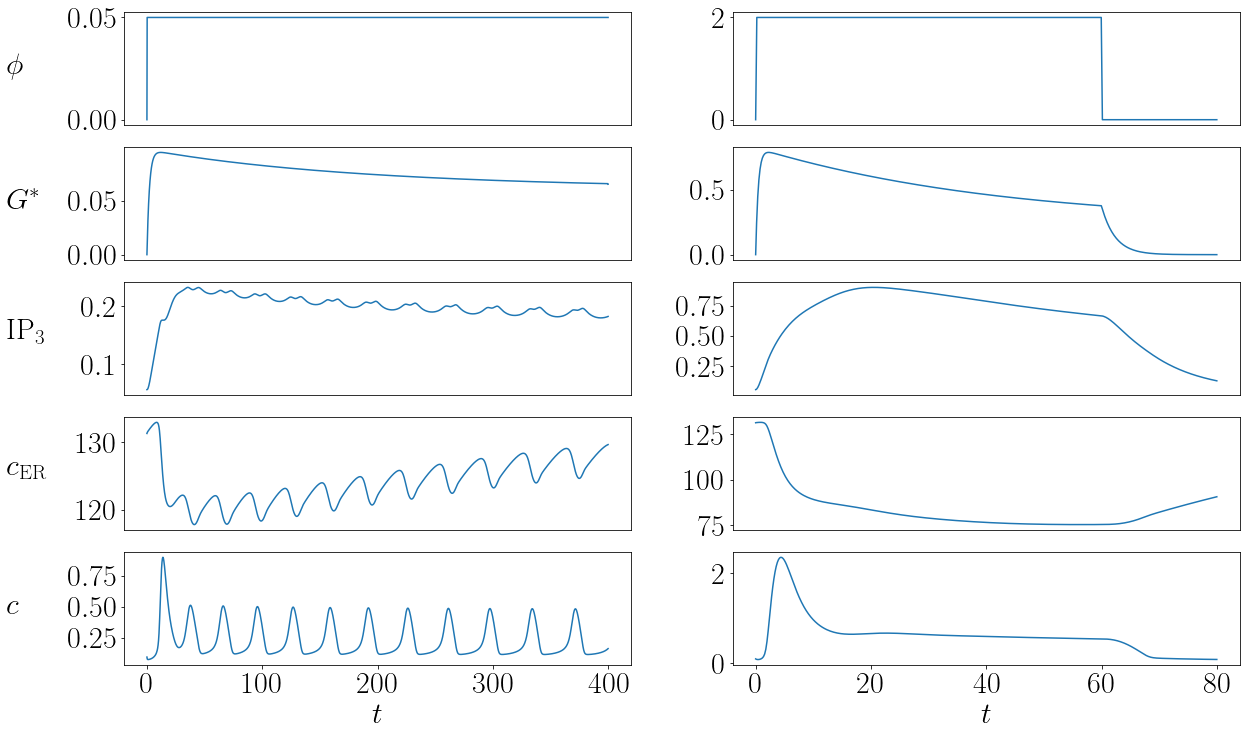

In [41]:
fig, ax = plt.subplots(5, 2, figsize=(20, 12))
c_tot_default = cfg.all_init[1]
cfg.all_init[1] = c_tot_default * 0.7

cfg.input_max = 0.05
cfg.input_duration = 400
sol = run_experiment('pulse', t_f=400, max_step=0.2)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax[:,0])

cfg.input_max = 2
cfg.input_duration = 60
sol = run_experiment('pulse', t_f=80, max_step=0.2)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax[:,1], add_ylabels=False, remove_xticks=True)

cfg.all_init[1] = c_tot_default
plt.savefig( save + '4.3_examples.png', bbox_inches='tight')

### Spike falloff

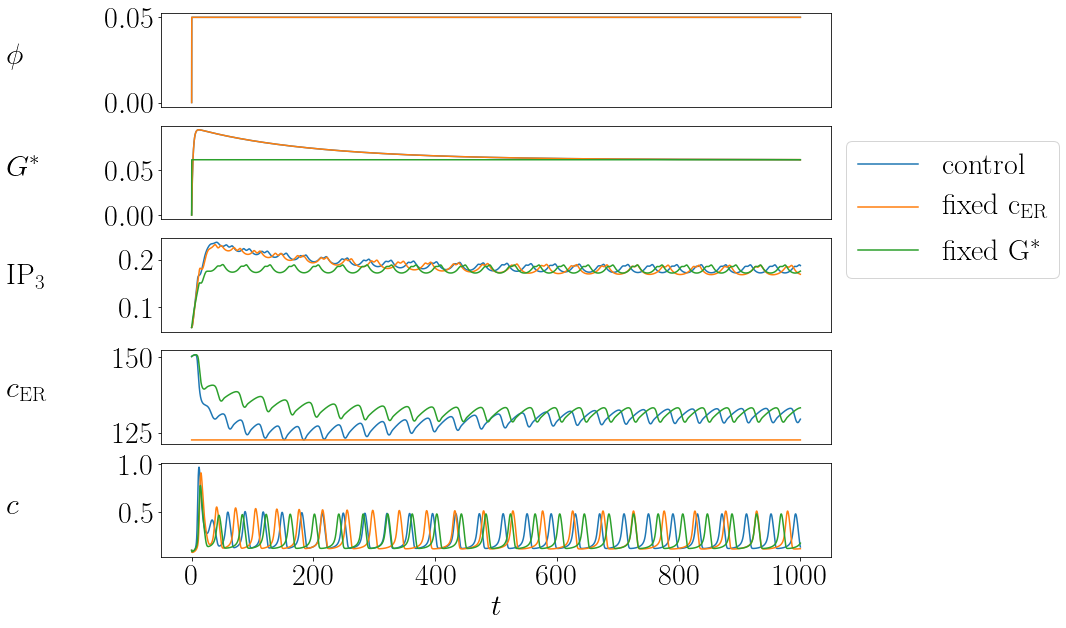

In [48]:
ts = [] #[normal experiment, fixed c_er, fixed_Gstar]
cs = []

cfg.input_start = 0
cfg.input_duration = 1000
cfg.input_max = 0.05
c_tot_default = cfg.all_init[1]
cfg.all_init[1] = c_tot_default * 0.8

fig, ax = plt.subplots(5, 1, figsize=(12, 10))

sol = run_experiment('pulse', t_f=1000, max_step=0.1)
ts.append(cfg.t)
cs.append(cfg.c)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax, legend_label='control')

c_er_min = np.min(cfg.c_er)

sol = run_experiment('pulse', t_f=1000, fix_c_er=c_er_min, max_step=0.1)
ts.append(cfg.t)
cs.append(cfg.c)

cfg.c_er[0] = c_er_min
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax, legend_label='fixed c$_\mathrm{ER}$')

cfg.input_max = cfg.Gstar[-1]
sol = run_Gstar_controlled_experiment('pulse', max_step=0.1)
ts.append(cfg.t)
cs.append(cfg.c)

plot_experiment_plots(['Gstar', 'p', 'c_er', 'c'], ax[1:], legend_label='fixed G$^*$')

ax[1].legend(bbox_to_anchor=(1,1,0,0), loc='upper left')

cfg.all_init[1] = c_tot_default
plt.savefig(save + '4.3.1_simulation.png', bbox_inches='tight')

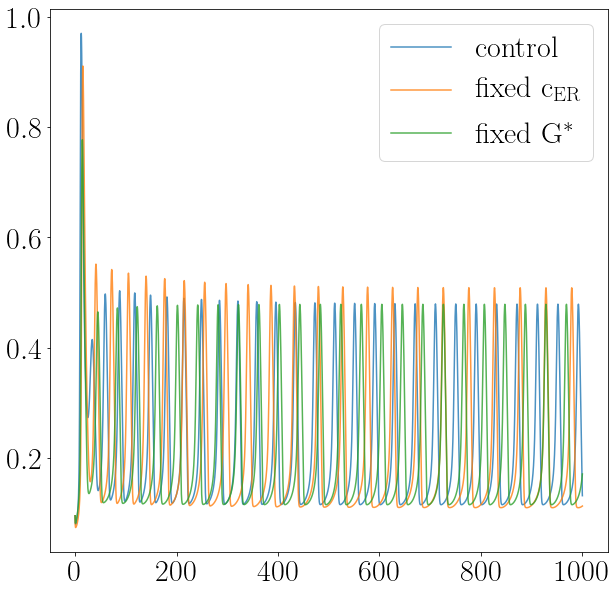

In [49]:
#zoom on c
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
labels = ['control', 'fixed c$_\mathrm{ER}$', 'fixed G$^*$']
for i in range(3):
    t = ts[i]
    c = cs[i]
    ax.plot(t, c, label=labels[i], alpha=0.8)
#     ax[1].plot(t, c, label=labels[i], alpha=0.8)
    
# ax[1].set_xlim([10, 100])
# ax[1].set_ylim([0.1, 0.8])
ax.legend()
plt.savefig(save + '4.3.1_spike_zoom.png', bbox_inches='tight')

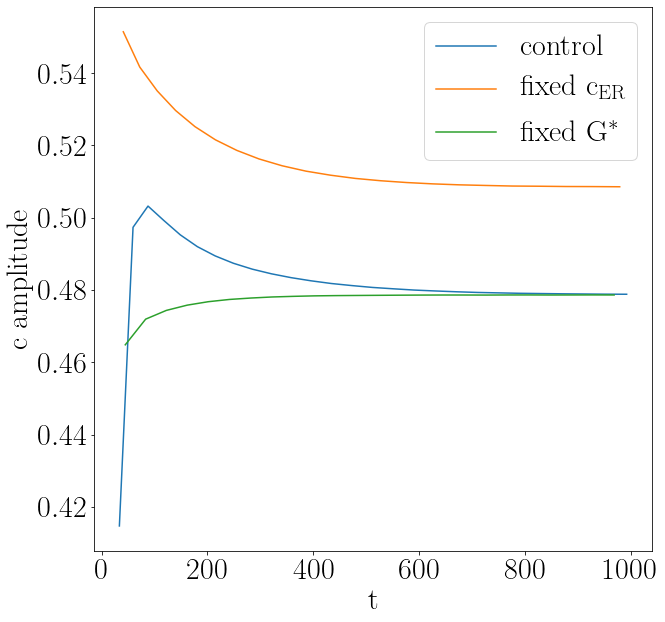

In [50]:
labels = ['control', 'fixed c$_\mathrm{ER}$', 'fixed G$^*$']

plt.figure(figsize=(10, 10))
for i in range(3):
    c = cs[i]
    t = ts[i]
    c_peaks = scipy.signal.find_peaks(c)[0][1:]
    plt.plot(t[c_peaks], c[c_peaks], label=labels[i])

plt.xlabel('t')
plt.ylabel('c amplitude')
plt.legend()
plt.savefig(save + '4.3.1_spike_amplitudes.png', bbox_inches='tight')

### Plateau falloff (without oscillations)

For higher amounts of input, we don't see oscillations, but a sort of plateau response that falls off

In [ ]:
cfg.input_start = 0
gluts = np.arange(0.4, 5, 0.2)
durations = [30, 60, 120, 240, 600]
decays = {
}

def get_decays():
    base_c = cfg.c[0]
    c_peaks = scipy.signal.find_peaks(cfg.c)[0]
    deriv = np.diff(cfg.c)
    deriv_peaks = scipy.signal.find_peaks(deriv[c_peaks[0]:])[0] + c_peaks[0]
    end_first_response = deriv_peaks[0]
    start_stimulus = np.argmax(cfg.t > cfg.input_start)
    end_stimulus = np.argmax(cfg.t > (cfg.input_duration + cfg.input_start))
    end_response = np.argmax(cfg.c[end_stimulus:] < base_c * 1.05) + end_stimulus
    
    c_top = cfg.c[end_first_response]
    c_low = cfg.c[end_stimulus]
    c_decay = c_top - c_low
    c_decay_perc = c_decay / c_top
    
    c_er_avg = np.mean(cfg.c_er[start_stimulus:end_first_response])
    return c_decay, c_decay_perc, c_er_avg

for dur in durations:
    for glut in gluts:
        decays[str(dur) + 'decay'] = []
        decays[str(dur) + 'decayperc'] = []
        decays[str(dur) + 'fixed_cer_decay'] = []
        decays[str(dur) + 'fixed_cer_decayperc'] = []
        decays[str(dur) + 'fixed_Gstar_decay'] = []
        decays[str(dur) + 'fixed_Gstar_decayperc'] = []

for dur in durations:
    for glut in tqdm(gluts):
        cfg.input_max = glut
        cfg.input_duration = dur
        sol = run_experiment('pulse', t_f=dur+100, max_step=0.3)
        c_decay, c_decay_perc, c_er_avg = get_decays()
        decays[str(dur) + 'decay'].append(c_decay)
        decays[str(dur) + 'decayperc'].append(c_decay_perc)
        
        sol = run_experiment('pulse', t_f=dur+100, max_step=0.3, fix_c_er=np.min(cfg.c_er))
        c_decay, c_decay_perc, c_er_avg = get_decays()
        decays[str(dur) + 'fixed_cer_decay'].append(c_decay)
        decays[str(dur) + 'fixed_cer_decayperc'].append(c_decay_perc)
        
        end_response = np.argmax(cfg.t > dur)
        cfg.input_max = np.mean(cfg.Gstar[:end_response])
        sol = run_Gstar_controlled_experiment('pulse', t_f=dur+100, max_step=0.3)
        c_decay, c_decay_perc, c_er_avg = get_decays()
        decays[str(dur) + 'fixed_Gstar_decay'].append(c_decay)
        decays[str(dur) + 'fixed_Gstar_decayperc'].append(c_decay_perc)
        
        
pickle.dump(decays, open('data/plot_data/4.3_decay_amounts', 'wb'))

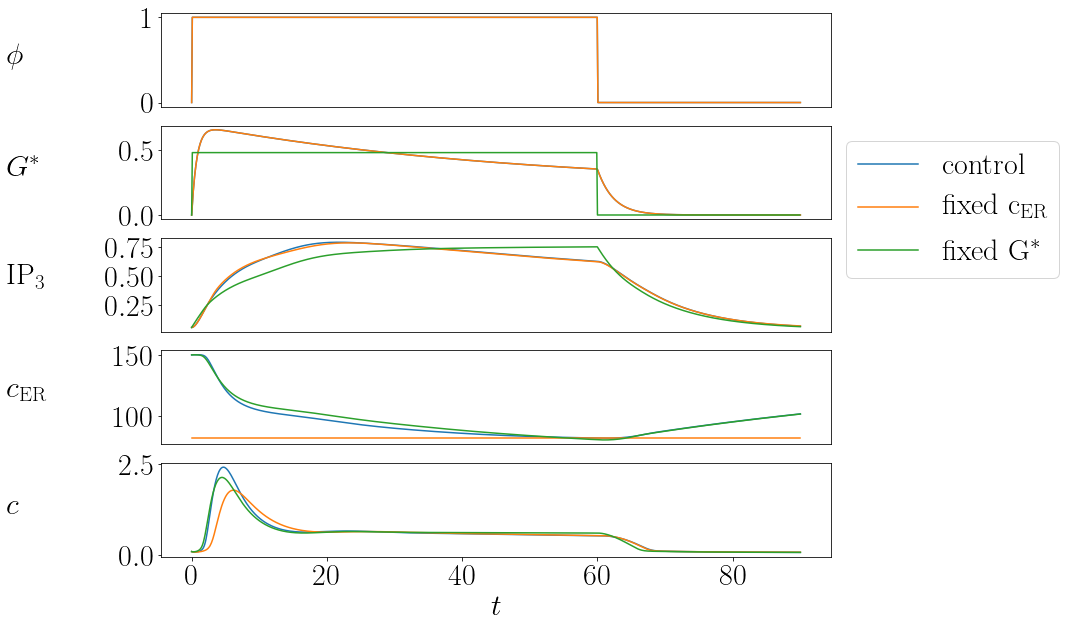

In [52]:
ts = [] #[normal experiment, fixed c_er, fixed_Gstar]
cs = []

cfg.input_start = 0
cfg.input_duration = 60
cfg.input_max = 1
c_tot_default = cfg.all_init[1]
cfg.all_init[1] = c_tot_default * 0.8

fig, ax = plt.subplots(5, 1, figsize=(12, 10))

sol = run_experiment('pulse', t_f=90, max_step=0.1)
ts.append(cfg.t)
cs.append(cfg.c)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax, legend_label='control')

c_er_min = np.min(cfg.c_er)

sol = run_experiment('pulse', t_f=90, fix_c_er=c_er_min, max_step=0.1)
ts.append(cfg.t)
cs.append(cfg.c)

cfg.c_er[0] = c_er_min
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax, legend_label='fixed c$_\mathrm{ER}$')

response_end = np.argmax(cfg.t > cfg.input_duration)
cfg.input_max = np.mean(cfg.Gstar[:response_end])
sol = run_Gstar_controlled_experiment('pulse', t_f=90, max_step=0.1)
ts.append(cfg.t)
cs.append(cfg.c)

plot_experiment_plots(['Gstar', 'p', 'c_er', 'c'], ax[1:], legend_label='fixed G$^*$')

# ax[4].set_ylim([0, 1])
ax[1].legend(bbox_to_anchor=(1,1,0,0), loc='upper left')
cfg.all_init[1] = c_tot_default
plt.savefig(save + '4.3.2_simulation.png', bbox_inches='tight')

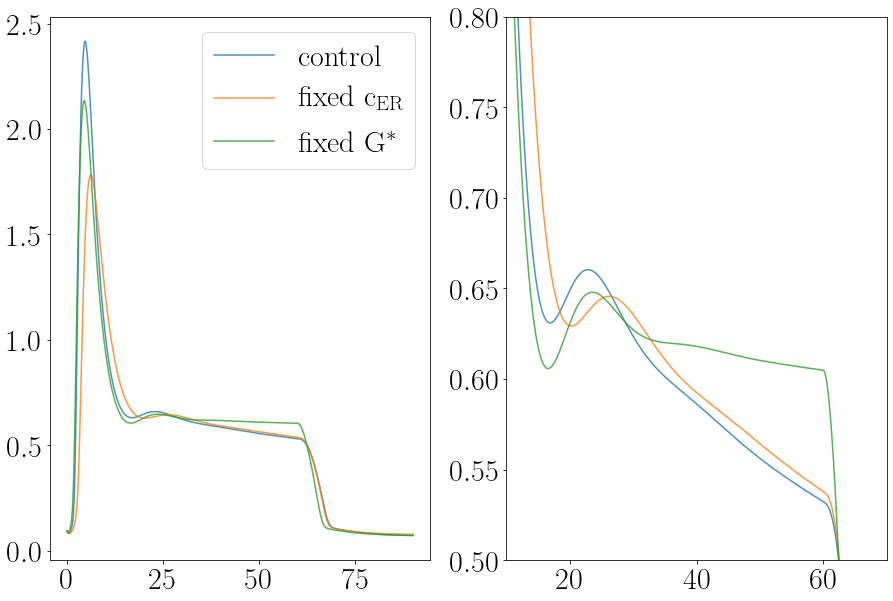

In [53]:
#zoom on c
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
labels = ['control', 'fixed c$_\mathrm{ER}$', 'fixed G$^*$']
for i in range(3):
    t = ts[i]
    c = cs[i]
    ax[0].plot(t, c, label=labels[i], alpha=0.8)
    ax[1].plot(t, c, label=labels[i], alpha=0.8)
    
ax[1].set_xlim([10, 70])
ax[1].set_ylim([0.5, 0.8])
ax[0].legend()

plt.savefig(save + '4.3.2_plateau_zoom.png', bbox_inchex='tight')

Experiment loaded


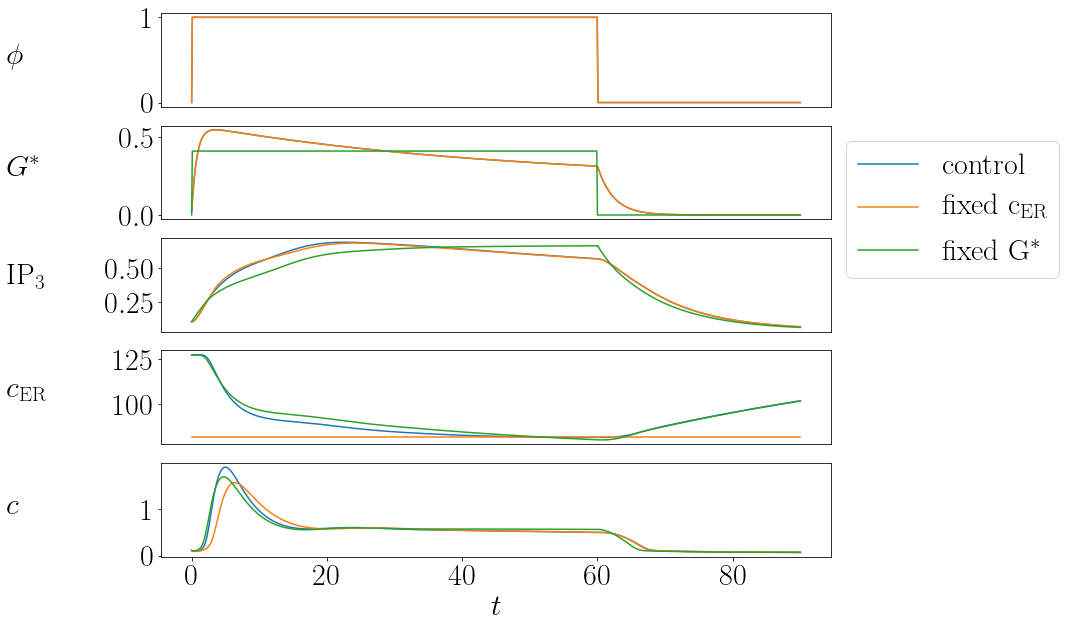

In [4]:
set_init('poisson')
ts = [] #[normal experiment, fixed c_er, fixed_Gstar]
cs = []

cfg.input_start = 0
cfg.input_duration = 60
cfg.input_max = 1
c_tot_default = cfg.all_init[1]
cfg.all_init[1] = c_tot_default * 0.8
    
fig, ax = plt.subplots(5, 1, figsize=(12, 10))

sol = run_experiment('pulse', t_f=90, max_step=0.1)
ts.append(cfg.t)
cs.append(cfg.c)
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax, legend_label='control')

c_er_min = np.min(cfg.c_er)

sol = run_experiment('pulse', t_f=90, fix_c_er=c_er_min, max_step=0.1)
ts.append(cfg.t)
cs.append(cfg.c)

cfg.c_er[0] = c_er_min
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax, legend_label='fixed c$_\mathrm{ER}$')

response_end = np.argmax(cfg.t > cfg.input_duration)
cfg.input_max = np.mean(cfg.Gstar[:response_end])
sol = run_Gstar_controlled_experiment('pulse', t_f=90, max_step=0.1)
ts.append(cfg.t)
cs.append(cfg.c)

plot_experiment_plots(['Gstar', 'p', 'c_er', 'c'], ax[1:], legend_label='fixed G$^*$')

# ax[4].set_ylim([0, 1])
ax[1].legend(bbox_to_anchor=(1,1,0,0), loc='upper left')
cfg.all_init[1] = c_tot_default
plt.savefig(save + '4.3.2_simulation_poisson.png', bbox_inches='tight')

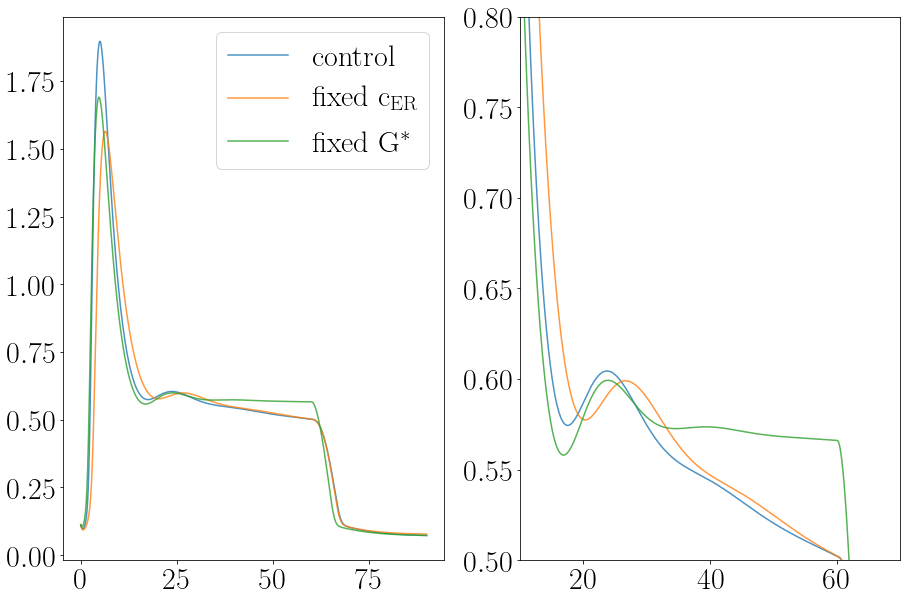

In [5]:
#zoom on c
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
labels = ['control', 'fixed c$_\mathrm{ER}$', 'fixed G$^*$']
for i in range(3):
    t = ts[i]
    c = cs[i]
    ax[0].plot(t, c, label=labels[i], alpha=0.8)
    ax[1].plot(t, c, label=labels[i], alpha=0.8)
    
ax[1].set_xlim([10, 70])
ax[1].set_ylim([0.5, 0.8])
ax[0].legend()

plt.savefig(save + '4.3.2_plateau_zoom_poisson.png', bbox_inchex='tight')

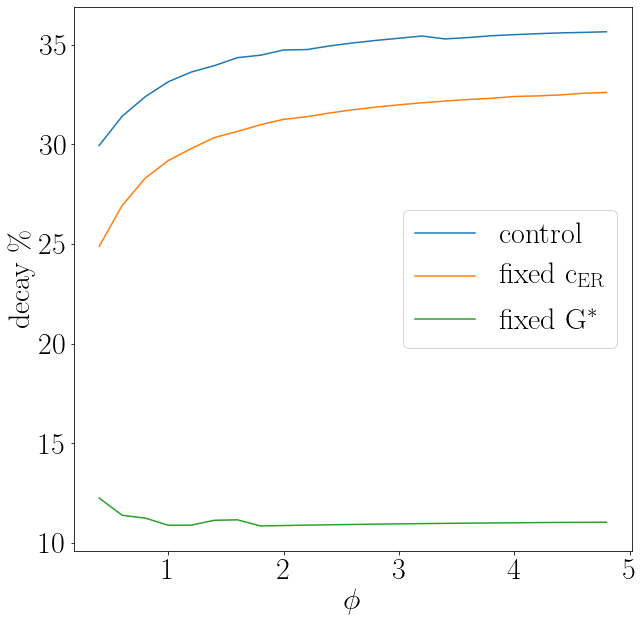

In [60]:
data = pickle.load(open('data/plot_data/4.3_decay_amounts', 'rb'))

plt.figure(figsize=(10,10))
gluts = np.arange(0.4, 5, 0.2)

dur = 120
plt.plot(gluts, np.array(data[str(dur)+'decayperc'])*100, '-', label='control')
plt.plot(gluts, np.array(data[str(dur)+'fixed_cer_decayperc'])*100, '-', label='fixed c$_\mathrm{ER}$')
plt.plot(gluts, np.array(data[str(dur)+'fixed_Gstar_decayperc'])*100, '-', label='fixed G$^*$')

plt.xlabel('$\phi$')
plt.ylabel('decay $\%$')
plt.legend()
plt.savefig(save + '4.3.2_plateau_decays.png', bbox_inches='tight')

In [8]:
cfg.v_delta

0.01

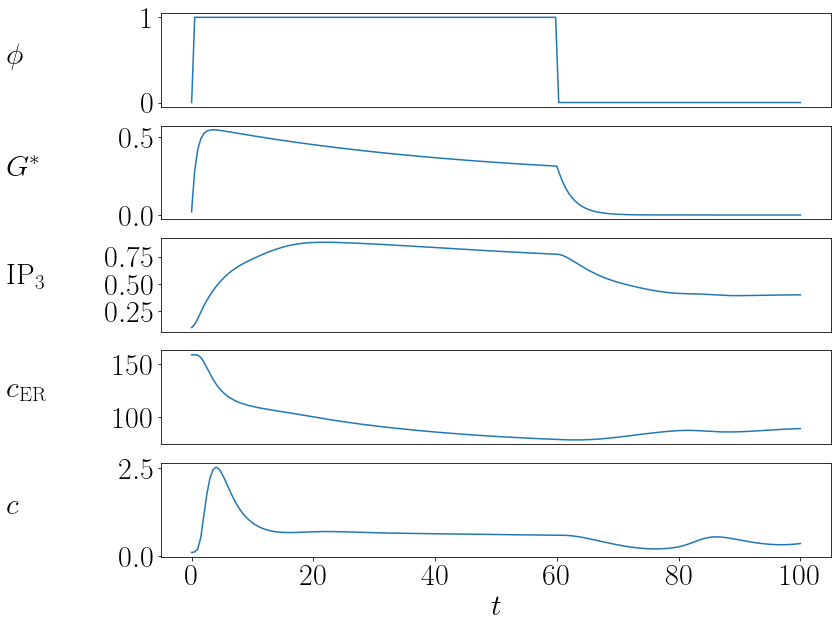

In [10]:
cfg.input_duration = 60
cfg.input_max = 1

cfg.v_delta = 0.05

run_experiment('pulse', t_f=100, max_step=0.5)
fig, ax = plt.subplots(5, 1, figsize=(12, 10))

cfg.v_delta = 0.01

plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax)

In [16]:
set_ip3_curve('PL')

In [20]:
cfg.v_3k

0.1

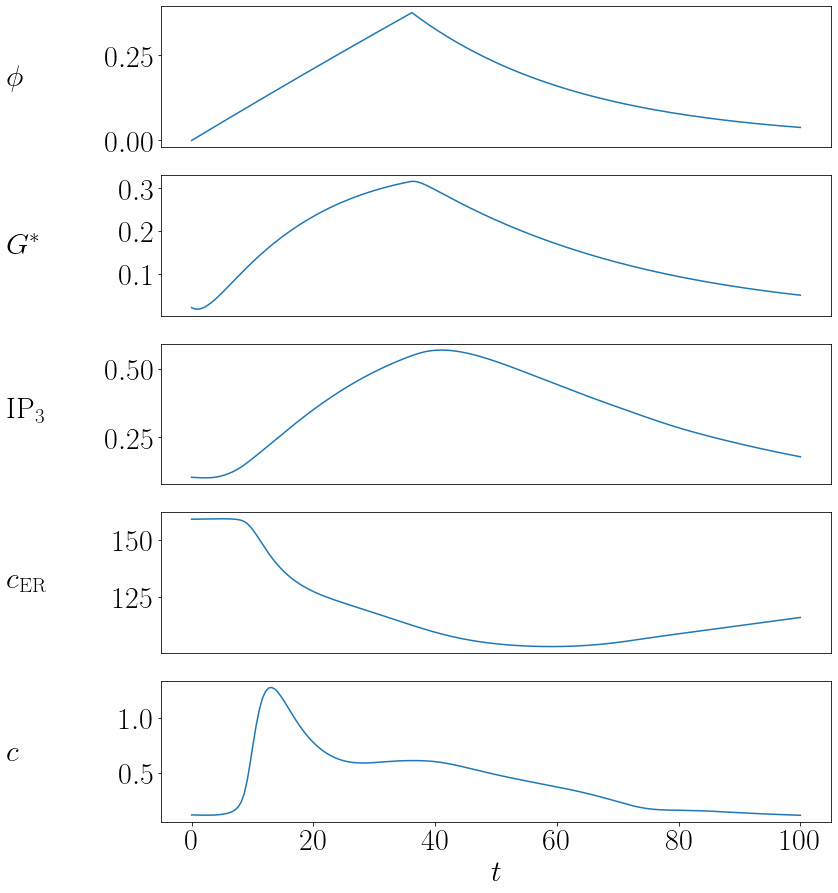

In [22]:
cfg.input_duration = 60
cfg.input_max = 1

# cfg.v_delta = 0.05
cfg.v_3k = 0

run_experiment('curve', t_f=100, max_step=0.5)
fig, ax = plt.subplots(5, 1, figsize=(12, 15))

# cfg.v_delta = 0.01
cfg.v_3k = 0.1
plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'], ax)

## Full Bifurcations

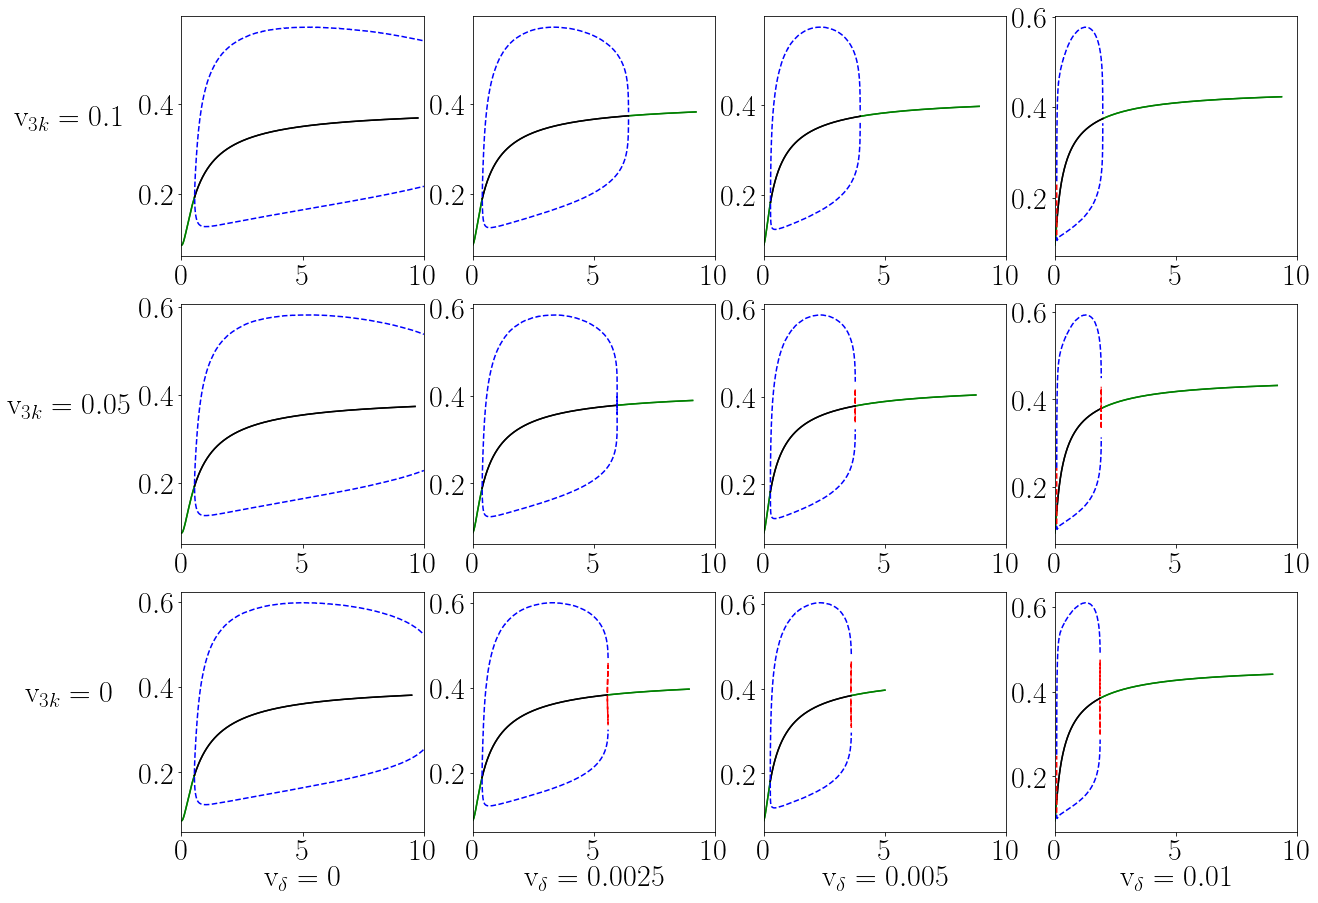

In [21]:
v3ks = [0.1, 0.05, 0]
vdeltas = [0, 0.0025, 0.005, 0.01]

fig, ax = plt.subplots(len(v3ks), len(vdeltas), figsize=(len(vdeltas)*5, len(v3ks)*5))

for i in range(len(v3ks)):
    for j in range(len(vdeltas)):
        file = 'c_glut_v3k_' + str(v3ks[i]) + '_vdelta_' + str(vdeltas[j]) + '.dat'
        plot_bifurcation(file, ax=ax[i, j])
        
        ax[i,j].set_xlim([0, 10])
        
for i in range(len(v3ks)):
    ax[i, 0].set_ylabel('v$_{3k}=' + str(v3ks[i]) + '$', rotation=0, labelpad=70)
for j in range(len(vdeltas)):
    ax[len(v3ks)-1, j].set_xlabel('v$_\delta=' + str(vdeltas[j]) + '$')

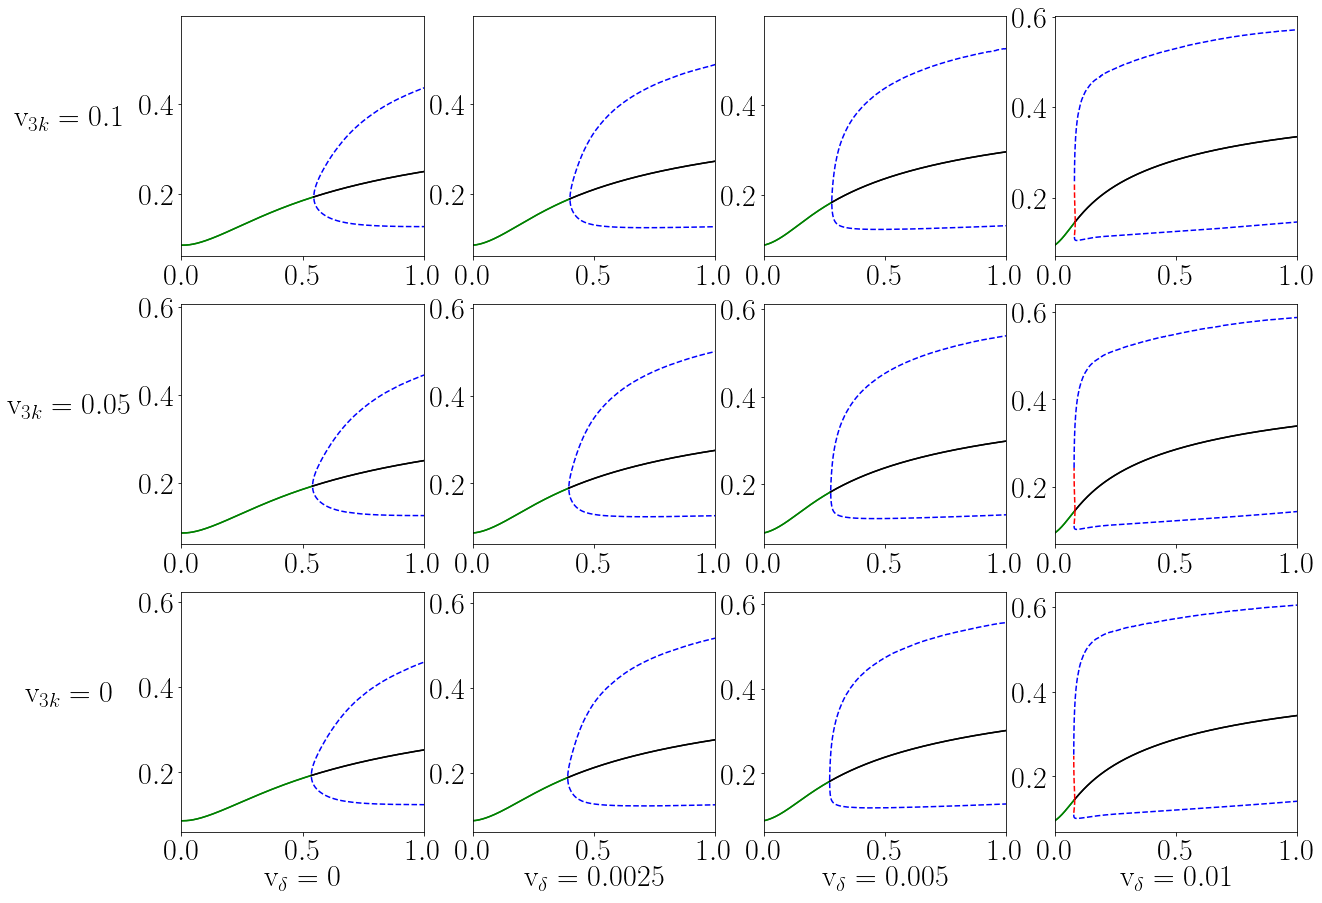

In [22]:
v3ks = [0.1, 0.05, 0]
vdeltas = [0, 0.0025, 0.005, 0.01]

fig, ax = plt.subplots(len(v3ks), len(vdeltas), figsize=(len(vdeltas)*5, len(v3ks)*5))

for i in range(len(v3ks)):
    for j in range(len(vdeltas)):
        file = 'c_glut_v3k_' + str(v3ks[i]) + '_vdelta_' + str(vdeltas[j]) + '.dat'
        plot_bifurcation(file, ax=ax[i, j])
        
        ax[i,j].set_xlim([0, 1])
        
for i in range(len(v3ks)):
    ax[i, 0].set_ylabel('v$_{3k}=' + str(v3ks[i]) + '$', rotation=0, labelpad=70)
for j in range(len(vdeltas)):
    ax[len(v3ks)-1, j].set_xlabel('v$_\delta=' + str(vdeltas[j]) + '$')

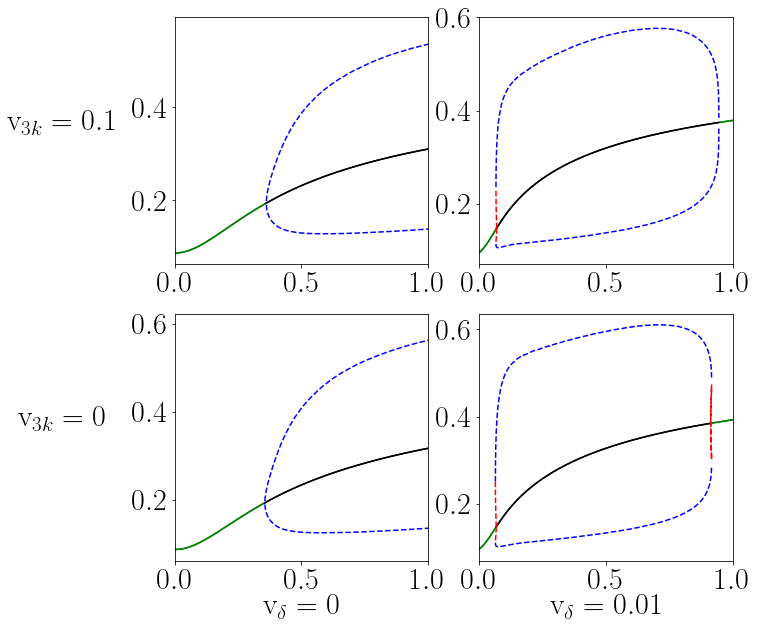

In [28]:
# v3ks = [0.1, 0.05, 0]
# vdeltas = [0, 0.0025, 0.005, 0.01]

v3ks = [0.1, 0]
vdeltas = [0, 0.01]

fig, ax = plt.subplots(len(v3ks), len(vdeltas), figsize=(len(vdeltas)*5, len(v3ks)*5))

for i in range(len(v3ks)):
    for j in range(len(vdeltas)):
        file = 'c_glut_v3k_' + str(v3ks[i]) + '_vdelta_' + str(vdeltas[j]) + '.dat'
        plot_bifurcation(file, ax=ax[i, j])
        
        ax[i,j].set_xlim([0, 1])
        
for i in range(len(v3ks)):
    ax[i, 0].set_ylabel('v$_{3k}=' + str(v3ks[i]) + '$', rotation=0, labelpad=70)
for j in range(len(vdeltas)):
    ax[len(v3ks)-1, j].set_xlabel('v$_\delta=' + str(vdeltas[j]) + '$')

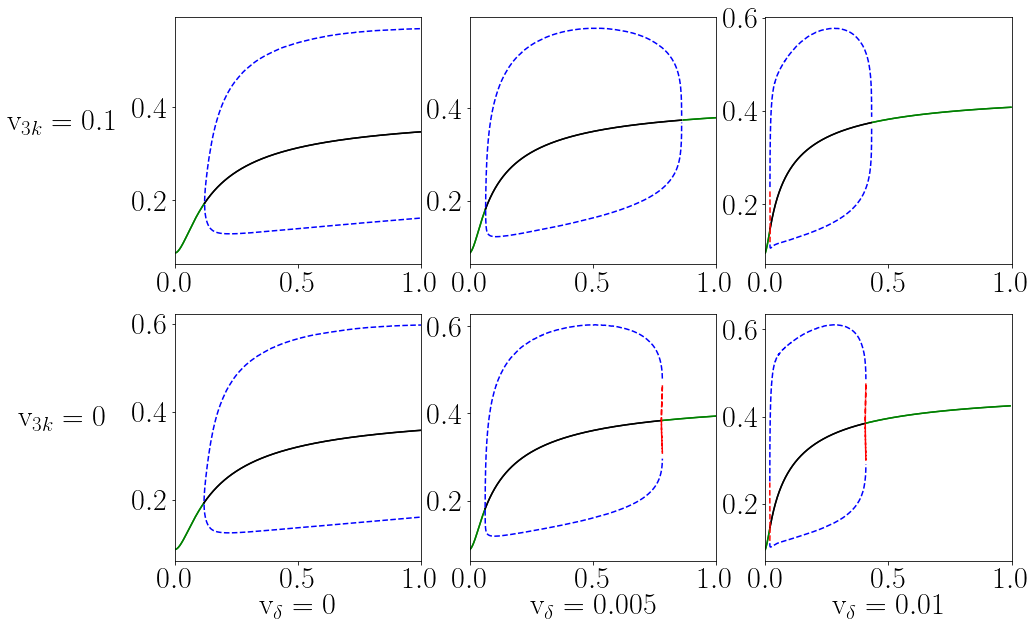

In [31]:
# v3ks = [0.1, 0.05, 0]
# vdeltas = [0, 0.0025, 0.005, 0.01]

v3ks = [0.1, 0]
vdeltas = [0, 0.005, 0.01]

fig, ax = plt.subplots(len(v3ks), len(vdeltas), figsize=(len(vdeltas)*5, len(v3ks)*5))

for i in range(len(v3ks)):
    for j in range(len(vdeltas)):
        file = 'c_glut_v3k_' + str(v3ks[i]) + '_vdelta_' + str(vdeltas[j]) + '.dat'
        plot_bifurcation(file, ax=ax[i, j])
        
        ax[i,j].set_xlim([0, 1])
        
for i in range(len(v3ks)):
    ax[i, 0].set_ylabel('v$_{3k}=' + str(v3ks[i]) + '$', rotation=0, labelpad=70)
for j in range(len(vdeltas)):
    ax[len(v3ks)-1, j].set_xlabel('v$_\delta=' + str(vdeltas[j]) + '$')

(0, 1)

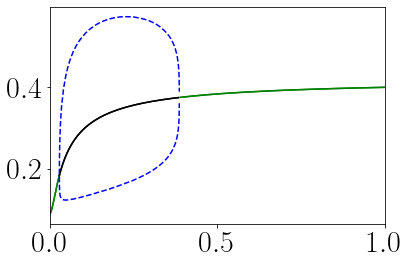

In [32]:
plot_bifurcation('c_glut_v3k_0.1_vdelta_0.005_kp_2.dat')
plt.xlim([0, 1])

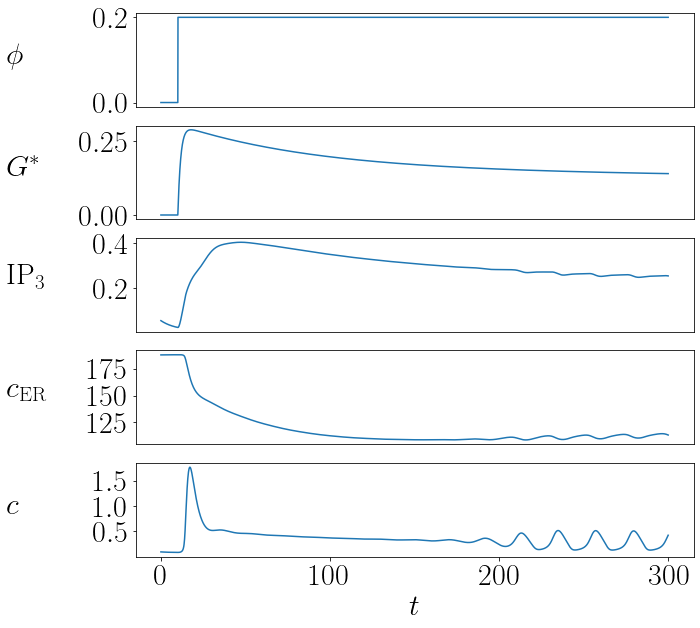

In [27]:
cfg.kp = 0.9
cfg.v_delta = 0.0025
cfg.input_max = 0.2
cfg.input_duration = 300
run_experiment(t_f=300)


plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'])

cfg.kp = 0.03
cfg.v_delta = 0.01

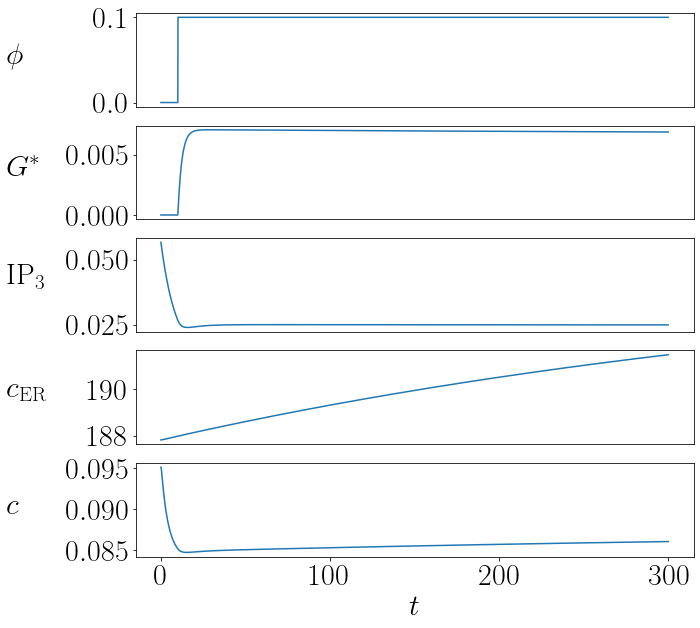

In [25]:
# cfg.kp = 0.09
cfg.v_delta = 0.0025
cfg.input_max = 0.1
cfg.input_duration = 300
run_experiment(t_f=300)


plot_experiment_plots(['glut', 'Gstar', 'p', 'c_er', 'c'])

cfg.kp = 0.03
cfg.v_delta = 0.01

In [10]:
plot_vars = ['glut', 'Gstar', 'Gd1', 'Gd2', 'p', 'h', 'c_er', 'c']
set_init()
all_init = cfg.all_init

In [11]:
cfg.all_init

[0.0951442, 34.841184, 0.673079, 0.056767761, 0, 0, 0, 0]

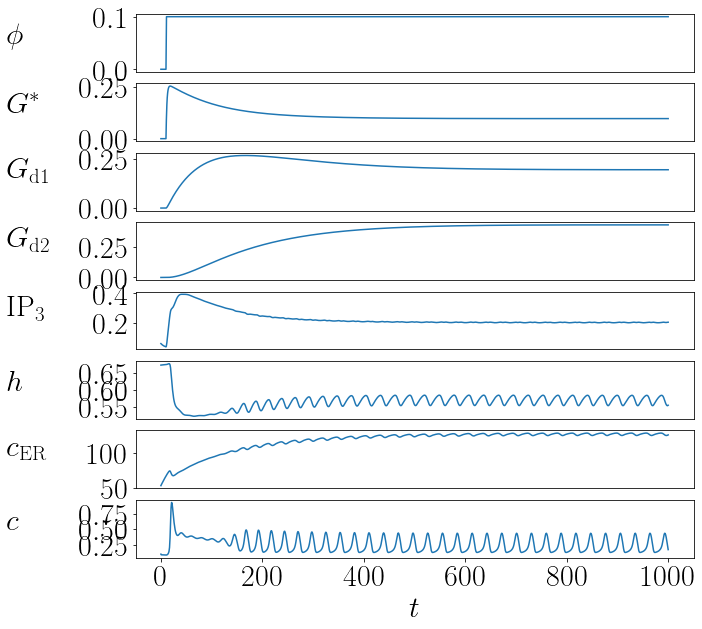

In [15]:
cfg.all_init[1] = 10

cfg.v_delta = 0.005
cfg.kp = 1.5
cfg.kd2 = 1.2
cfg.input_max = 0.1
cfg.input_duration = 1000

run_experiment(t_f=1000, max_step=1)
plot_experiment_plots(plot_vars)

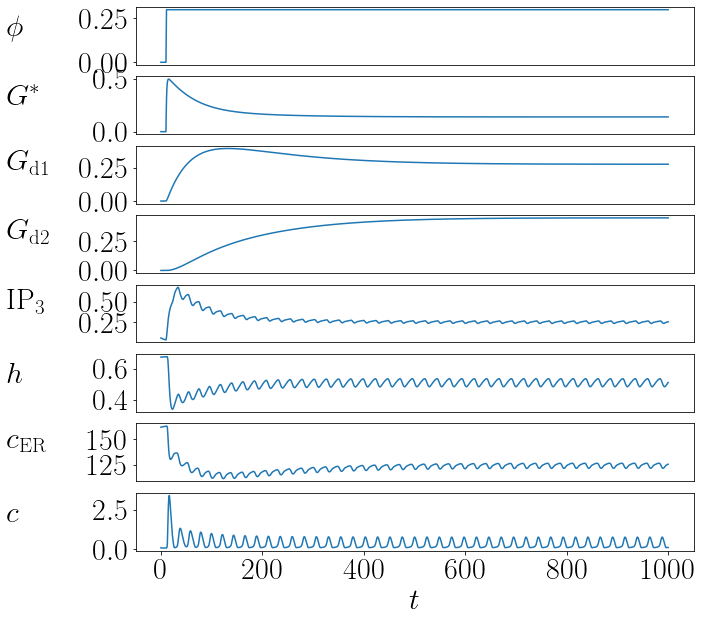

In [82]:
cfg.all_init[1] = 30

cfg.v_delta = 0.005
cfg.kp = 1.5
cfg.kd2 = 1.2
cfg.input_max = 0.3
cfg.custom_input_times = [0, 300, 600, 900]
cfg.custom_input_vals = [0.02, 0.04, 0.08, 0.2]
cfg.input_duration = 1000


# cfg.d2 = 0.5
# cfg.d3 = 1.5
# cfg.d1 = 0.6
# cfg.a2 = 0.2
# cfg.d5 = 0.1
cfg.v_pmca = 0

# run_experiment('custom', t_f=1000, max_step=1)
run_experiment(t_f=1000, max_step=1)
plot_experiment_plots(plot_vars)

cfg.v_pmca = 10

cfg.d5 = 0.08234
# cfg.a2 = 0.04
# cfg.d1 = 0.13
# cfg.d3 = 0.9434
cfg.d2 = 1.049


In [67]:
fluxes = ['J_ip3r', 'J_serca', 'J_pmca', 'J_soc']

In [73]:
cfg.delta

0.2

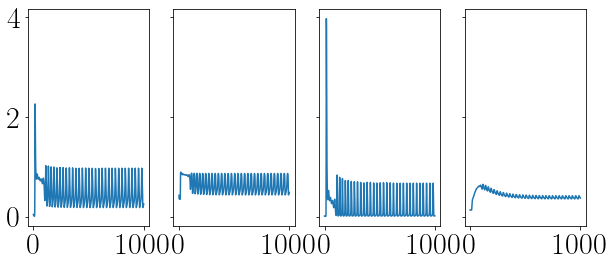

In [72]:
compute_fluxes()
fig, ax = plt.subplots(1, len(fluxes), figsize=(10, 4), sharey=True)
for i, flux in enumerate(fluxes):
    ax[i].plot(cfg.t, getattr(cfg, flux))

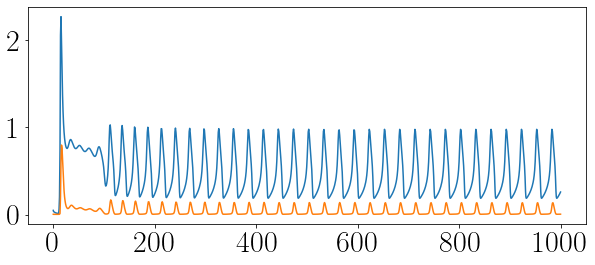

In [77]:
plt.figure(figsize=(10, 4))
plt.plot(cfg.t, cfg.J_ip3r)
plt.plot(cfg.t, cfg.J_pmca * cfg.delta)
# plt.xlim([0, 20])

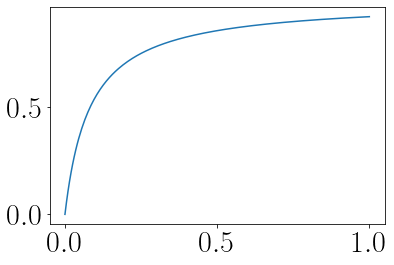

In [44]:
c = np.linspace(0, 1, 200)
n_inf = c / (c + cfg.d5)
plt.plot(c, n_inf)

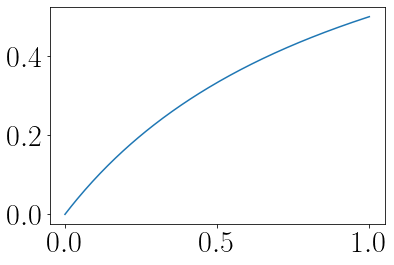

In [47]:
c = np.linspace(0, 1, 200)
n_inf = c / (c + 1)
plt.plot(c, n_inf)